IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOADING THE DATASETS

In [2]:
# GPU Datasets

amd_df = pd.read_csv("AMD (1980 -11.07.2023).csv")
asus_df = pd.read_csv("ASUS (2000 - 11.07.2023).csv")
intel_df = pd.read_csv("Intel (1980 - 11.07.2023).csv")
nvidia_df = pd.read_csv("NVIDIA (1999 -11.07.2023).csv")

In [3]:
# Ecommerce / Business Datasets

msft_df = pd.read_csv("MSFT.csv")
amzn_df = pd.read_csv("AMZN.csv")

Exploratory Data Analysis

AMD

In [4]:
amd_df

Date        Open        High         Low       Close   Adj Close  \
0      1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
1      1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
2      1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
3      1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
4      1980-03-24    0.000000    2.916667    2.635417    2.666667    2.666667   
...           ...         ...         ...         ...         ...         ...   
10914  2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
10915  2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
10916  2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
10917  2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
10918  2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

         Volume  
0        727200  
1        295200  
2        159600  
3        130800  
4        436800  
...         ...  
10914  31860000  
10915  49501600  
10916  42342000  
10917  37135100  
10918  48814600  

[10919 rows x 7 columns]

In [5]:
amd_viz = amd_df.copy()
amd_df.size


76433

In [6]:
amd_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
amd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10919 non-null  object 
 1   Open       10919 non-null  float64
 2   High       10919 non-null  float64
 3   Low        10919 non-null  float64
 4   Close      10919 non-null  float64
 5   Adj Close  10919 non-null  float64
 6   Volume     10919 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 597.3+ KB


In [8]:
amd_df.shape

(10919, 7)

In [9]:
amd_df.describe().T

count          mean           std   min           25%  \
Open       10919.0  1.684266e+01  2.331772e+01  0.00  4.960000e+00   
High       10919.0  1.751074e+01  2.360961e+01  1.69  5.437500e+00   
Low        10919.0  1.676163e+01  2.261540e+01  1.61  5.125000e+00   
Close      10919.0  1.713893e+01  2.312162e+01  1.62  5.300000e+00   
Adj Close  10919.0  1.713893e+01  2.312162e+01  1.62  5.300000e+00   
Volume     10919.0  1.846495e+07  2.815631e+07  0.00  1.226100e+06   

                    50%           75%           max  
Open       9.875000e+00  1.612500e+01  1.632800e+02  
High       1.006250e+01  1.640312e+01  1.644600e+02  
Low        9.630000e+00  1.580500e+01  1.561000e+02  
Close      9.875000e+00  1.612000e+01  1.619100e+02  
Adj Close  9.875000e+00  1.612000e+01  1.619100e+02  
Volume     6.833200e+06  2.284015e+07  3.250584e+08

In [10]:
amd_df['Date'] = pd.to_datetime(amd_df['Date'])

In [11]:
amd_df['Year'] = amd_df['Date'].dt.year
amd_df['Month'] = amd_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

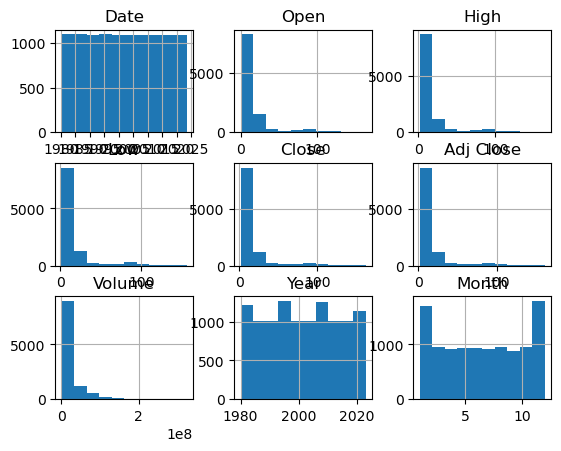

In [12]:
amd_df.hist()

In [13]:
duplicates = amd_df[amd_df.duplicated(subset=['Date'])] 

In [14]:
duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

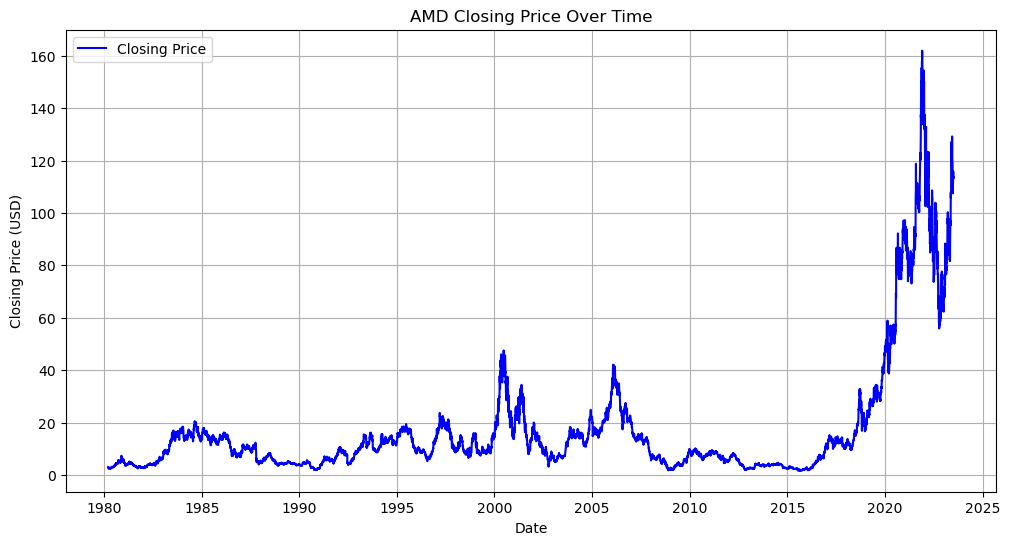

In [15]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(amd_df['Date'], amd_df['Close'], color='blue', label='Closing Price')
plt.title('AMD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

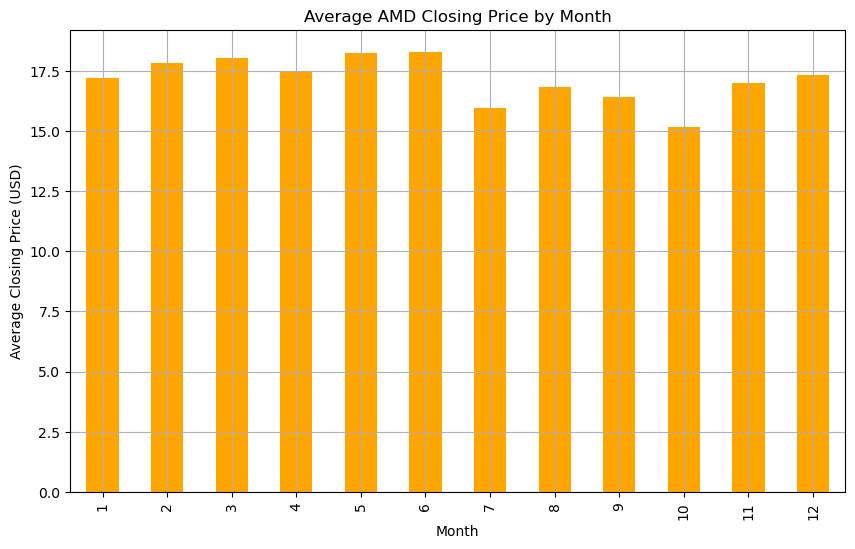

In [16]:
monthly_data = amd_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average AMD Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

ASUS

In [17]:
asus_df

Date        Open        High         Low       Close   Adj Close  \
0     2000-01-05  438.747223  446.535675  436.151154  438.747223   89.092613   
1     2000-01-06  440.045380  447.833862  436.151154  437.449310   88.829048   
2     2000-01-07  432.256927  433.555084  425.766632  428.362701   86.983925   
3     2000-01-10  434.853271  454.324158  434.853271  450.429901   91.464920   
4     2000-01-11  463.410767  463.410767  442.641449  443.939606   90.146988   
...          ...         ...         ...         ...         ...         ...   
5864  2023-07-04  298.500000  302.500000  293.000000  293.500000  293.500000   
5865  2023-07-05  294.000000  298.000000  292.000000  296.500000  296.500000   
5866  2023-07-06  298.000000  302.500000  295.500000  300.000000  300.000000   
5867  2023-07-07  300.000000  300.000000  291.000000  293.000000  293.000000   
5868  2023-07-10  293.000000  295.000000  291.000000  292.000000  292.000000   

            Volume  
0     6.106176e+09  
1     6.545984e+09  
2     4.764317e+09  
3     1.199988e+10  
4     1.423350e+10  
...            ...  
5864  6.790210e+06  
5865  1.683419e+06  
5866  2.966401e+06  
5867  2.140715e+06  
5868  1.432084e+06  

[5869 rows x 7 columns]

In [18]:
asus_viz = asus_df.copy()

In [19]:
asus_df.size

41083

In [20]:
asus_df.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [21]:
asus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5869 entries, 0 to 5868
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5869 non-null   object 
 1   Open       5746 non-null   float64
 2   High       5746 non-null   float64
 3   Low        5746 non-null   float64
 4   Close      5746 non-null   float64
 5   Adj Close  5746 non-null   float64
 6   Volume     5746 non-null   float64
dtypes: float64(6), object(1)
memory usage: 321.1+ KB


In [22]:
asus_df.dropna(inplace = True)

In [23]:
asus_df.shape

(5746, 7)

In [24]:
asus_df.describe().T

count          mean           std         min           25%  \
Open       5746.0  2.904897e+02  7.595758e+01  127.106941  2.345282e+02   
High       5746.0  2.936674e+02  7.673955e+01  130.196335  2.370000e+02   
Low        5746.0  2.870555e+02  7.493586e+01  127.106941  2.318088e+02   
Close      5746.0  2.902358e+02  7.560252e+01  130.196335  2.345000e+02   
Adj Close  5746.0  1.285185e+02  6.607959e+01   28.863441  7.637962e+01   
Volume     5746.0  1.016665e+09  2.177426e+09    0.000000  1.696000e+06   

                    50%           75%           max  
Open       2.780000e+02  3.300871e+02  5.676674e+02  
High       2.800000e+02  3.340000e+02  5.751041e+02  
Low        2.754099e+02  3.265000e+02  5.478362e+02  
Close      2.780000e+02  3.300000e+02  5.651885e+02  
Adj Close  1.201885e+02  1.632332e+02  3.145435e+02  
Volume     3.186387e+06  8.475086e+08  2.833812e+10

In [25]:
asus_df['Date'] = pd.to_datetime(asus_df['Date'])

In [26]:
asus_df['Year'] = asus_df['Date'].dt.year
asus_df['Month'] = asus_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

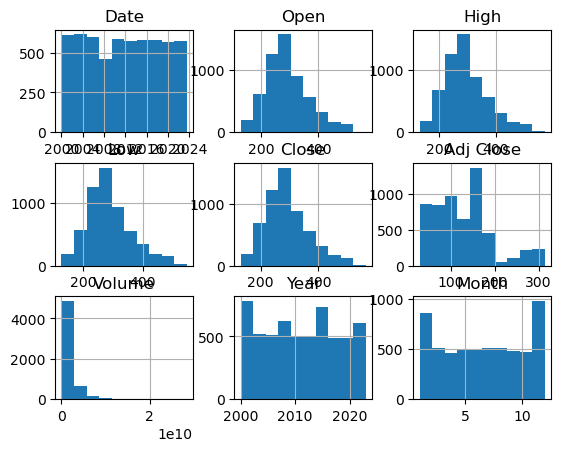

In [27]:
asus_df.hist()

In [28]:
asus_duplicates = asus_df[asus_df.duplicated(subset=['Date'])]
asus_duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

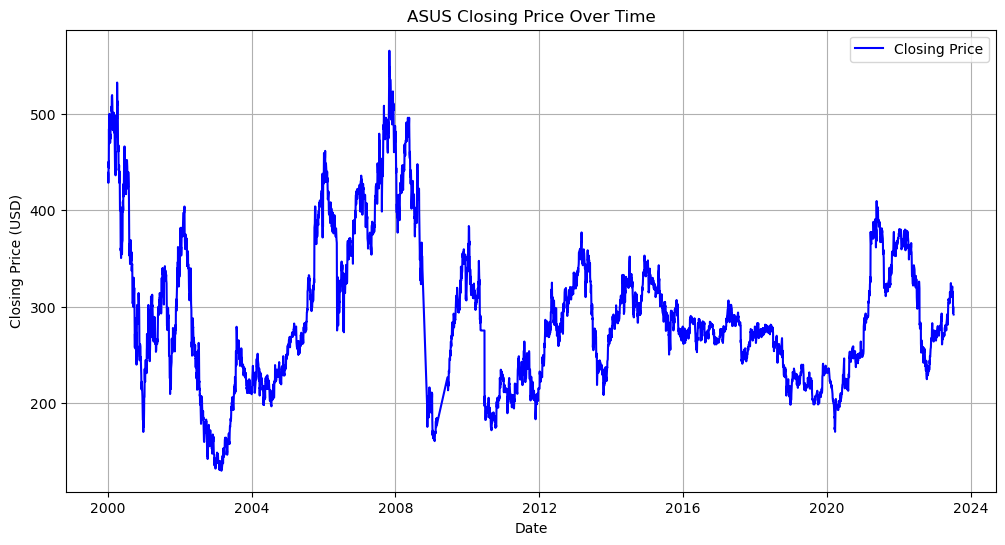

In [29]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(asus_df['Date'], asus_df['Close'], color='blue', label='Closing Price')
plt.title('ASUS Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

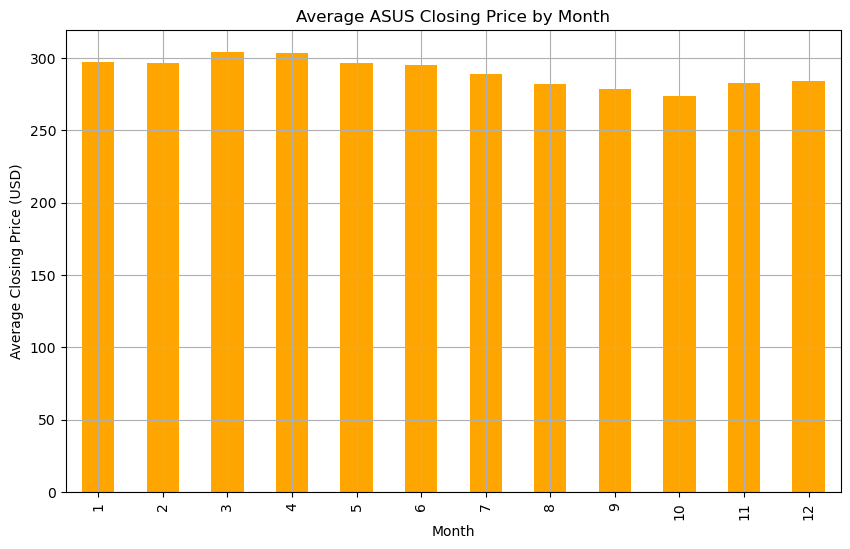

In [30]:
monthly_data = asus_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average ASUS Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

INTEL

In [31]:
intel_df

Date       Open       High        Low      Close  Adj Close  \
0      1980-03-18   0.325521   0.328125   0.322917   0.322917   0.183718   
1      1980-03-19   0.330729   0.335938   0.330729   0.330729   0.188162   
2      1980-03-20   0.330729   0.334635   0.329427   0.329427   0.187421   
3      1980-03-21   0.322917   0.322917   0.317708   0.317708   0.180754   
4      1980-03-24   0.316406   0.316406   0.311198   0.311198   0.177050   
...           ...        ...        ...        ...        ...        ...   
10914  2023-07-03  33.540001  33.889999  33.139999  33.619999  33.619999   
10915  2023-07-05  33.310001  33.330002  32.500000  32.509998  32.509998   
10916  2023-07-06  31.900000  32.040001  31.379999  31.969999  31.969999   
10917  2023-07-07  32.000000  32.410000  31.820000  31.850000  31.850000   
10918  2023-07-10  31.870001  32.830002  31.770000  32.740002  32.740002   

         Volume  
0      17068800  
1      18508800  
2      11174400  
3      12172800  
4       8966400  
...         ...  
10914  15753000  
10915  37664700  
10916  41693600  
10917  28345700  
10918  36227800  

[10919 rows x 7 columns]

In [32]:
intel_viz = intel_df.copy()
intel_df.size

76433

In [33]:
intel_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
intel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10919 entries, 0 to 10918
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10919 non-null  object 
 1   Open       10919 non-null  float64
 2   High       10919 non-null  float64
 3   Low        10919 non-null  float64
 4   Close      10919 non-null  float64
 5   Adj Close  10919 non-null  float64
 6   Volume     10919 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 597.3+ KB


In [35]:
intel_df.shape

(10919, 7)

In [36]:
intel_df.describe().T

count          mean           std       min           25%  \
Open       10919.0  1.989734e+01  1.748797e+01  0.218750  1.343750e+00   
High       10919.0  2.016968e+01  1.772997e+01  0.218750  1.367188e+00   
Low        10919.0  1.962755e+01  1.725202e+01  0.216146  1.320313e+00   
Close      10919.0  1.989678e+01  1.748740e+01  0.216146  1.343750e+00   
Adj Close  10919.0  1.466866e+01  1.478124e+01  0.122972  7.645020e-01   
Volume     10919.0  5.052754e+07  3.481933e+07  0.000000  2.713025e+07   

                    50%           75%           max  
Open       2.035000e+01  3.011500e+01  7.562500e+01  
High       2.065000e+01  3.059375e+01  7.582812e+01  
Low        2.009375e+01  2.967000e+01  7.362500e+01  
Close      2.037000e+01  3.006625e+01  7.487500e+01  
Adj Close  1.268009e+01  1.998798e+01  6.334877e+01  
Volume     4.450540e+07  6.467910e+07  5.677088e+08

In [37]:
intel_df['Date'] = pd.to_datetime(intel_df['Date'])

In [38]:
intel_df['Year'] = intel_df['Date'].dt.year
intel_df['Month'] = intel_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

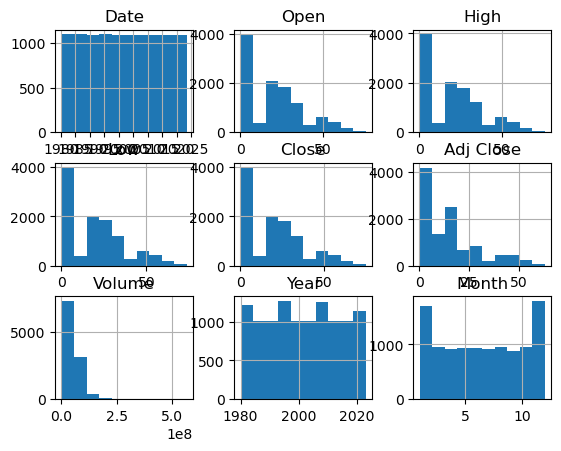

In [39]:
intel_df.hist()

In [40]:
intel_duplicates = intel_df[intel_df.duplicated(subset=['Date'])]
intel_duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

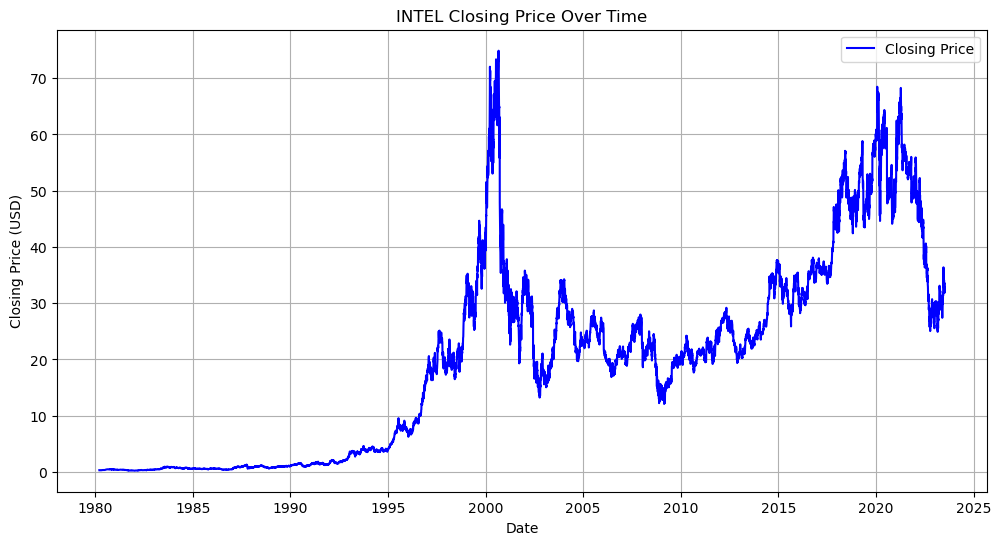

In [41]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(intel_df['Date'], intel_df['Close'], color='blue', label='Closing Price')
plt.title('INTEL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

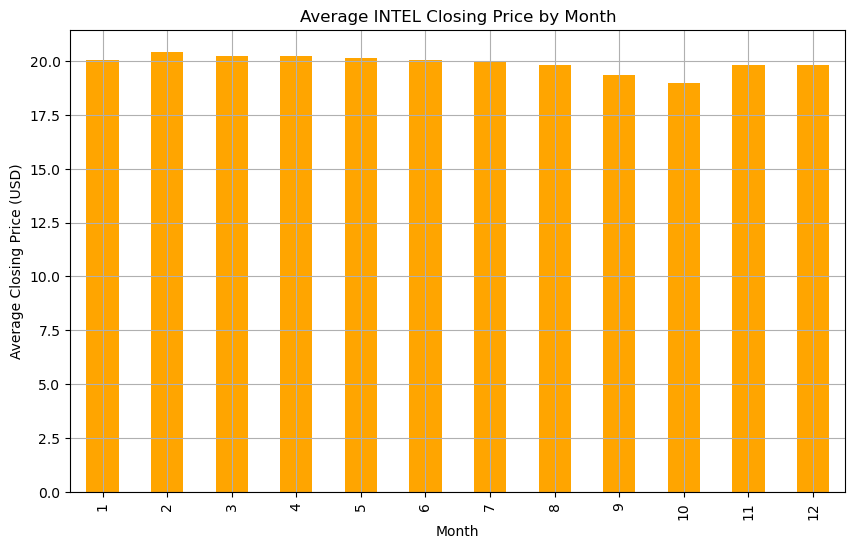

In [42]:
monthly_data = intel_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average INTEL Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

NVIDIA

In [43]:
nvidia_df

Date        Open        High         Low       Close   Adj Close  \
0     1999-01-25    0.442708    0.458333    0.410156    0.453125    0.415743   
1     1999-01-26    0.458333    0.467448    0.411458    0.417969    0.383487   
2     1999-01-27    0.419271    0.429688    0.395833    0.416667    0.382293   
3     1999-01-28    0.416667    0.419271    0.412760    0.415365    0.381098   
4     1999-01-29    0.415365    0.416667    0.395833    0.395833    0.363177   
...          ...         ...         ...         ...         ...         ...   
6149  2023-07-03  425.170013  428.980011  422.019989  424.130005  424.130005   
6150  2023-07-05  421.350006  431.769989  420.850006  423.170013  423.170013   
6151  2023-07-06  418.440002  421.790009  413.459991  421.029999  421.029999   
6152  2023-07-07  423.220001  432.140015  421.799988  425.029999  425.029999   
6153  2023-07-10  426.570007  428.109985  416.489990  421.799988  421.799988   

        Volume  
0     51048000  
1     34320000  
2     24436800  
3     22752000  
4     24403200  
...        ...  
6149  19820900  
6150  32361800  
6151  30358200  
6152  35525300  
6153  34684600  

[6154 rows x 7 columns]

In [44]:
nvidia_viz = nvidia_df.copy()

In [45]:
nvidia_df.size

43078

In [46]:
nvidia_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
nvidia_df.shape

(6154, 7)

In [48]:
nvidia_df.describe().T

count          mean           std           min           25%  \
Open       6154.0  3.405589e+01  6.742009e+01  3.489580e-01  2.682084e+00   
High       6154.0  3.470732e+01  6.876091e+01  3.554690e-01  2.768125e+00   
Low        6154.0  3.339480e+01  6.606929e+01  3.333330e-01  2.612500e+00   
Close      6154.0  3.408046e+01  6.747284e+01  3.411460e-01  2.685417e+00   
Adj Close  6154.0  3.381898e+01  6.747941e+01  3.130020e-01  2.463874e+00   
Volume     6154.0  6.120887e+07  4.385313e+07  1.968000e+06  3.443320e+07   

                    50%           75%           max  
Open       4.371250e+00  3.349812e+01  4.350100e+02  
High       4.443750e+00  3.435688e+01  4.399000e+02  
Low        4.280000e+00  3.249063e+01  4.267400e+02  
Close      4.367500e+00  3.340312e+01  4.380800e+02  
Adj Close  4.024390e+00  3.313719e+01  4.380800e+02  
Volume     5.136085e+07  7.449690e+07  9.230856e+08

In [49]:
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])

In [50]:
nvidia_df['Year'] = nvidia_df['Date'].dt.year
nvidia_df['Month'] = nvidia_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

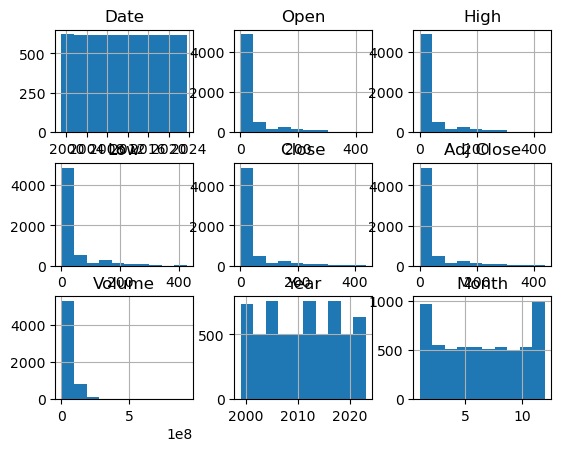

In [51]:
nvidia_df.hist()

In [52]:
nvidia_duplicates = nvidia_df[nvidia_df.duplicated(subset=['Date'])]
nvidia_duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

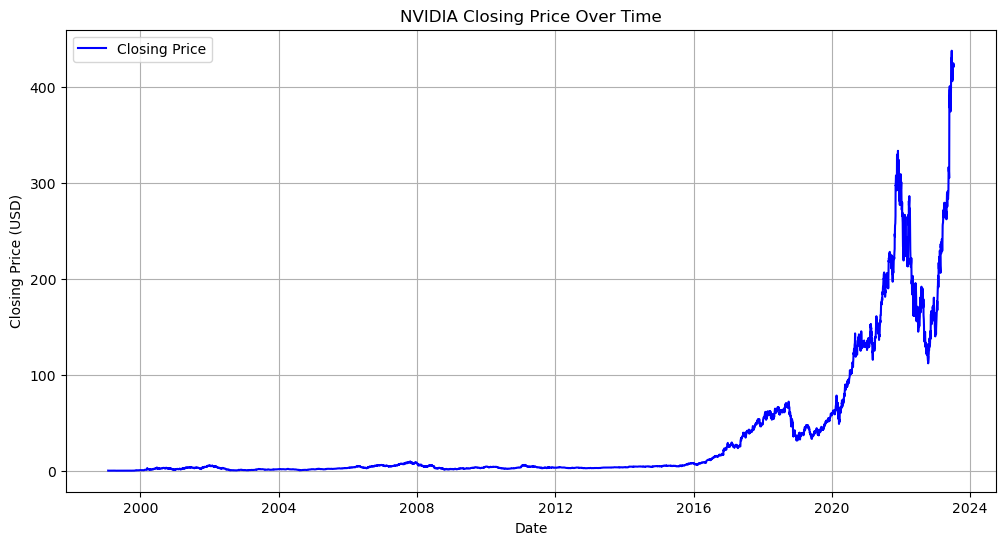

In [53]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(nvidia_df['Date'], nvidia_df['Close'], color='blue', label='Closing Price')
plt.title('NVIDIA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

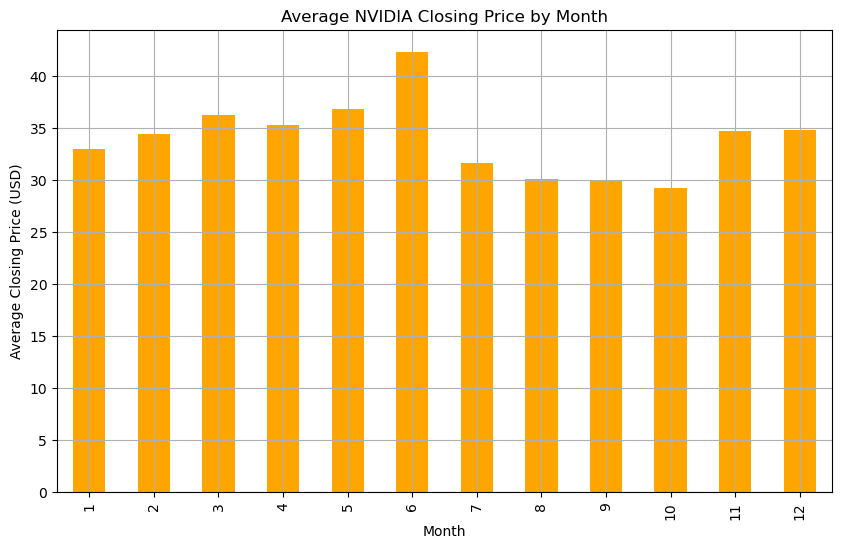

In [54]:
monthly_data = nvidia_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average NVIDIA Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

AMAZON

In [55]:
amzn_df

Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    0.121875    0.125000    0.096354    0.097917    0.097917   
1     1997-05-16    0.098438    0.098958    0.085417    0.086458    0.086458   
2     1997-05-19    0.088021    0.088542    0.081250    0.085417    0.085417   
3     1997-05-20    0.086458    0.087500    0.081771    0.081771    0.081771   
4     1997-05-21    0.081771    0.082292    0.068750    0.071354    0.071354   
...          ...         ...         ...         ...         ...         ...   
6511  2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
6512  2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
6513  2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
6514  2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
6515  2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

          Volume  
0     1443120000  
1      294000000  
2      122136000  
3      109344000  
4      377064000  
...          ...  
6511    53633400  
6512    56704300  
6513    41135700  
6514    48662500  
6515    45103000  

[6516 rows x 7 columns]

In [56]:
amzn_df.size

45612

In [57]:
amzn_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
amzn_df.shape

(6516, 7)

In [59]:
amzn_df.describe().T

count          mean           std           min           25%  \
Open       6516.0  3.161163e+01  4.809534e+01  7.031300e-02  1.998875e+00   
High       6516.0  3.199200e+01  4.865965e+01  7.239600e-02  2.028500e+00   
Low        6516.0  3.119343e+01  4.746448e+01  6.562500e-02  1.964750e+00   
Close      6516.0  3.159974e+01  4.806026e+01  6.979200e-02  2.001250e+00   
Adj Close  6516.0  3.159974e+01  4.806026e+01  6.979200e-02  2.001250e+00   
Volume     6516.0  1.425338e+08  1.401619e+08  9.744000e+06  6.888182e+07   

                    50%           75%           max  
Open       6.456750e+00  3.845137e+01  1.872000e+02  
High       6.535500e+00  3.868800e+01  1.886540e+02  
Low        6.353250e+00  3.820300e+01  1.848395e+02  
Close      6.444250e+00  3.846463e+01  1.865705e+02  
Adj Close  6.444250e+00  3.846463e+01  1.865705e+02  
Volume     1.059050e+08  1.607700e+08  2.086584e+09

In [60]:
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

In [61]:
amzn_df['Year'] = amzn_df['Date'].dt.year
amzn_df['Month'] = amzn_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

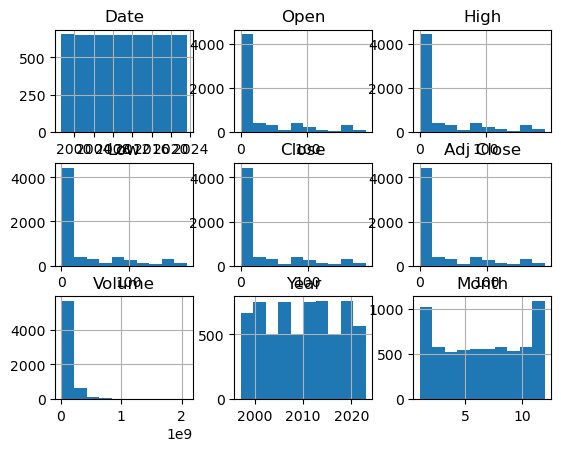

In [62]:
amzn_df.hist()

In [63]:
amzn_duplicates = amzn_df[amzn_df.duplicated(subset=['Date'])]
amzn_duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

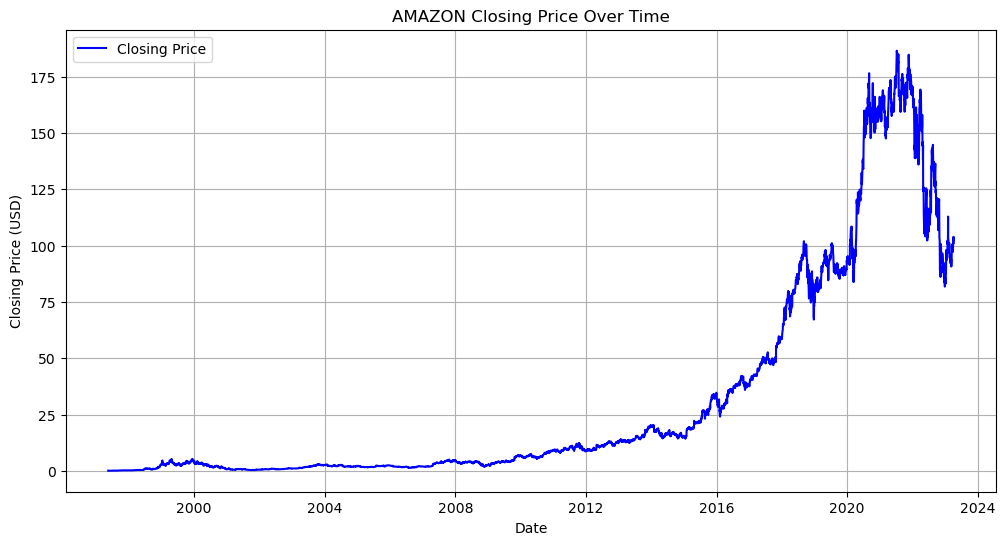

In [64]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(amzn_df['Date'], amzn_df['Close'], color='blue', label='Closing Price')
plt.title('AMAZON Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

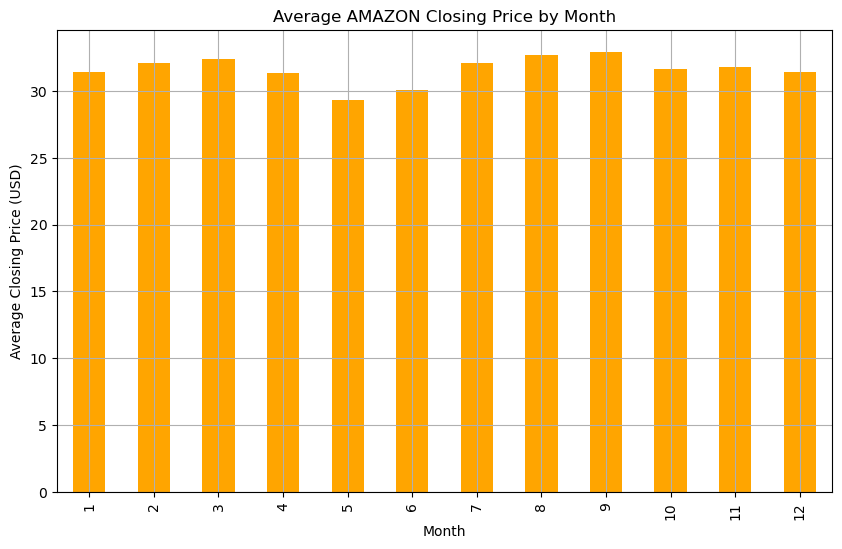

In [65]:
monthly_data = amzn_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average AMAZON Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

In [66]:
msft_df

Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061434   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063628   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064725   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063079   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061982   
...          ...         ...         ...         ...         ...         ...   
9078  2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
9079  2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
9080  2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
9081  2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
9082  2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

          Volume  
0     1031788800  
1      308160000  
2      133171200  
3       67766400  
4       47894400  
...          ...  
9078    43317000  
9079    28351200  
9080    27599700  
9081    25715400  
9082    24446900  

[9083 rows x 7 columns]

In [67]:
msft_df.size

63581

In [68]:
msft_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [69]:
msft_df.shape

(9083, 7)

In [70]:
msft_df.describe().T

count          mean           std           min           25%  \
Open       9083.0  4.132494e+01  5.969690e+01  8.854200e-02  4.050781e+00   
High       9083.0  4.176089e+01  6.027222e+01  9.201400e-02  4.102051e+00   
Low        9083.0  4.087849e+01  5.908173e+01  8.854200e-02  4.027344e+00   
Close      9083.0  4.133563e+01  5.971457e+01  9.027800e-02  4.075195e+00   
Adj Close  9083.0  3.625612e+01  5.998144e+01  5.704600e-02  2.575089e+00   
Volume     9083.0  5.875055e+07  3.845200e+07  2.304000e+06  3.461230e+07   

                    50%           75%           max  
Open       2.682000e+01  4.003500e+01  3.446200e+02  
High       2.710000e+01  4.044375e+01  3.496700e+02  
Low        2.652000e+01  3.950000e+01  3.422000e+02  
Close      2.684000e+01  3.993750e+01  3.431100e+02  
Adj Close  1.894853e+01  2.924481e+01  3.424020e+02  
Volume     5.203200e+07  7.265400e+07  1.031789e+09

In [71]:
msft_df['Date'] = pd.to_datetime(msft_df['Date'])

In [72]:
msft_df['Year'] = msft_df['Date'].dt.year
msft_df['Month'] = msft_df['Date'].dt.month

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

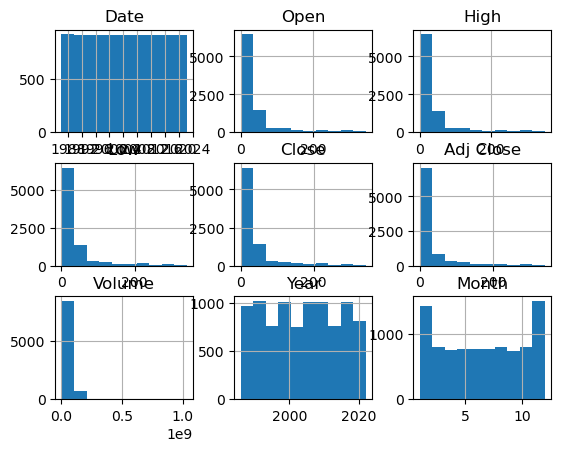

In [73]:
msft_df.hist()

In [74]:
msft_duplicates = msft_df[msft_df.duplicated(subset=['Date'])]
msft_duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month]
Index: []

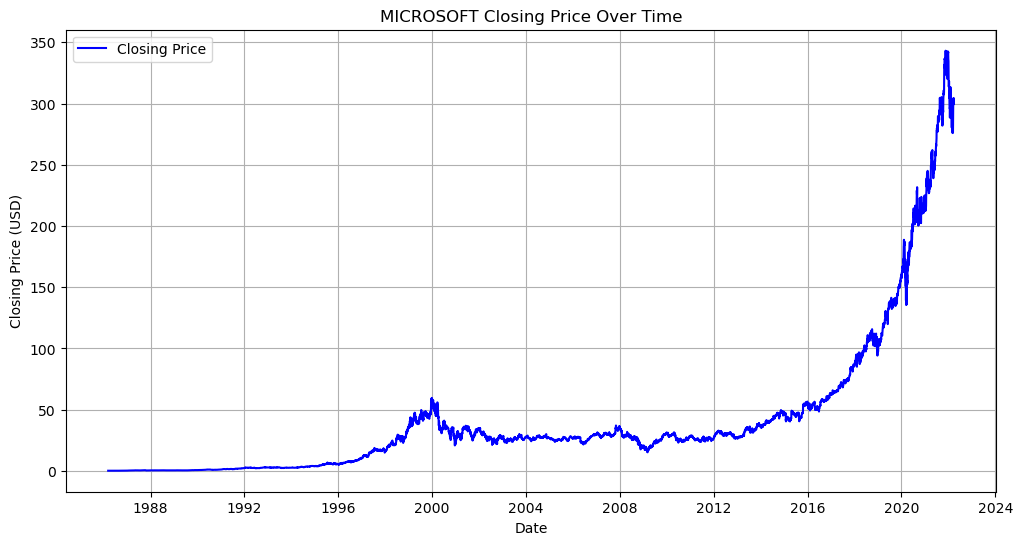

In [75]:
import matplotlib.pyplot as plt

# Line plot of Closing Price over time
plt.figure(figsize=(12, 6))
plt.plot(msft_df['Date'], msft_df['Close'], color='blue', label='Closing Price')
plt.title('MICROSOFT Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

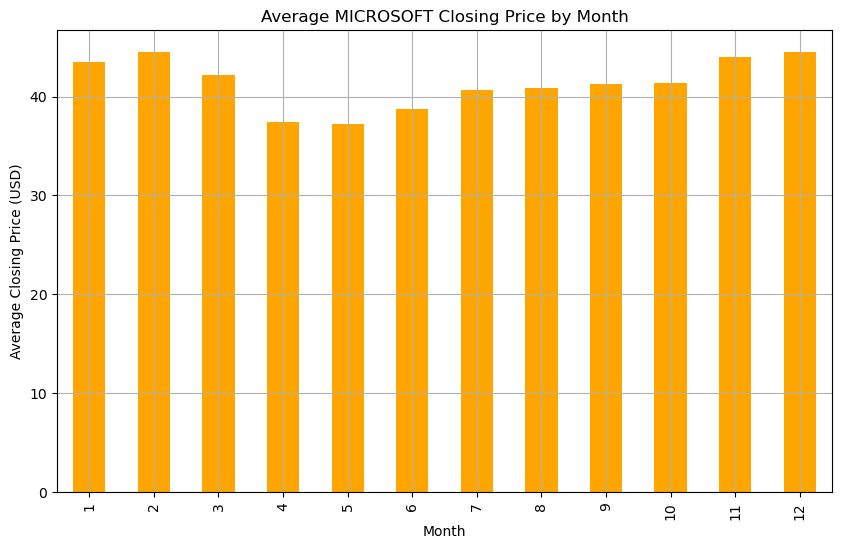

In [76]:
monthly_data = msft_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10,6))
monthly_data.plot(kind='bar', color='orange')
plt.title('Average MICROSOFT Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.grid(True)
plt.show()

In [77]:
moving_avg_period = 20

def calculate_moving_average(df, period=20):
    df['Moving_Avg'] = df['Close'].rolling(window=period).mean()
    return df

In [78]:
amd_df = calculate_moving_average(amd_df, moving_avg_period)
asus_df = calculate_moving_average(asus_df, moving_avg_period)
intel_df = calculate_moving_average(intel_df, moving_avg_period)
nvidia_df = calculate_moving_average(nvidia_df, moving_avg_period)
msft_df = calculate_moving_average(msft_df, moving_avg_period)
amzn_df = calculate_moving_average(amzn_df, moving_avg_period)

dataframes = [amd_df, asus_df, intel_df, nvidia_df, msft_df, amzn_df]
labels = ['AMD', 'ASUS', 'Intel', 'NVIDIA', 'Microsoft', 'Amazon']

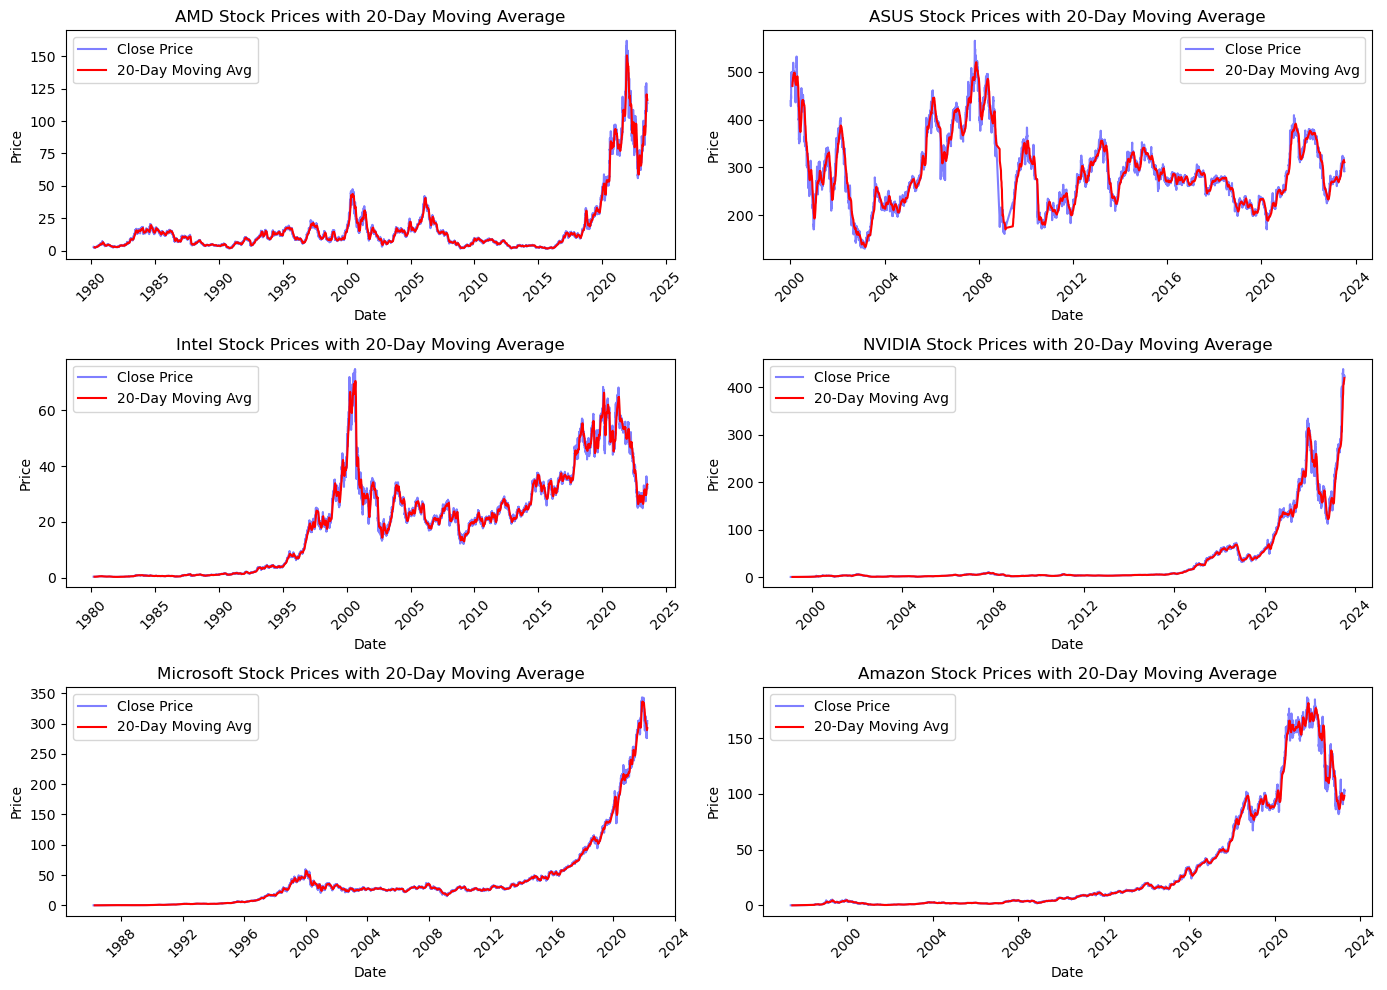

In [79]:
plt.figure(figsize=(14, 10))
for i, (df, label) in enumerate(zip(dataframes, labels), 1):
    plt.subplot(3, 2, i)  # Adjust for layout (3 rows, 2 columns for 6 plots)
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.5)
    plt.plot(df['Date'], df['Moving_Avg'], label=f'{moving_avg_period}-Day Moving Avg', color='red')
    plt.title(f"{label} Stock Prices with {moving_avg_period}-Day Moving Average")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [80]:
company_list = [amd_df, asus_df, intel_df, nvidia_df, msft_df, amzn_df]
company_names = ["AMD", "ASUS", "Intel", "NVIDIA", "Microsoft", "Amazon"]

average_daily_returns = {}
for company, name in zip(company_list, company_names):
    company['Daily Return'] = company['Adj Close'].pct_change()
    average_daily_returns[name] = company['Daily Return'].mean()

avg_daily_return_df = pd.DataFrame(list(average_daily_returns.items()), columns=['Company', 'Average Daily Return'])



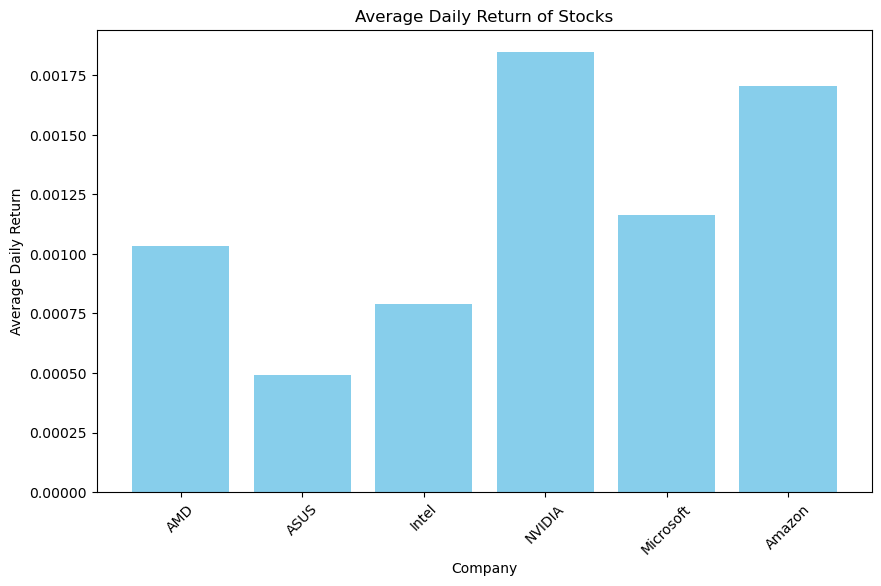

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(avg_daily_return_df['Company'], avg_daily_return_df['Average Daily Return'], color='skyblue')
plt.title('Average Daily Return of Stocks')
plt.xlabel('Company')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45)
plt.show()

In [82]:
for company in company_list:
    company['Date'] = pd.to_datetime(company['Date'])  # Ensure 'Date' is in datetime format
    company['Daily Return'] = company['Adj Close'].pct_change()

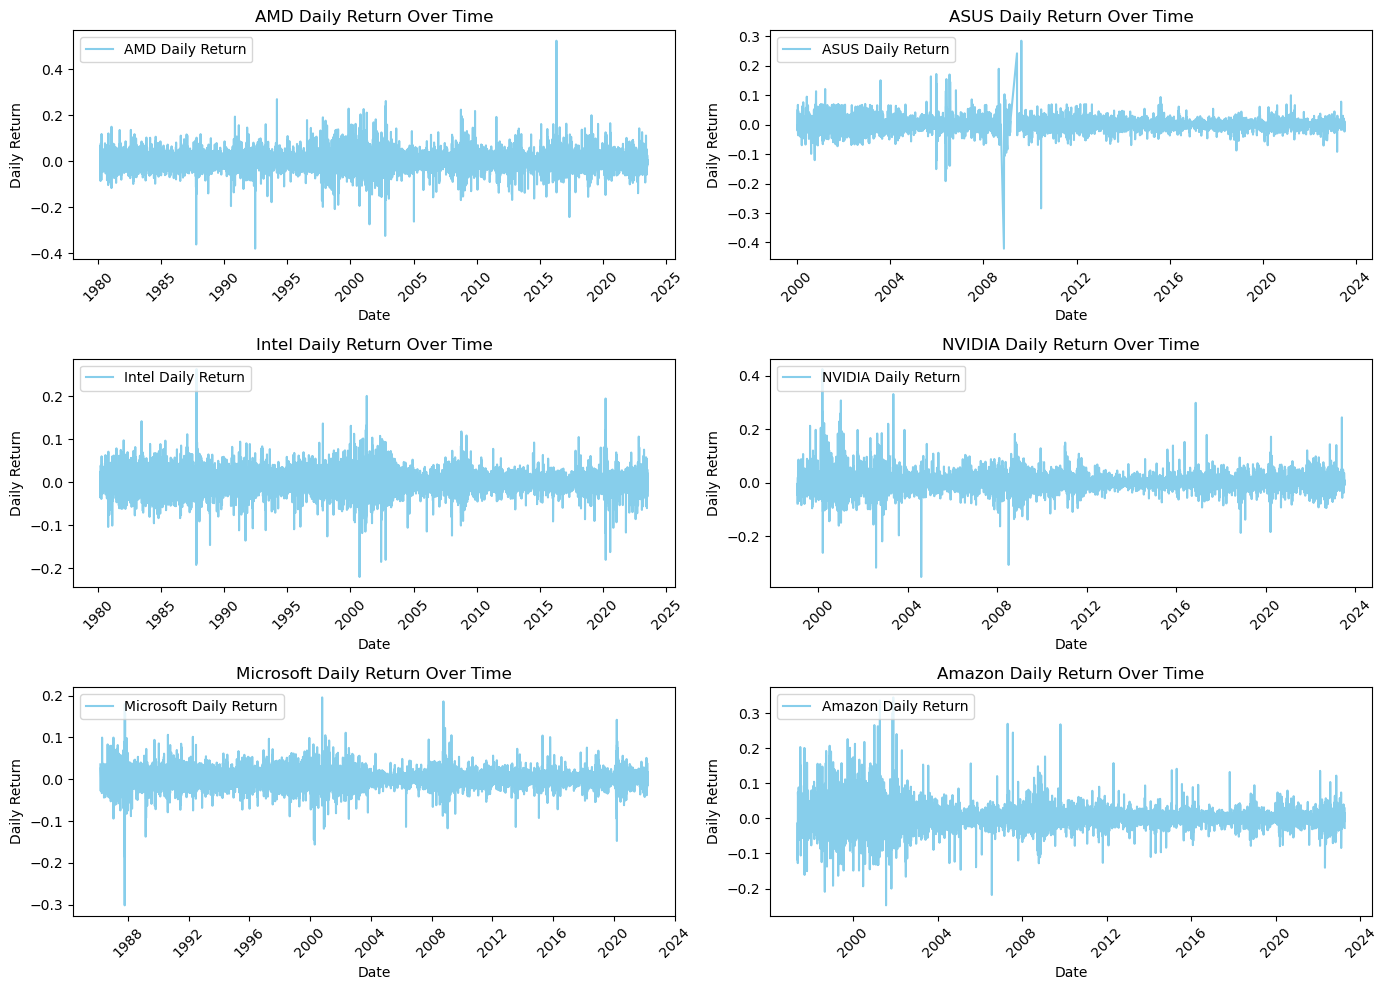

In [83]:
plt.figure(figsize=(14, 10))

for i, (company, name) in enumerate(zip(company_list, company_names), 1):
    plt.subplot(3, 2, i)  # Layout: 3 rows, 2 columns for 6 companies
    plt.plot(company['Date'], company['Daily Return'], label=f'{name} Daily Return', color='skyblue')
    plt.title(f"{name} Daily Return Over Time")
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend(loc="upper left")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [84]:
confidence_level = 0.95  # 95% confidence level

# Calculate VaR for each company
var_results = {}
for company, name in zip(company_list, company_names):
    # Ensure 'Date' is in datetime format and calculate daily returns
    company['Date'] = pd.to_datetime(company['Date'])
    company['Daily Return'] = company['Adj Close'].pct_change()
    
    # Drop NaN values that result from pct_change
    daily_returns = company['Daily Return'].dropna()
    
    # Calculate VaR at the specified confidence level
    var_value = np.percentile(daily_returns, (1 - confidence_level) * 100)
    var_results[name] = var_value

# Convert results to a DataFrame for plotting
var_df = pd.DataFrame(list(var_results.items()), columns=['Company', 'VaR'])

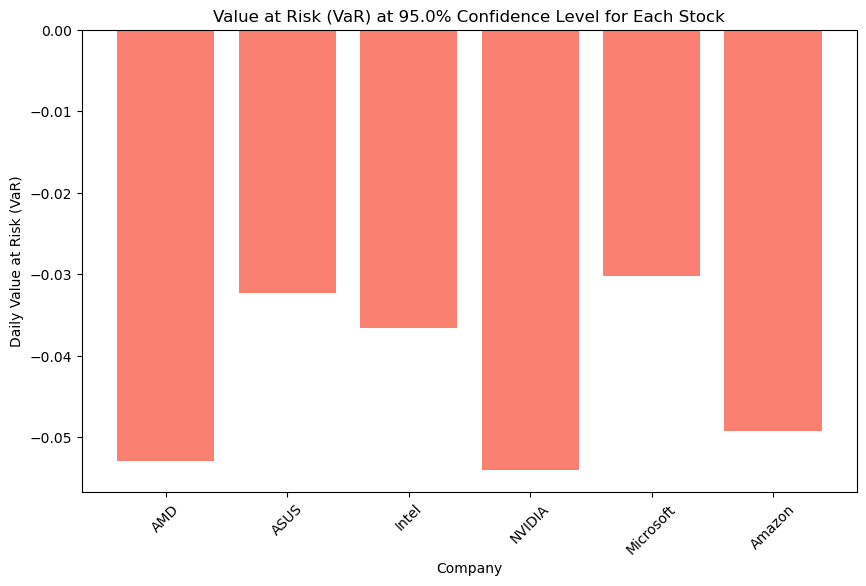

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(var_df['Company'], var_df['VaR'], color='salmon')
plt.title(f'Value at Risk (VaR) at {confidence_level*100}% Confidence Level for Each Stock')
plt.xlabel('Company')
plt.ylabel('Daily Value at Risk (VaR)')
plt.xticks(rotation=45)
plt.show()

In [86]:
data = amd_df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len

10374

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00880435],
       [0.00886934],
       [0.00867438],
       ...,
       [0.69786013],
       [0.6959261 ],
       [0.69848399]])

In [88]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00880435, 0.00886934, 0.00867438, 0.00808951, 0.00652983,
       0.00613992, 0.00516512, 0.00471021, 0.00575   , 0.00575   ,
       0.00698473, 0.00626989, 0.00633487, 0.00575   , 0.00607493,
       0.00652983, 0.00698473, 0.00633487, 0.00587997, 0.00587997,
       0.00458024, 0.00503514, 0.00438528, 0.00419032, 0.00587997,
       0.0062049 , 0.00724468, 0.00678977, 0.00691975, 0.00652983,
       0.00581498, 0.0052301 , 0.00529509, 0.00613992, 0.0066598 ,
       0.0066598 , 0.00613992, 0.00575   , 0.0062049 , 0.0066598 ,
       0.00717969, 0.00691975, 0.00652983, 0.0066598 , 0.00704972,
       0.00724468, 0.00808951, 0.00854441, 0.00867438, 0.0095192 ,
       0.00912928, 0.00964918, 0.00925926, 0.00873937, 0.0090643 ,
       0.00873937, 0.0086094 , 0.00776457, 0.00841444, 0.00893433])]
[0.009194272650963313]

[array([0.00880435, 0.00886934, 0.00867438, 0.00808951, 0.00652983,
       0.00613992, 0.00516512, 0.00471021, 0.00575   , 0.00575   ,
       0.00698473, 0.00626989, 0.0

In [89]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10314/10314 ━━━━━━━━━━━━━━━━━━━━ 277s 26ms/step - loss: 5.5146e-04


In [90]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


8.05691634963675

C:\Users\Aditya\AppData\Local\Temp\ipykernel_17624\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


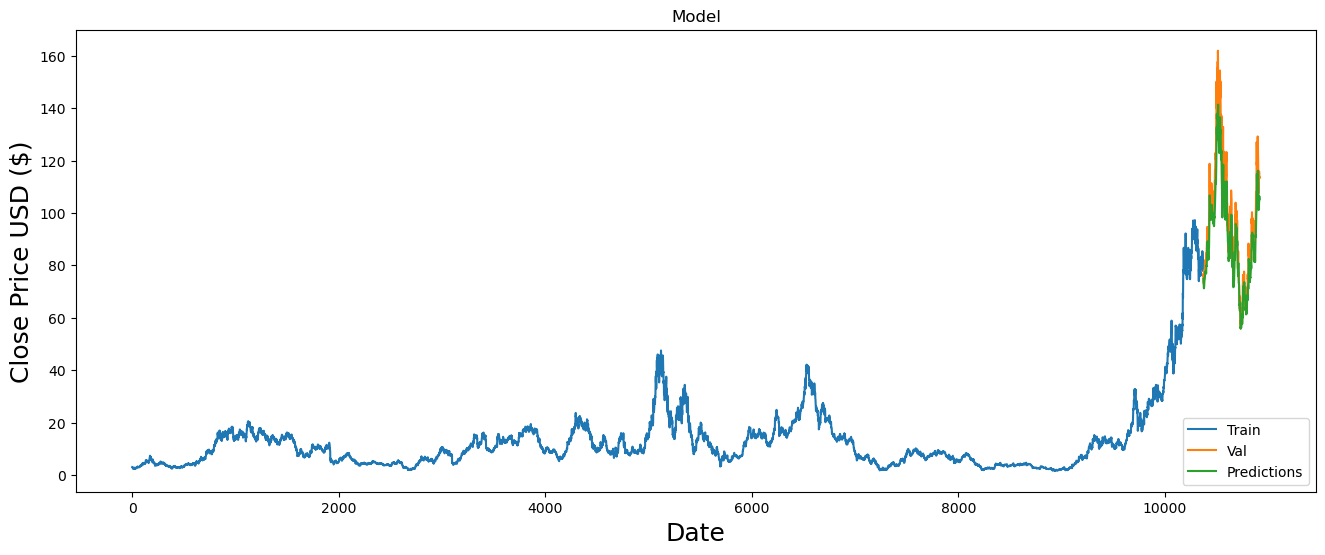

In [91]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [92]:
valid

Close  Predictions
10374   75.989998    74.976357
10375   76.830002    74.159218
10376   74.639999    73.817085
10377   73.089996    72.756248
10378   74.589996    71.367126
...           ...          ...
10914  115.820000   104.688042
10915  113.949997   106.340675
10916  113.480003   106.383575
10917  113.169998   105.822258
10918  113.580002   105.214218

[545 rows x 2 columns]

In [93]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

amd_df['Date'] = pd.to_datetime(amd_df['Date'])
amd_df.set_index('Date', inplace=True)

# Extract the 'Close' column as a time series
close_data = amd_df['Close']

adf_result = adfuller(close_data.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary, consider differencing.")

ADF Statistic: 0.005228816664447883
p-value: 0.9589623753013555
Data is not stationary, consider differencing.


In [94]:
close_data_diff = close_data.diff().dropna()

In [95]:
p, d, q = 1, 1, 1

model = ARIMA(close_data, order=(p, d, q))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10919
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15415.185
Date:                Wed, 04 Dec 2024   AIC                          30836.369
Time:                        04:19:07   BIC                          30858.264
Sample:                             0   HQIC                         30843.748
                              - 10919                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3992      0.080      5.007      0.000       0.243       0.555
ma.L1         -0.4231      0.079     -5.379      0.000      -0.577      -0.269
sigma2         0.9860      0.003    308.658      0.0

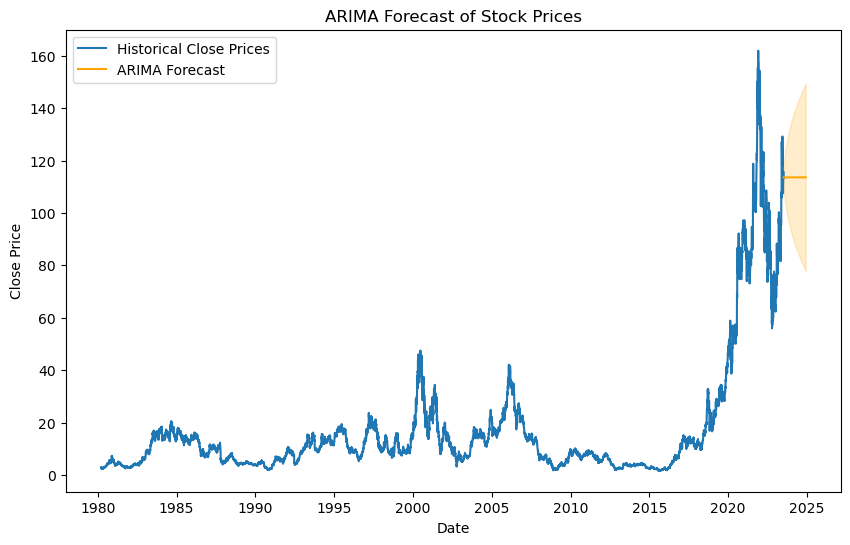

In [96]:
forecast_period = 365
forecast = arima_result.get_forecast(steps=forecast_period)
forecast_index = pd.date_range(start=close_data.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='B')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(close_data, label='Historical Close Prices')
plt.plot(forecast_index, forecast_mean, color='orange', label='ARIMA Forecast')
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast of Stock Prices')
plt.legend()
plt.show()

In [97]:
msft_df

Date        Open        High         Low       Close   Adj Close  \
0    1986-03-13    0.088542    0.101563    0.088542    0.097222    0.061434   
1    1986-03-14    0.097222    0.102431    0.097222    0.100694    0.063628   
2    1986-03-17    0.100694    0.103299    0.100694    0.102431    0.064725   
3    1986-03-18    0.102431    0.103299    0.098958    0.099826    0.063079   
4    1986-03-19    0.099826    0.100694    0.097222    0.098090    0.061982   
...         ...         ...         ...         ...         ...         ...   
9078 2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
9079 2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
9080 2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
9081 2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
9082 2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

          Volume  Year  Month  Moving_Avg  Daily Return  
0     1031788800  1986      3         NaN           NaN  
1      308160000  1986      3         NaN      0.035713  
2      133171200  1986      3         NaN      0.017241  
3       67766400  1986      3         NaN     -0.025431  
4       47894400  1986      3         NaN     -0.017391  
...          ...   ...    ...         ...           ...  
9078    43317000  2022      3  289.504001      0.017648  
9079    28351200  2022      3  290.065501     -0.004227  
9080    27599700  2022      3  290.882501      0.016379  
9081    25715400  2022      3  291.843501     -0.015030  
9082    24446900  2022      3  292.319002      0.015393  

[9083 rows x 11 columns]

In [98]:
msft_df['Date'][7982]

Timestamp('2017-11-08 00:00:00')

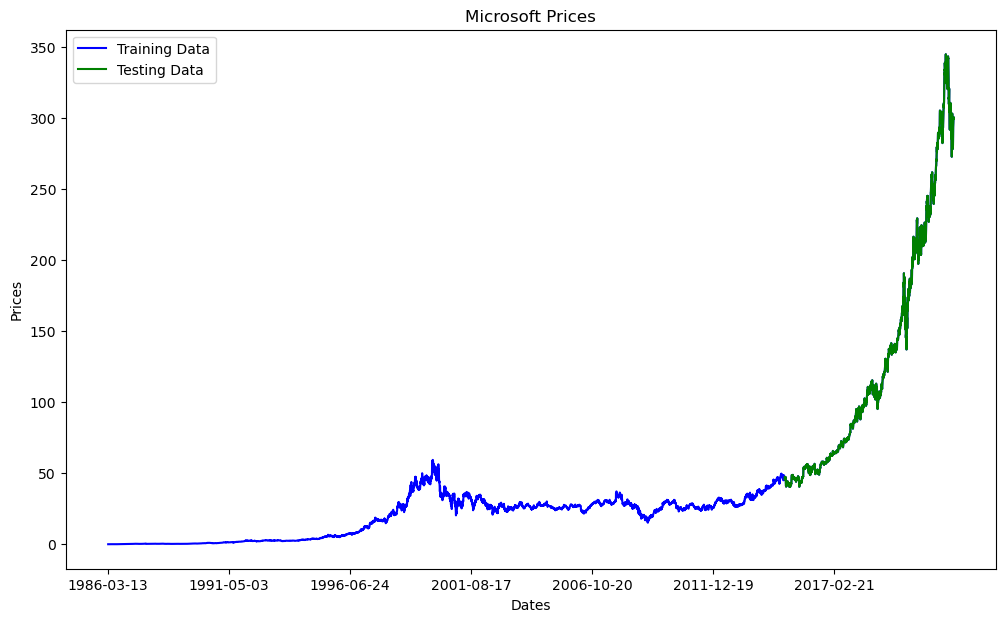

In [99]:
train_data, test_data = msft_df[0:int(len(msft_df)*0.8)], msft_df[int(len(msft_df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(msft_df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), msft_df['Date'][0:7982:1300].dt.strftime('%Y-%m-%d'))
plt.legend()

In [100]:
# def smape_kun(y_true, y_pred):
#     return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [101]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# history = [x for x in train_ar]
# predictions = []

# for t in range(len(test_ar)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_ar[t]
#     history.append(obs)

# # Calculate errors
# error = mean_squared_error(test_ar, predictions)
# print('Testing Mean Squared Error: %.3f' % error)
# error2 = smape_kun(test_ar, predictions)
# print('Symmetric mean absolute percentage error: %.3f' % error2)

In [102]:
# plt.figure(figsize=(12,7))
# plt.plot(msft_df['Open'], color='blue', label='Training Data')
# plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
#          label='Predicted Price')
# plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
# plt.title('Microsoft Prices Prediction')
# plt.xlabel('Dates')
# plt.ylabel('Prices')

# # Adjust the xticks and labels so they match in length
# date_ticks = np.arange(0, len(msft_df), 1300)
# plt.xticks(date_ticks, msft_df['Date'][date_ticks].dt.strftime('%Y-%m-%d'), rotation=45)

# plt.legend()
# plt.show()

In [103]:
# plt.figure(figsize=(12,7))
# plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
# plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
# plt.title('Microsoft Prices Prediction')
# plt.xlabel('Dates')
# plt.ylabel('Prices')

# # Set x-ticks and labels (ensuring matching lengths)
# date_ticks = np.arange(6386, 7982, 300)
# plt.xticks(date_ticks, msft_df['Date'][6386:7982:300].dt.strftime('%Y-%m-%d'), rotation=45)

# plt.legend()
# plt.show()

SENTIMENT ANALYSIS

In [104]:
# pip install vaderSentiment

In [105]:
# Load your dataset
df = pd.read_csv("analyst_ratings_processed.csv")

# Define company names and stock symbols
companies_and_stocks = ["Amazon", "Microsoft", "Intel","INTL", "NVIDIA","NVDA", "Asus","ASUUY","ASUSTeK" ,"AMD", 
                        "AMZN", "MSFT", "INTEL", "NVIDIA", "ASUS", "AMD"]

# Filter the DataFrame
filtered_df = df[df['title'].str.contains('|'.join(companies_and_stocks), case=False, na=False) |
                 df['stock'].str.contains('|'.join(companies_and_stocks), case=False, na=False)]

# Select relevant columns
filtered_df = filtered_df[['date', 'title']]

# Save or inspect the result
filtered_df.to_csv("filtered_news.csv", index=False)
print(filtered_df.head())


                          date  \
113  2019-08-01 03:26:00-04:00   
210  2018-04-18 11:07:00-04:00   
765  2011-05-13 09:49:00-04:00   
770  2011-05-13 00:25:00-04:00   
833  2010-11-12 02:57:00-05:00   

                                                 title  
113  Agilent Announces Settlement of Key Intellectu...  
210  Agilent Technologies Files Second Civil Action...  
765  Top day traders Stocks and nalyst Upgrades & D...  
770  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...  
833  Stocks To Watch For November 12 (CPKI, A, DIS,...  


In [106]:
news_df = filtered_df

In [107]:
news_df.shape

(15725, 2)

In [108]:
news_df.columns

Index(['date', 'title'], dtype='object')

In [109]:
print(news_df['date'])

113        2019-08-01 03:26:00-04:00
210        2018-04-18 11:07:00-04:00
765        2011-05-13 09:49:00-04:00
770        2011-05-13 00:25:00-04:00
833        2010-11-12 02:57:00-05:00
                     ...            
1398891    2018-02-20 15:01:00-05:00
1399298    2015-08-17 09:54:00-04:00
1399353    2015-02-12 09:41:00-05:00
1399609    2018-05-07 08:01:00-04:00
1399625    2018-03-12 13:12:00-04:00
Name: date, Length: 15725, dtype: object


In [110]:
# Check the data types of the columns in the dataframe
print(news_df.dtypes)

date     object
title    object
dtype: object


In [112]:
# Convert the 'date' column to datetime
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Verify the change
print(news_df.dtypes)

news_df['date'] = news_df['date'].dt.date

print(news_df.dtypes)


date     datetime64[ns, UTC-04:00]
title                       object
dtype: object
date     object
title    object
dtype: object


In [113]:
print(news_df.head())

           date                                              title
113  2019-08-01  Agilent Announces Settlement of Key Intellectu...
210  2018-04-18  Agilent Technologies Files Second Civil Action...
765  2011-05-13  Top day traders Stocks and nalyst Upgrades & D...
770  2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...
833         NaT  Stocks To Watch For November 12 (CPKI, A, DIS,...


In [114]:
# Set the 'date' column as the index
news_df.set_index('date', inplace=True)

# Verify the change
print(news_df.head())


                                                        title
date                                                         
2019-08-01  Agilent Announces Settlement of Key Intellectu...
2018-04-18  Agilent Technologies Files Second Civil Action...
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...
NaT         Stocks To Watch For November 12 (CPKI, A, DIS,...


In [115]:
duplicates = news_df[news_df.duplicated(subset=['title'], keep=False)]

print(duplicates)

                                                        title
date                                                         
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...
2009-08-17  Interface Masters Technologies Introduces Low-...
2009-08-14  Farmers Telephone Cooperative Selects ETI's Tr...
2009-08-12  Harvest Announces Closing of Pegasus Oil & Gas...
...                                                       ...
NaT         Stocks That Made New 52-Wk Highs Earlier Today...
2015-08-17  Quartz's Shelly Banjo Tweets: 'With purchase o...
NaT         Morning-Movers Led By Orbitz, Tripadvisor & NV...
2018-05-07  The Week Ahead: Nvidia And Dropbox Earnings, A...
2018-03-12  The Week Ahead: AMD's Ryzen Anniversary Webina...

[7710 rows x 1 columns]


In [116]:
news_df = news_df.drop_duplicates(subset=['title'])

In [117]:
news_df.shape

(10189, 1)

In [118]:
print(news_df.head())

                                                        title
date                                                         
2019-08-01  Agilent Announces Settlement of Key Intellectu...
2018-04-18  Agilent Technologies Files Second Civil Action...
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...
NaT         Stocks To Watch For November 12 (CPKI, A, DIS,...


In [119]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment into -1, 0, or 1
def sentiment_category(title):
    sentiment_score = sia.polarity_scores(title)['compound']
    if sentiment_score > 0:
        return 1  # Positive
    elif sentiment_score < 0:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply the sentiment_category function to the 'title' column and create a new 'sentiment' column
news_df['sentiment'] = news_df['title'].apply(sentiment_category)

# Verify the changes
print(news_df[['title', 'sentiment']].head())


                                                        title  sentiment
date                                                                    
2019-08-01  Agilent Announces Settlement of Key Intellectu...          1
2018-04-18  Agilent Technologies Files Second Civil Action...          1
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...          1
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...          0
NaT         Stocks To Watch For November 12 (CPKI, A, DIS,...          0


In [120]:
# Filter rows where sentiment is -1 (negative sentiment)
negative_sentiment_df = news_df[news_df['sentiment'] == -1]
neutral_sentiment_df = news_df[news_df['sentiment'] == 0]
positive_sentiment_df = news_df[news_df['sentiment'] == 1]

# Display the filtered dataframe
print("Shape for Negative Sentiment Dataset",negative_sentiment_df.shape)
print("Shape for Neutral Sentiment Dataset",neutral_sentiment_df.shape)
print("Shape for Positive Sentiment Dataset",positive_sentiment_df.shape)

Shape for Negative Sentiment Dataset (1472, 2)
Shape for Neutral Sentiment Dataset (3917, 2)
Shape for Positive Sentiment Dataset (4800, 2)


In [121]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK datasets
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


In [122]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Return the cleaned text
    return ' '.join(words)


In [123]:
# Apply the clean_text function to the 'title' column in the dataframe
news_df['cleaned_title'] = news_df['title'].apply(clean_text)

# Display the first few rows to verify
print(news_df[['title', 'cleaned_title']].head())


                                                        title  \
date                                                            
2019-08-01  Agilent Announces Settlement of Key Intellectu...   
2018-04-18  Agilent Technologies Files Second Civil Action...   
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...   
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...   
NaT         Stocks To Watch For November 12 (CPKI, A, DIS,...   

                                                cleaned_title  
date                                                           
2019-08-01  agilent announces settlement key intellectual ...  
2018-04-18  agilent technology file second civil action ch...  
2011-05-13  top day trader stock nalyst upgrade downgrade ...  
2011-05-13                  stock watch may jwn nvda yum feng  
NaT                    stock watch november cpki dis jcp nvda  


In [124]:
print(news_df.head())

                                                        title  sentiment  \
date                                                                       
2019-08-01  Agilent Announces Settlement of Key Intellectu...          1   
2018-04-18  Agilent Technologies Files Second Civil Action...          1   
2011-05-13  Top day traders Stocks and nalyst Upgrades & D...          1   
2011-05-13  Stocks To Watch For May 13 (A, JWN, NVDA, YUM,...          0   
NaT         Stocks To Watch For November 12 (CPKI, A, DIS,...          0   

                                                cleaned_title  
date                                                           
2019-08-01  agilent announces settlement key intellectual ...  
2018-04-18  agilent technology file second civil action ch...  
2011-05-13  top day trader stock nalyst upgrade downgrade ...  
2011-05-13                  stock watch may jwn nvda yum feng  
NaT                    stock watch november cpki dis jcp nvda  


In [125]:
# Replacing the 'title' column with 'cleaned_title' and renaming it as 'news'
news_df['news'] = news_df['cleaned_title']
news_df = news_df.drop(columns=['title', 'cleaned_title'])

# Displaying the updated dataframe
news_df.head()

sentiment                                               news
date                                                                    
2019-08-01          1  agilent announces settlement key intellectual ...
2018-04-18          1  agilent technology file second civil action ch...
2011-05-13          1  top day trader stock nalyst upgrade downgrade ...
2011-05-13          0                  stock watch may jwn nvda yum feng
NaT                 0             stock watch november cpki dis jcp nvda

In [126]:
# Filter the rows containing news related to AMD
amd_news_df = news_df[news_df['news'].str.contains('AMD', case=False, na=False)]

# Select the relevant columns: sentiment and news
amd_news_df = amd_news_df[['sentiment', 'news']]

# Display the first few rows of the new dataframe
print(amd_news_df.head())


            sentiment                                               news
date                                                                    
2018-05-30          0  cowen tech medium telecom conference begin tod...
2017-08-30          1  lightning round jim cramer share thought amd s...
2018-09-04          1  stock made new week high far today include amd...
2018-08-23          0  stock made new week high far today include cos...
2018-08-22          0  stock made new week high far today include adp...


In [127]:
print(amd_news_df.shape)

(974, 2)


In [128]:
# Filter the rows containing news related to ASUS
asus_news_df = news_df[news_df['news'].str.contains('ASUS|ASUUY|ASUSTeK', case=False, na=False)]

# Select the relevant columns: sentiment and news
asus_news_df = asus_news_df[['sentiment', 'news']]

# Display the first few rows of the new dataframe
print(asus_news_df.head())

            sentiment                                               news
date                                                                    
2009-08-12          0  harvest announces closing pegasus oil gas inc ...
2014-07-07          0  are management fund acquire pegasus business park
NaT                 0  window notebook arm holding processor lenovo a...
NaT                 0  american state water company announces promoti...
2015-03-14          1  astrazeneca announces positive brilinta result...


In [129]:
print(asus_news_df.shape)

(22, 2)


In [130]:
# For AMAZON or AMZN
amazon_news_df = news_df[news_df['news'].str.contains('AMAZON|AMZN|amazon', case=False, na=False)]
amazon_news_df = amazon_news_df[['sentiment', 'news']]


# For MICROSOFT
microsoft_news_df = news_df[news_df['news'].str.contains('MICROSOFT|MSFT|microsoft', case=False, na=False)]
microsoft_news_df = microsoft_news_df[['sentiment', 'news']]

# For INTEL
intel_news_df = news_df[news_df['news'].str.contains('INTEL|INTL|intel', case=False, na=False)]
intel_news_df = intel_news_df[['sentiment', 'news']]

# For NVIDIA
nvidia_news_df = news_df[news_df['news'].str.contains('NVIDIA|NVDA|nvidia', case=False, na=False)]
nvidia_news_df = nvidia_news_df[['sentiment', 'news']]

# Display the first few rows of each dataframe
print("Amazon News:")
print(amazon_news_df.head())
print(amazon_news_df.shape)
print("\nMicrosoft News:")
print(microsoft_news_df.head())
print(microsoft_news_df.shape)
print("\nIntel News:")
print(intel_news_df.head())
print(intel_news_df.shape)
print("\nNvidia News:")
print(nvidia_news_df.head())
print(nvidia_news_df.shape)


Amazon News:
            sentiment                                               news
date                                                                    
2009-08-10          0  aberdeen lead market first research firm offer...
NaT                 1  amazon traffic mindshare could huge opportunit...
NaT                 1  northcoast note saying seeing sign aaron progr...
2017-07-28          1  midmorning market update market open lower ama...
2018-05-07          1  applied optoelectronics amazon facebook micros...
(2160, 2)

Microsoft News:
            sentiment                                               news
date                                                                    
2009-08-17          0         microsofts first big newspaper partnership
2009-08-14          0  farmer telephone cooperative selects etis tria...
2018-05-07          1  applied optoelectronics amazon facebook micros...
NaT                 1  applied optoelectronics share spike low trader...
2010-10-01 

In [131]:
amd_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
1980-03-24    0.000000    2.916667    2.635417    2.666667    2.666667   
...                ...         ...         ...         ...         ...   
2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

              Volume  Year  Month  Moving_Avg  Daily Return  
Date                                                         
1980-03-18    727200  1980      3         NaN           NaN  
1980-03-19    295200  1980      3         NaN      0.003437  
1980-03-20    159600  1980      3         NaN     -0.010274  
1980-03-21    130800  1980      3         NaN     -0.031142  
1980-03-24    436800  1980      3         NaN     -0.085714  
...              ...   ...    ...         ...           ...  
2023-07-03  31860000  2023      7    117.6060      0.016768  
2023-07-05  49501600  2023      7    117.4070     -0.016146  
2023-07-06  42342000  2023      7    116.8695     -0.004125  
2023-07-07  37135100  2023      7    116.6365     -0.002732  
2023-07-10  48814600  2023      7    116.2630      0.003623  

[10919 rows x 10 columns]

In [132]:
amd_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Moving_Avg', 'Daily Return'],
      dtype='object')

In [133]:
# Step 1: Ensure both dataframes have the date index in the same format
amd_news_df.index = pd.to_datetime(amd_news_df.index).date
amd_df.index = pd.to_datetime(amd_df.index).date

# Step 2: Join the dataframes based on the date index
merged_df = amd_df.join(amd_news_df[['sentiment', 'news']], how='left')

# Display the merged dataframe
print(merged_df.head())


            Open      High       Low     Close  Adj Close  Volume  Year  \
1980-03-18   0.0  3.125000  2.937500  3.031250   3.031250  727200  1980   
1980-03-19   0.0  3.083333  3.020833  3.041667   3.041667  295200  1980   
1980-03-20   0.0  3.062500  3.010417  3.010417   3.010417  159600  1980   
1980-03-21   0.0  3.020833  2.906250  2.916667   2.916667  130800  1980   
1980-03-24   0.0  2.916667  2.635417  2.666667   2.666667  436800  1980   

            Month  Moving_Avg  Daily Return  sentiment news  
1980-03-18      3         NaN           NaN        NaN  NaN  
1980-03-19      3         NaN      0.003437        NaN  NaN  
1980-03-20      3         NaN     -0.010274        NaN  NaN  
1980-03-21      3         NaN     -0.031142        NaN  NaN  
1980-03-24      3         NaN     -0.085714        NaN  NaN  


In [134]:
# Filter rows where sentiment is 0, 1, or -1
amd_final_df = merged_df[merged_df['sentiment'].isin([0, -1, 1])]

# Display the filtered dataframe
print(amd_final_df.head())
amd_final_df.shape

            Open  High   Low  Close  Adj Close    Volume  Year  Month  \
2009-09-16  5.85  5.87  5.57   5.69       5.69  43399700  2009      9   
2009-10-12  6.13  6.29  6.08   6.14       6.14  38595800  2009     10   
2009-10-15  6.21  6.23  6.05   6.19       6.19  37778500  2009     10   
2009-10-20  5.94  6.18  5.92   5.98       5.98  35580300  2009     10   
2009-10-28  4.98  5.02  4.75   4.85       4.85  30672900  2009     10   

            Moving_Avg  Daily Return  sentiment  \
2009-09-16      4.6090     -0.032313        1.0   
2009-10-12      5.7335      0.044218        1.0   
2009-10-15      5.7975     -0.009600        0.0   
2009-10-20      5.7975      0.018739       -1.0   
2009-10-28      5.6840     -0.058252       -1.0   

                                                         news  
2009-09-16  amdocs dox announces phase framework supportin...  
2009-10-12      today morning top gainer snen mrna bbw amd bx  
2009-10-15        today earnings preview goog g ibm c amd ppg 

(574, 12)

In [135]:
# Convert index to datetime in both dataframes if not already in datetime format
amd_news_df.index = pd.to_datetime(amd_news_df.index)
amd_df.index = pd.to_datetime(amd_df.index)


In [136]:
# Check for missing dates in both dataframes (in terms of the index)
print(amd_news_df.index.isnull().sum())  # Missing dates in amd_news_df
print(amd_df.index.isnull().sum())  # Missing dates in amd_df

# Check for dates in amd_news_df that are not in amd_df
missing_dates = set(amd_news_df.index.date) - set(amd_df.index.date)
print(f"Missing dates: {missing_dates}")


391
0
Missing dates: {NaT, datetime.date(2012, 10, 30), datetime.date(2018, 8, 12), datetime.date(2018, 9, 22), datetime.date(2011, 4, 16), datetime.date(2017, 4, 14), datetime.date(2018, 6, 24), datetime.date(2017, 6, 25), datetime.date(2017, 7, 9), datetime.date(2020, 3, 14)}


In [137]:
# Function to merge stock data with news data based on date index
def merge_stock_news(stock_df, news_df, stock_date_col='Date', news_date_col='date'):
    # If the date is already set as the index, we don't need to convert it again
    if stock_df.index.name != stock_date_col:
        stock_df[stock_date_col] = pd.to_datetime(stock_df[stock_date_col]).dt.date
        stock_df.set_index(stock_date_col, inplace=True)

    # Ensure the news dataframe has the 'date' as datetime index
    news_df.index = pd.to_datetime(news_df.index).date

    # Merge the dataframes based on date index
    merged_df = stock_df.join(news_df[['sentiment', 'news']], how='left')

    return merged_df

# Merge all datasets using the function
asus_merged = merge_stock_news(asus_df, asus_news_df)
intel_merged = merge_stock_news(intel_df, intel_news_df)
nvidia_merged = merge_stock_news(nvidia_df, nvidia_news_df)
amzn_merged = merge_stock_news(amzn_df, amazon_news_df)
msft_merged = merge_stock_news(msft_df, microsoft_news_df)

# Display the first few rows of the merged dataframes
print(asus_merged.head())
print(intel_merged.head())
print(nvidia_merged.head())
print(amzn_merged.head())
print(msft_merged.head())


                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2000-01-05  438.747223  446.535675  436.151154  438.747223  89.092613   
2000-01-06  440.045380  447.833862  436.151154  437.449310  88.829048   
2000-01-07  432.256927  433.555084  425.766632  428.362701  86.983925   
2000-01-10  434.853271  454.324158  434.853271  450.429901  91.464920   
2000-01-11  463.410767  463.410767  442.641449  443.939606  90.146988   

                  Volume  Year  Month  Moving_Avg  Daily Return  sentiment  \
Date                                                                         
2000-01-05  6.106176e+09  2000      1         NaN           NaN        NaN   
2000-01-06  6.545984e+09  2000      1         NaN     -0.002958        NaN   
2000-01-07  4.764317e+09  2000      1         NaN     -0.020772        NaN   
2000-01-10  1.199988e+10  2000      1         NaN      0.051515        NaN   
2000-01-11  1.423350

In [138]:
# Filter rows where sentiment is 0, -1, or 1
def filter_sentiment(df):
    return df[df['sentiment'].isin([0, -1, 1])]

# Apply filtering to each merged dataframe
asus_final_df = filter_sentiment(asus_merged)
intel_final_df = filter_sentiment(intel_merged)
nvidia_final_df = filter_sentiment(nvidia_merged)
amzn_final_df = filter_sentiment(amzn_merged)
msft_final_df = filter_sentiment(msft_merged)

# Display the first few rows of the filtered dataframes
print(asus_final_df.head())
print(intel_final_df.head())
print(nvidia_final_df.head())
print(amzn_final_df.head())
print(msft_final_df.head())





                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2009-08-12  280.859039  285.767273  277.586914  283.040466   85.785866   
2011-05-12  215.573776  215.573776  211.885239  213.114761   88.672050   
2013-06-27  280.000000  281.500000  268.500000  272.500000  125.255814   
2013-09-09  240.000000  240.500000  236.000000  239.000000  119.122894   
2013-10-21  222.000000  222.000000  217.500000  218.000000  108.656029   

                Volume  Year  Month  Moving_Avg  Daily Return  sentiment  \
Date                                                                       
2009-08-12   4328537.0  2009      8  273.114973      0.011696        0.0   
2011-05-12   2710840.0  2011      5  208.811478     -0.017013        1.0   
2013-06-27  12986000.0  2013      6  307.350000     -0.053819        0.0   
2013-09-09   2784000.0  2013      9  237.625000     -0.002088        0.0   
2013-10-21   3348000.0  2

In [139]:
# Get the shape of each final dataframe
print("Shape of asus_final_df:", asus_final_df.shape)
print("Shape of intel_final_df:", intel_final_df.shape)
print("Shape of nvidia_final_df:", nvidia_final_df.shape)
print("Shape of amzn_final_df:", amzn_final_df.shape)
print("Shape of msft_final_df:", msft_final_df.shape)


Shape of asus_final_df: (14, 12)
Shape of intel_final_df: (1774, 12)
Shape of nvidia_final_df: (990, 12)
Shape of amzn_final_df: (1390, 12)
Shape of msft_final_df: (884, 12)


In [140]:
intel_final_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Moving_Avg', 'Daily Return', 'sentiment', 'news'],
      dtype='object')

In [141]:
# pip install xgboost

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF to the 'news' column
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features
news_tfidf = tfidf.fit_transform(amd_final_df['news']).toarray()

# Reset the index for both dataframes to avoid index conflicts
amd_final_df_reset = amd_final_df.drop(['Close', 'news'], axis=1).reset_index(drop=True)
news_tfidf_df_reset = pd.DataFrame(news_tfidf, columns=tfidf.get_feature_names_out()).reset_index(drop=True)

# Concatenate the dataframes
X = pd.concat([amd_final_df_reset, news_tfidf_df_reset], axis=1)

# Check the final features
print(X.head())



   Open  High   Low  Adj Close    Volume  Year  Month  Moving_Avg  \
0  5.85  5.87  5.57       5.69  43399700  2009      9      4.6090   
1  6.13  6.29  6.08       6.14  38595800  2009     10      5.7335   
2  6.21  6.23  6.05       6.19  37778500  2009     10      5.7975   
3  5.94  6.18  5.92       5.98  35580300  2009     10      5.7975   
4  4.98  5.02  4.75       4.85  30672900  2009     10      5.6840   

   Daily Return  sentiment  ...  technology     today       top  trading  \
0     -0.032313        1.0  ...         0.0  0.000000  0.000000      0.0   
1      0.044218        1.0  ...         0.0  0.627897  0.737674      0.0   
2     -0.009600        0.0  ...         0.0  0.524603  0.000000      0.0   
3      0.018739       -1.0  ...         0.0  0.000000  0.000000      0.0   
4     -0.058252       -1.0  ...         0.0  0.000000  0.000000      0.0   

   trust  update  upgrade  watch  week  wet  
0    0.0     0.0      0.0    0.0   0.0  0.0  
1    0.0     0.0      0.0    0.0   0

In [143]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # The compound score is a normalized score

# Apply the sentiment function to the 'news' column
amd_final_df['news_sentiment'] = amd_final_df['news'].apply(get_sentiment_score)

# Now, include the sentiment as a feature
X = amd_final_df.drop(['Close', 'news'], axis=1)
X['news_sentiment'] = amd_final_df['news_sentiment']


XGBoost Model MSE: 172.33492045585908


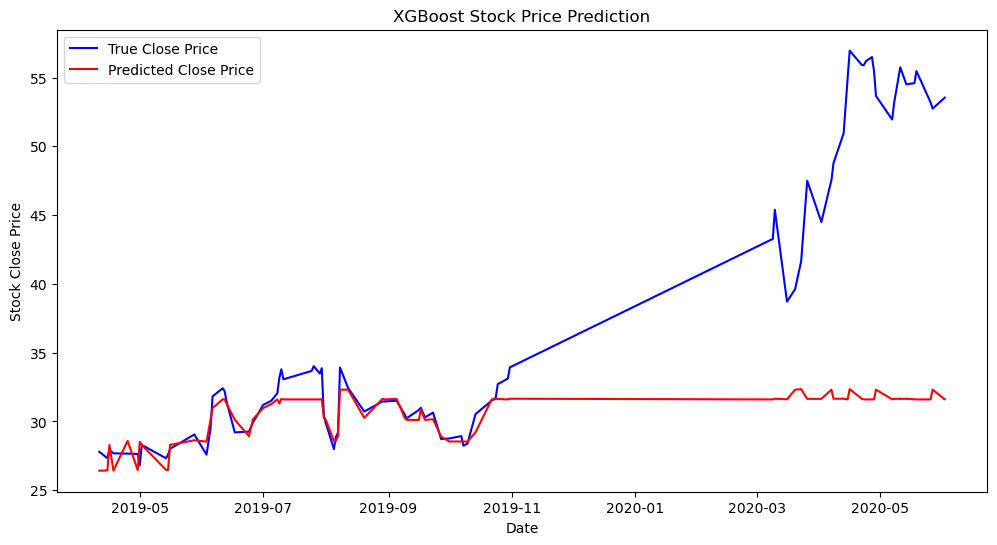

In [144]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Prepare the data
# Apply sentiment analysis to 'news' column (if not done already)
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Compound sentiment score

amd_final_df['news_sentiment'] = amd_final_df['news'].apply(get_sentiment_score)

# Step 2: Remove 'news' column and create features
X = amd_final_df.drop(['Close', 'news'], axis=1)
X['news_sentiment'] = amd_final_df['news_sentiment']

y = amd_final_df['Close']  # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train the XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model_xgb.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Model MSE: {mse_xgb}")

# Step 7: Plot predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='True Close Price', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='Predicted Close Price', color='red')
plt.title('XGBoost Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()


In [145]:
# # Check the column names used during training
# trained_columns = model_xgb.get_booster().feature_names
# print(f"Trained columns: {trained_columns}")

# # Step 1: Ensure that the columns in X_future match the trained columns
# X_future = future_data.copy()

# # Step 2: Make sure to match the columns with the trained columns
# X_future = X_future[trained_columns]  # Use the trained columns directly

# # Step 3: Make predictions for future stock prices
# future_predictions = model_xgb.predict(X_future)

# # Step 4: Add predictions to the future DataFrame
# future_data['Predicted_Close'] = future_predictions

# # Step 5: Display the future predictions
# print(future_data[['Predicted_Close']])

# # You can also plot the predicted future stock prices
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='green')
# plt.title('Predicted Future Stock Price for the Next 30 Days')
# plt.xlabel('Date')
# plt.ylabel('Stock Close Price')
# plt.legend()
# plt.show()


In [146]:
amd_df

Open        High         Low       Close   Adj Close  \
1980-03-18    0.000000    3.125000    2.937500    3.031250    3.031250   
1980-03-19    0.000000    3.083333    3.020833    3.041667    3.041667   
1980-03-20    0.000000    3.062500    3.010417    3.010417    3.010417   
1980-03-21    0.000000    3.020833    2.906250    2.916667    2.916667   
1980-03-24    0.000000    2.916667    2.635417    2.666667    2.666667   
...                ...         ...         ...         ...         ...   
2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

              Volume  Year  Month  Moving_Avg  Daily Return  
1980-03-18    727200  1980      3         NaN           NaN  
1980-03-19    295200  1980      3         NaN      0.003437  
1980-03-20    159600  1980      3         NaN     -0.010274  
1980-03-21    130800  1980      3         NaN     -0.031142  
1980-03-24    436800  1980      3         NaN     -0.085714  
...              ...   ...    ...         ...           ...  
2023-07-03  31860000  2023      7    117.6060      0.016768  
2023-07-05  49501600  2023      7    117.4070     -0.016146  
2023-07-06  42342000  2023      7    116.8695     -0.004125  
2023-07-07  37135100  2023      7    116.6365     -0.002732  
2023-07-10  48814600  2023      7    116.2630      0.003623  

[10919 rows x 10 columns]

In [147]:
# pip install "C:\Users\Aditya\TA_Lib-0.4.28-cp311-cp311-win_amd64.whl"

In [148]:
import pandas as pd
import talib

# Assuming 'df' is your DataFrame containing stock price data with 'Close' prices
# Moving Averages
amd_df['SMA'] = amd_df['Close'].rolling(window=14).mean()  # Simple Moving Average
amd_df['EMA'] = amd_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
amd_df['RSI'] = talib.RSI(amd_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
amd_df['MACD'], amd_df['MACD_signal'], amd_df['MACD_hist'] = talib.MACD(amd_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
amd_df['UpperBand'], amd_df['MiddleBand'], amd_df['LowerBand'] = talib.BBANDS(amd_df['Close'], timeperiod=20)

# Stochastic Oscillator
amd_df['SlowK'], amd_df['SlowD'] = talib.STOCH(amd_df['High'], amd_df['Low'], amd_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
amd_df = amd_df.dropna()


In [149]:
amd_df

Open        High         Low       Close   Adj Close  \
1980-05-05    0.000000    2.604167    2.500000    2.604167    2.604167   
1980-05-06    0.000000    2.729167    2.583333    2.687500    2.687500   
1980-05-07    0.000000    2.708333    2.656250    2.687500    2.687500   
1980-05-08    0.000000    2.687500    2.604167    2.604167    2.604167   
1980-05-09    0.000000    2.583333    2.531250    2.541667    2.541667   
...                ...         ...         ...         ...         ...   
2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

              Volume  Year  Month  Moving_Avg  Daily Return  ...         EMA  \
1980-05-05    302400  1980      5    2.565104      0.054852  ...    2.574285   
1980-05-06    386400  1980      5    2.569792      0.032000  ...    2.589380   
1980-05-07    138000  1980      5    2.570833      0.000000  ...    2.602463   
1980-05-08    225600  1980      5    2.564063     -0.031008  ...    2.602690   
1980-05-09    128400  1980      5    2.559375     -0.024000  ...    2.594553   
...              ...   ...    ...         ...           ...  ...         ...   
2023-07-03  31860000  2023      7  117.606000      0.016768  ...  114.305658   
2023-07-05  49501600  2023      7  117.407000     -0.016146  ...  114.258236   
2023-07-06  42342000  2023      7  116.869500     -0.004125  ...  114.154472   
2023-07-07  37135100  2023      7  116.636500     -0.002732  ...  114.023209   
2023-07-10  48814600  2023      7  116.263000      0.003623  ...  113.964114   

                  RSI      MACD  MACD_signal  MACD_hist   UpperBand  \
1980-05-05  47.156013 -0.038759    -0.045286   0.006528    2.838162   
1980-05-06  50.619529 -0.026766    -0.041582   0.014816    2.847829   
1980-05-07  50.619529 -0.017066    -0.036679   0.019613    2.850466   
1980-05-08  47.043580 -0.015919    -0.032527   0.016608    2.833391   
1980-05-09  44.504232 -0.019825    -0.029987   0.010162    2.826830   
...               ...       ...          ...        ...         ...   
2023-07-03  53.212909  0.357988     1.653349  -1.295361  130.569234   
2023-07-05  50.534176  0.322303     1.387140  -1.064837  130.466070   
2023-07-06  49.854886  0.253180     1.160348  -0.907168  129.642803   
2023-07-07  49.383354  0.171409     0.962560  -0.791151  129.500903   
2023-07-10  50.056160  0.138096     0.797667  -0.659571  129.026522   

            MiddleBand   LowerBand      SlowK      SlowD  
1980-05-05    2.565104    2.292047  44.230804  46.153859  
1980-05-06    2.569792    2.291755  58.333379  47.863273  
1980-05-07    2.570833    2.291201  71.644075  58.069419  
1980-05-08    2.564063    2.294734  71.392685  67.123380  
1980-05-09    2.559375    2.291920  58.450093  67.162285  
...                ...         ...        ...        ...  
2023-07-03  117.606000  104.642767  25.540448  19.145622  
2023-07-05  117.407000  104.347930  31.244920  25.003966  
2023-07-06  116.869500  104.096197  33.769152  30.184840  
2023-07-07  116.636500  103.772097  33.270364  32.761478  
2023-07-10  116.263000  103.499478  36.950157  34.663224  

[10886 rows x 21 columns]

In [150]:
# Features: using technical indicators
X = amd_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
amd_df['Next_Close'] = amd_df['Close'].shift(-1)  # Target for next day's close price
y = amd_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

amd_df


Open        High         Low       Close   Adj Close  \
1980-05-05    0.000000    2.604167    2.500000    2.604167    2.604167   
1980-05-06    0.000000    2.729167    2.583333    2.687500    2.687500   
1980-05-07    0.000000    2.708333    2.656250    2.687500    2.687500   
1980-05-08    0.000000    2.687500    2.604167    2.604167    2.604167   
1980-05-09    0.000000    2.583333    2.531250    2.541667    2.541667   
...                ...         ...         ...         ...         ...   
2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

              Volume  Year  Month  Moving_Avg  Daily Return  ...        RSI  \
1980-05-05    302400  1980      5    2.565104      0.054852  ...  47.156013   
1980-05-06    386400  1980      5    2.569792      0.032000  ...  50.619529   
1980-05-07    138000  1980      5    2.570833      0.000000  ...  50.619529   
1980-05-08    225600  1980      5    2.564063     -0.031008  ...  47.043580   
1980-05-09    128400  1980      5    2.559375     -0.024000  ...  44.504232   
...              ...   ...    ...         ...           ...  ...        ...   
2023-07-03  31860000  2023      7  117.606000      0.016768  ...  53.212909   
2023-07-05  49501600  2023      7  117.407000     -0.016146  ...  50.534176   
2023-07-06  42342000  2023      7  116.869500     -0.004125  ...  49.854886   
2023-07-07  37135100  2023      7  116.636500     -0.002732  ...  49.383354   
2023-07-10  48814600  2023      7  116.263000      0.003623  ...  50.056160   

                MACD  MACD_signal  MACD_hist   UpperBand  MiddleBand  \
1980-05-05 -0.038759    -0.045286   0.006528    2.838162    2.565104   
1980-05-06 -0.026766    -0.041582   0.014816    2.847829    2.569792   
1980-05-07 -0.017066    -0.036679   0.019613    2.850466    2.570833   
1980-05-08 -0.015919    -0.032527   0.016608    2.833391    2.564063   
1980-05-09 -0.019825    -0.029987   0.010162    2.826830    2.559375   
...              ...          ...        ...         ...         ...   
2023-07-03  0.357988     1.653349  -1.295361  130.569234  117.606000   
2023-07-05  0.322303     1.387140  -1.064837  130.466070  117.407000   
2023-07-06  0.253180     1.160348  -0.907168  129.642803  116.869500   
2023-07-07  0.171409     0.962560  -0.791151  129.500903  116.636500   
2023-07-10  0.138096     0.797667  -0.659571  129.026522  116.263000   

             LowerBand      SlowK      SlowD  Next_Close  
1980-05-05    2.292047  44.230804  46.153859    2.687500  
1980-05-06    2.291755  58.333379  47.863273    2.687500  
1980-05-07    2.291201  71.644075  58.069419    2.604167  
1980-05-08    2.294734  71.392685  67.123380    2.541667  
1980-05-09    2.291920  58.450093  67.162285    2.614583  
...                ...        ...        ...         ...  
2023-07-03  104.642767  25.540448  19.145622  113.949997  
2023-07-05  104.347930  31.244920  25.003966  113.480003  
2023-07-06  104.096197  33.769152  30.184840  113.169998  
2023-07-07  103.772097  33.270364  32.761478  113.580002  
2023-07-10  103.499478  36.950157  34.663224         NaN  

[10886 rows x 22 columns]

FUNCTION FOR FEATURE VISUALIZATION

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the charts for each dataset
def plot_technical_indicators(df, stock_name):
    # Plotting Close Price with Moving Averages
    plt.figure(figsize=(12, 7))
    plt.plot(df['Close'], label=f'{stock_name} Close Price', color='blue', alpha=0.5)
    plt.plot(df['Moving_Avg'], label=f'{stock_name} 30-Day MA', color='orange', linewidth=2)
    plt.plot(df['Moving_Avg'].rolling(window=60).mean(), label=f'{stock_name} 60-Day MA', color='green', linewidth=2)
    plt.plot(df['Moving_Avg'].rolling(window=90).mean(), label=f'{stock_name} 90-Day MA', color='red', linewidth=2)
    plt.title(f'{stock_name} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plotting RSI
    plt.figure(figsize=(12, 7))
    plt.plot(df['RSI'], label=f'{stock_name} RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'{stock_name} RSI (Relative Strength Index)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plotting MACD and Signal Line
    plt.figure(figsize=(12, 7))
    plt.plot(df['MACD'], label=f'{stock_name} MACD', color='blue')
    plt.plot(df['MACD_signal'], label=f'{stock_name} MACD Signal Line', color='red', linestyle='--')
    plt.title(f'{stock_name} MACD and Signal Line')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plotting Close price and Bollinger Bands
    plt.figure(figsize=(12, 7))
    plt.plot(df['Close'], label=f'{stock_name} Close Price', color='blue', alpha=0.5)
    plt.plot(df['UpperBand'], label=f'{stock_name} Upper Bollinger Band', color='red', linestyle='--')
    plt.plot(df['LowerBand'], label=f'{stock_name} Lower Bollinger Band', color='green', linestyle='--')
    plt.title(f'{stock_name} Stock Price with Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Correlation Heatmap of Technical Indicators
    correlation_columns = ['RSI', 'MACD', 'MACD_signal', 'UpperBand', 'LowerBand', 'Volume']
    correlation_matrix = df[correlation_columns].corr()
    plt.figure(figsize=(10, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap of Technical Indicators for {stock_name}')
    plt.show()

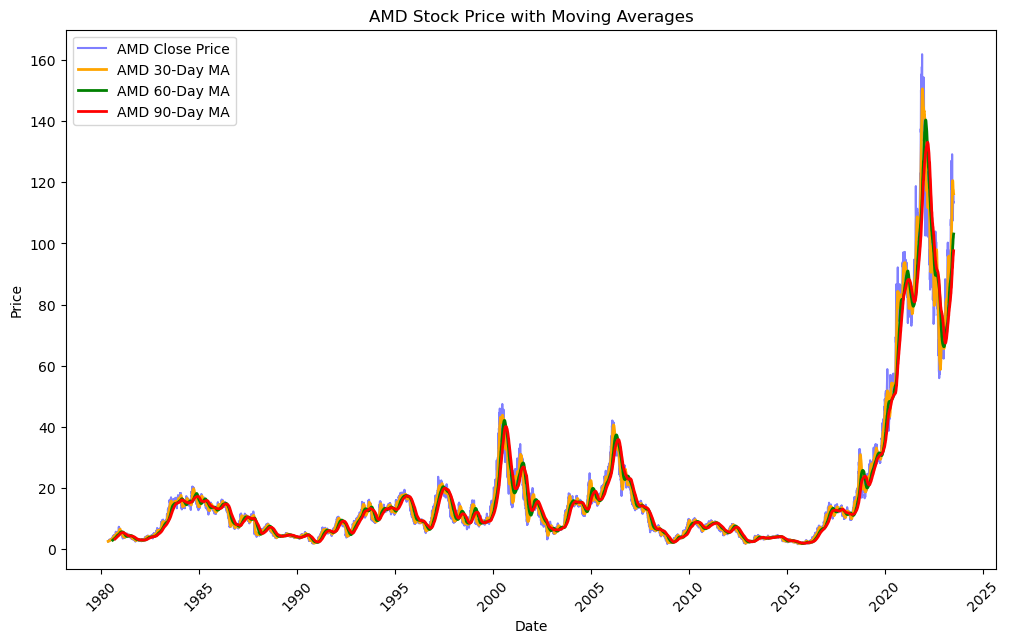

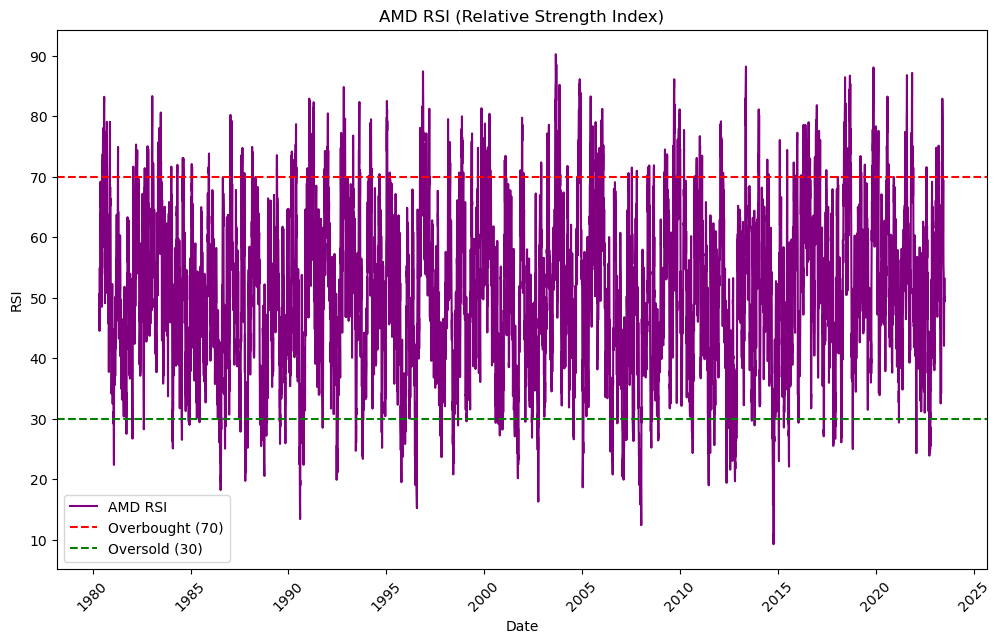

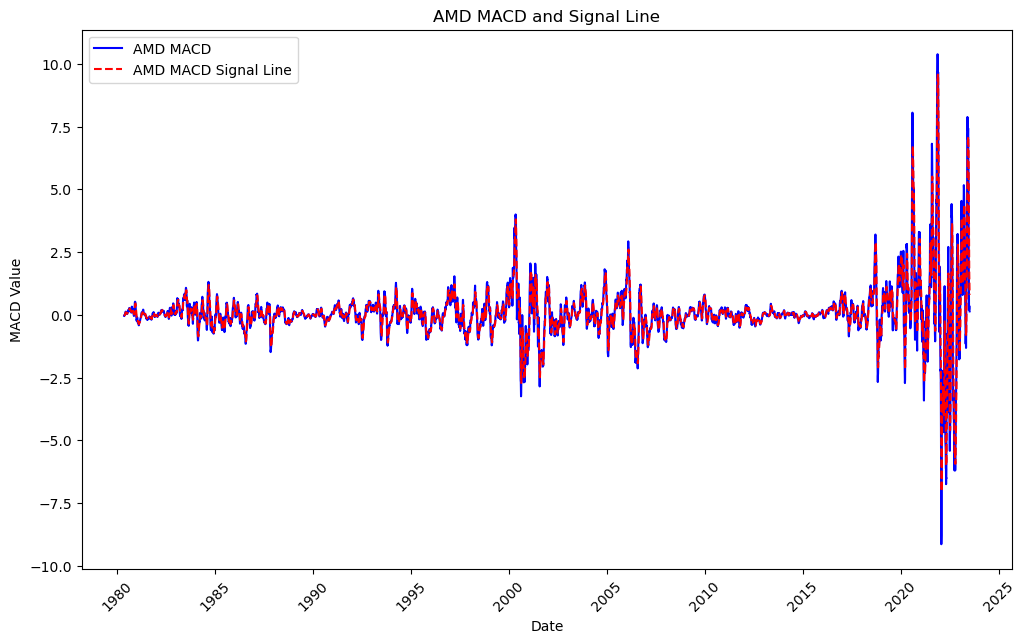

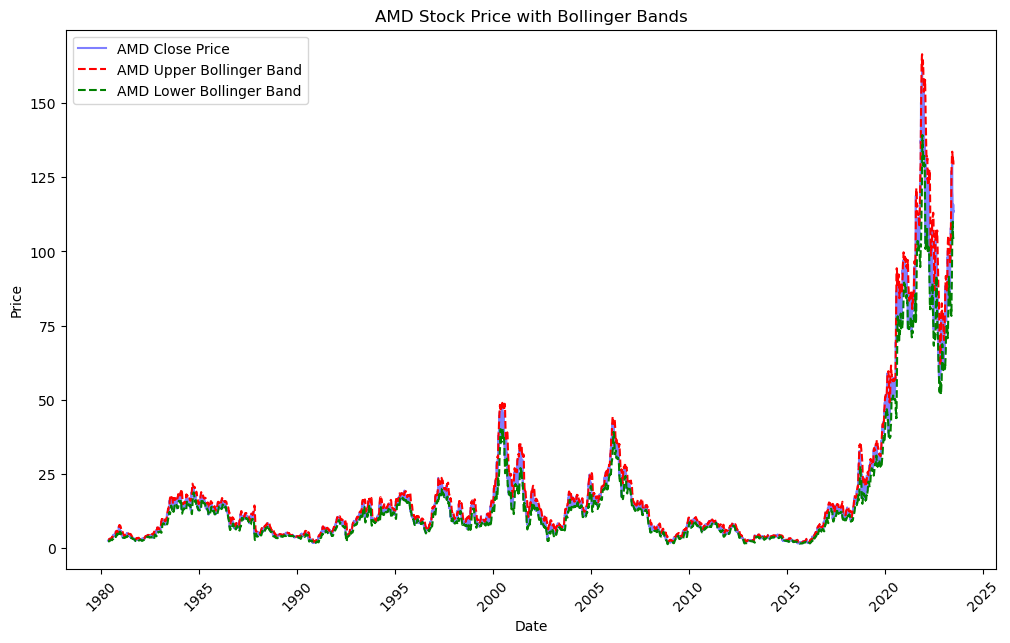

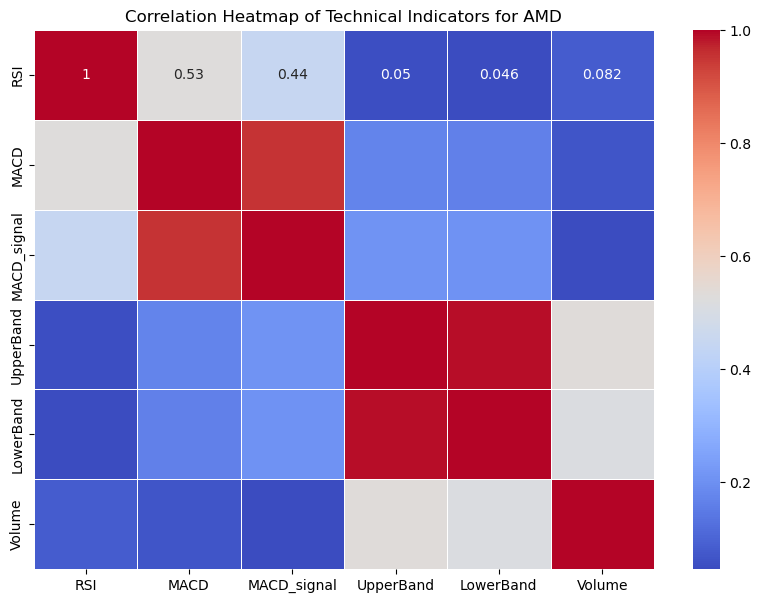

In [152]:
# For AMD
plot_technical_indicators(amd_df, 'AMD')

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 1.103600395202466


In [154]:
# Predicting for 30 days
future_data = amd_df.tail(30)
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions
print(future_data[['Close', 'Predicted_Close']])


                 Close  Predicted_Close
2023-05-25  120.349998       116.393900
2023-05-26  127.029999       122.828598
2023-05-30  125.269997       121.446499
2023-05-31  118.209999       118.862301
2023-06-01  119.470001       117.837701
2023-06-02  117.860001       118.204500
2023-06-05  117.930000       122.086202
2023-06-06  124.230003       119.202402
2023-06-07  117.830002       121.062702
2023-06-08  121.050003       123.198899
2023-06-09  124.919998       127.300201
2023-06-12  129.190002       125.566400
2023-06-13  124.529999       126.539201
2023-06-14  127.330002       127.105201
2023-06-15  124.239998       121.319501
2023-06-16  120.080002       117.803600
2023-06-20  118.930000       113.532701
2023-06-21  112.110001       111.894498
2023-06-22  110.699997       109.858100
2023-06-23  110.010002       108.419801
2023-06-26  107.510002       109.719199
2023-06-27  110.389999       109.731899
2023-06-28  110.169998       109.659899
2023-06-29  111.239998       113.261200


RMSE: 0.6250385376823112
                 Close  Predicted_Close
2023-02-14   85.949997        85.555998
2023-02-15   85.180000        85.627700
2023-02-16   80.080002        81.227801
2023-02-17   78.500000        78.975300
2023-02-21   76.769997        77.228398
...                ...              ...
2023-07-03  115.820000       115.877900
2023-07-05  113.949997       114.003699
2023-07-06  113.480003       113.048102
2023-07-07  113.169998       112.071501
2023-07-10  113.580002       112.539001

[100 rows x 2 columns]


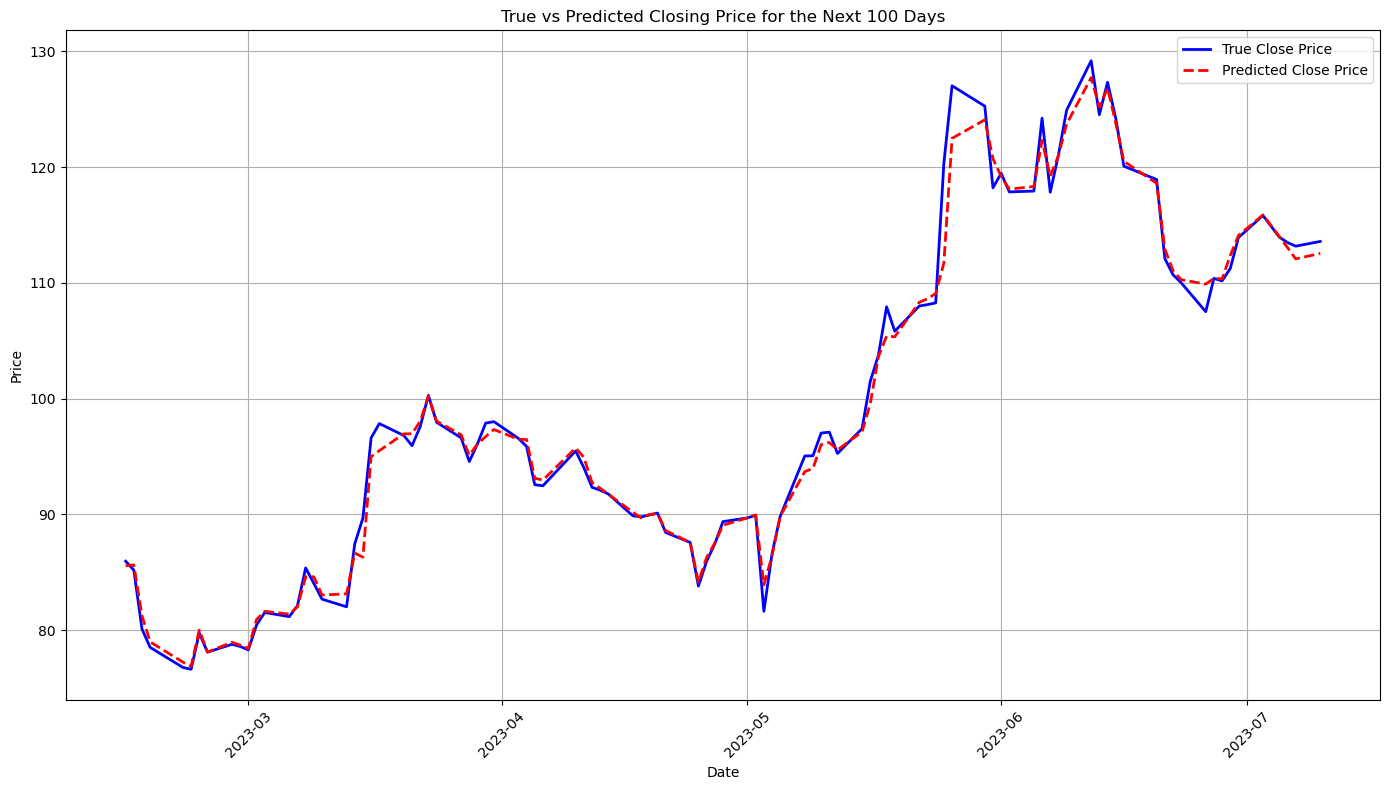

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = amd_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = amd_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = amd_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price for the Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [156]:
amd_df.tail(100)

Open        High         Low       Close   Adj Close  \
2023-02-14   82.699997   86.190002   81.769997   85.949997   85.949997   
2023-02-15   85.099998   85.889999   83.320000   85.180000   85.180000   
2023-02-16   82.980003   83.349998   80.050003   80.080002   80.080002   
2023-02-17   79.599998   79.650002   77.370003   78.500000   78.500000   
2023-02-21   77.150002   78.459999   76.449997   76.769997   76.769997   
...                ...         ...         ...         ...         ...   
2023-07-03  115.160004  116.730003  114.510002  115.820000  115.820000   
2023-07-05  116.099998  117.660004  113.860001  113.949997  113.949997   
2023-07-06  112.070000  113.790001  110.309998  113.480003  113.480003   
2023-07-07  114.160004  115.330002  113.040001  113.169998  113.169998   
2023-07-10  113.000000  113.610001  109.879997  113.580002  113.580002   

              Volume  Year  Month  Moving_Avg  Daily Return  ...        RSI  \
2023-02-14  55979700  2023      2     78.9850      0.033923  ...  63.947490   
2023-02-15  46430200  2023      2     79.7175     -0.008959  ...  62.272054   
2023-02-16  57755200  2023      2     80.3360     -0.059873  ...  52.466880   
2023-02-17  47826600  2023      2     80.7575     -0.019730  ...  49.848191   
2023-02-21  44045600  2023      2     80.7695     -0.022038  ...  47.077514   
...              ...   ...    ...         ...           ...  ...        ...   
2023-07-03  31860000  2023      7    117.6060      0.016768  ...  53.212909   
2023-07-05  49501600  2023      7    117.4070     -0.016146  ...  50.534176   
2023-07-06  42342000  2023      7    116.8695     -0.004125  ...  49.854886   
2023-07-07  37135100  2023      7    116.6365     -0.002732  ...  49.383354   
2023-07-10  48814600  2023      7    116.2630      0.003623  ...  50.056160   

                MACD  MACD_signal  MACD_hist   UpperBand  MiddleBand  \
2023-02-14  4.006217     3.826647   0.179569   91.360049     78.9850   
2023-02-15  3.947763     3.850870   0.096892   91.733066     79.7175   
2023-02-16  3.450140     3.770724  -0.320585   91.014666     80.3360   
2023-02-17  2.894906     3.595561  -0.700655   90.396965     80.7575   
2023-02-21  2.288897     3.334228  -1.045330   90.388460     80.7695   
...              ...          ...        ...         ...         ...   
2023-07-03  0.357988     1.653349  -1.295361  130.569234    117.6060   
2023-07-05  0.322303     1.387140  -1.064837  130.466070    117.4070   
2023-07-06  0.253180     1.160348  -0.907168  129.642803    116.8695   
2023-07-07  0.171409     0.962560  -0.791151  129.500903    116.6365   
2023-07-10  0.138096     0.797667  -0.659571  129.026522    116.2630   

             LowerBand      SlowK      SlowD  Next_Close  
2023-02-14   66.609951  67.947948  66.179437   85.180000  
2023-02-15   67.701934  75.241455  68.684764   80.080002  
2023-02-16   69.657334  69.229245  70.806216   78.500000  
2023-02-17   71.118035  54.543663  66.338121   76.769997  
2023-02-21   71.150540  29.476136  51.083014   76.610001  
...                ...        ...        ...         ...  
2023-07-03  104.642767  25.540448  19.145622  113.949997  
2023-07-05  104.347930  31.244920  25.003966  113.480003  
2023-07-06  104.096197  33.769152  30.184840  113.169998  
2023-07-07  103.772097  33.270364  32.761478  113.580002  
2023-07-10  103.499478  36.950157  34.663224         NaN  

[100 rows x 22 columns]

RMSE: 1.2610095146624558
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
Shape of X_future: (1, 12)
            Predicted_Close
2023-07-10        65.954436
2023-07-11        57.070537
2023-07-12        52.511057
2023-07-13        45.688396
2023-07-14        40.8072

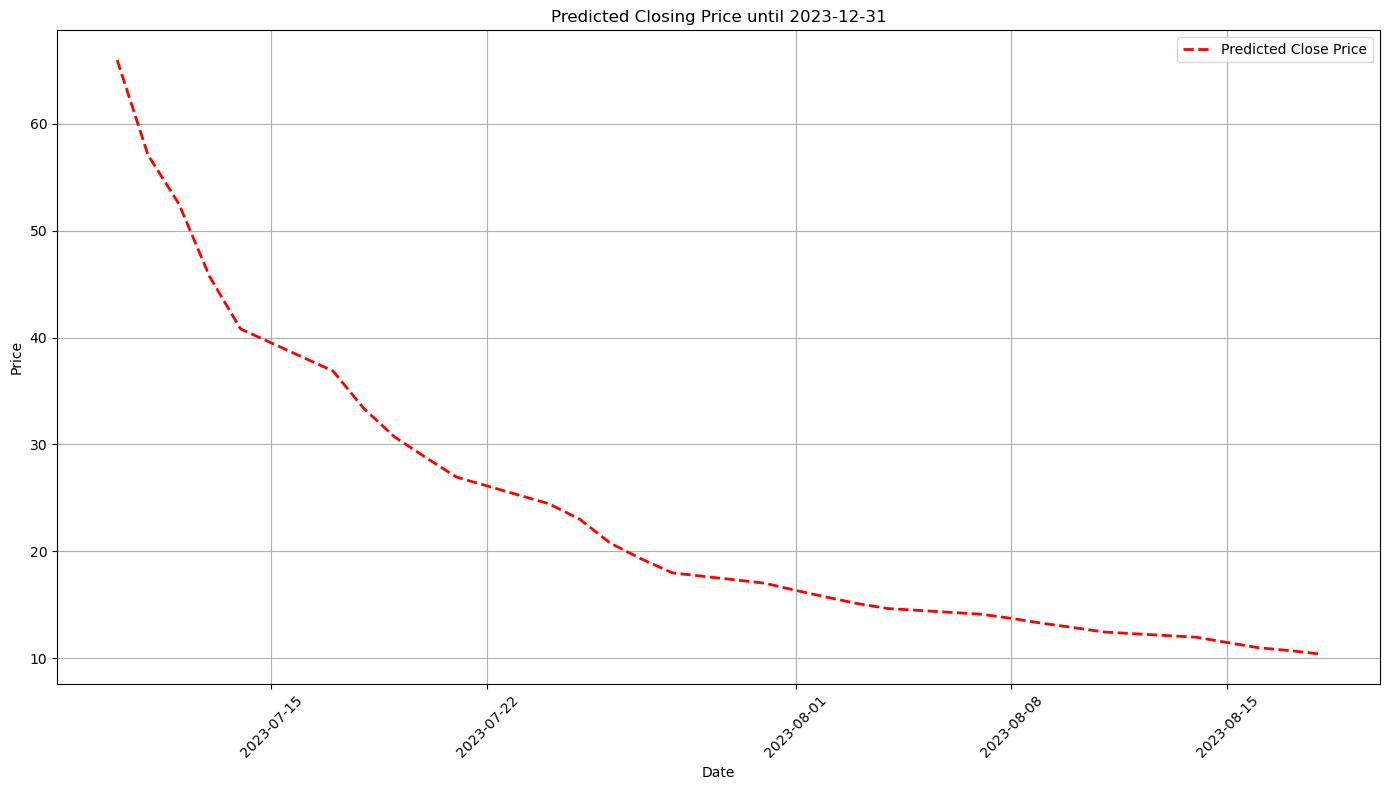

In [157]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = amd_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = amd_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = amd_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-18)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price until 2023-12-31')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (8708, 12), Test data shape: (2178, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8708
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1151.586
Date:                Wed, 04 Dec 2024   AIC                          -2267.172
Time:                        04:23:14   BIC                          -2139.878
Sample:                             0   HQIC                         -2223.785
                               - 8708                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             1.6894      0.022     77.204      0.000       1.647       1.732
EMA            -1.6073      0.036    -45.216      0.000      -1.677

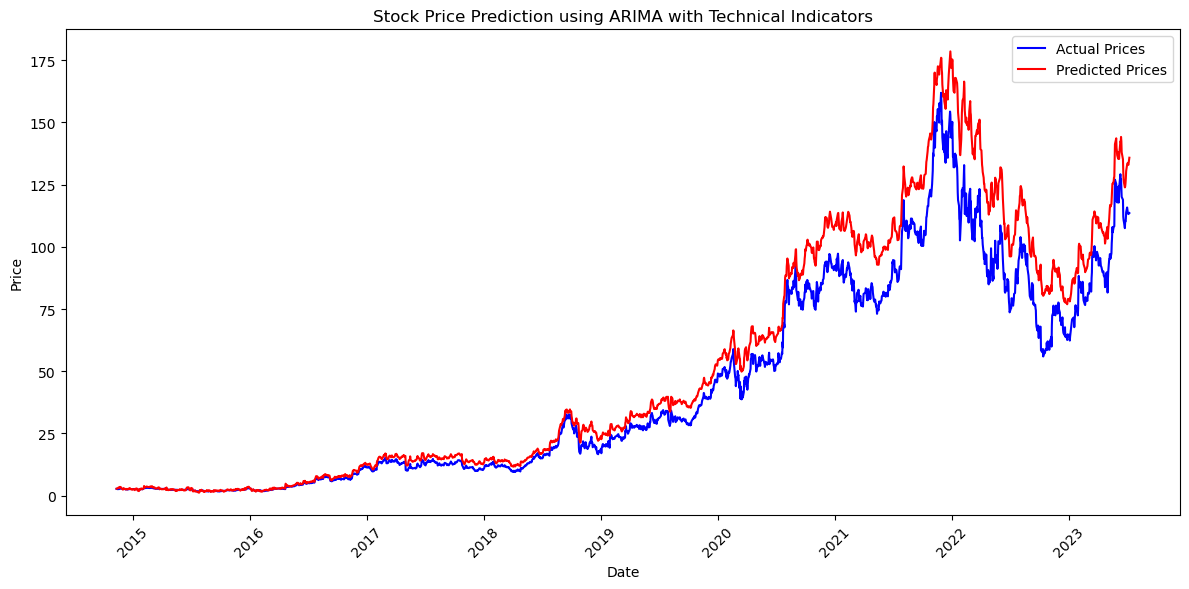

RMSE: 12.523194443146595


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you already have amd_df loaded with necessary columns
# Make sure 'amd_df' includes the required columns: 'Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', etc.

# Replace null values in 'Next_Close' with the mean of the column
amd_df['Next_Close'] = amd_df['Next_Close'].fillna(amd_df['Next_Close'].mean())

# Select relevant columns for features and target
X = amd_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = amd_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('Stock Price Prediction using ARIMA with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Predicting for ASUS Stocks

In [159]:
asus_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-05  438.747223  446.535675  436.151154  438.747223   89.092613   
2000-01-06  440.045380  447.833862  436.151154  437.449310   88.829048   
2000-01-07  432.256927  433.555084  425.766632  428.362701   86.983925   
2000-01-10  434.853271  454.324158  434.853271  450.429901   91.464920   
2000-01-11  463.410767  463.410767  442.641449  443.939606   90.146988   
...                ...         ...         ...         ...         ...   
2023-07-04  298.500000  302.500000  293.000000  293.500000  293.500000   
2023-07-05  294.000000  298.000000  292.000000  296.500000  296.500000   
2023-07-06  298.000000  302.500000  295.500000  300.000000  300.000000   
2023-07-07  300.000000  300.000000  291.000000  293.000000  293.000000   
2023-07-10  293.000000  295.000000  291.000000  292.000000  292.000000   

                  Volume  Year  Month  Moving_Avg  Daily Return  
Date                                                             
2000-01-05  6.106176e+09  2000      1         NaN           NaN  
2000-01-06  6.545984e+09  2000      1         NaN     -0.002958  
2000-01-07  4.764317e+09  2000      1         NaN     -0.020772  
2000-01-10  1.199988e+10  2000      1         NaN      0.051515  
2000-01-11  1.423350e+10  2000      1         NaN     -0.014409  
...                  ...   ...    ...         ...           ...  
2023-07-04  6.790210e+06  2023      7     314.525     -0.013445  
2023-07-05  1.683419e+06  2023      7     313.675      0.010221  
2023-07-06  2.966401e+06  2023      7     313.025      0.011804  
2023-07-07  2.140715e+06  2023      7     311.950     -0.023333  
2023-07-10  1.432084e+06  2023      7     310.850     -0.003413  

[5746 rows x 10 columns]

In [160]:
import talib

# Calculate technical indicators for asus_df

# Simple Moving Average
asus_df['SMA'] = asus_df['Close'].rolling(window=14).mean()  # Simple Moving Average

# Exponential Moving Average
asus_df['EMA'] = asus_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
asus_df['RSI'] = talib.RSI(asus_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
asus_df['MACD'], asus_df['MACD_signal'], asus_df['MACD_hist'] = talib.MACD(asus_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
asus_df['UpperBand'], asus_df['MiddleBand'], asus_df['LowerBand'] = talib.BBANDS(asus_df['Close'], timeperiod=20)

# Stochastic Oscillator
asus_df['SlowK'], asus_df['SlowD'] = talib.STOCH(asus_df['High'], asus_df['Low'], asus_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
asus_df = asus_df.dropna()


# Features: using technical indicators
X = asus_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
asus_df['Next_Close'] = asus_df['Close'].shift(-1)  # Target for next day's close price
y = asus_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

asus_df


Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-02-21  493.266144  494.564331  480.285583  482.881622   98.054611   
2000-02-22  480.285583  490.670105  480.285583  485.477966   98.581825   
2000-02-23  486.775879  490.670105  482.881622  484.179810   98.318230   
2000-02-24  493.266144  494.564331  486.775879  486.775879   98.845390   
2000-02-25  490.670105  491.968262  486.775879  488.074036   99.109001   
...                ...         ...         ...         ...         ...   
2023-07-04  298.500000  302.500000  293.000000  293.500000  293.500000   
2023-07-05  294.000000  298.000000  292.000000  296.500000  296.500000   
2023-07-06  298.000000  302.500000  295.500000  300.000000  300.000000   
2023-07-07  300.000000  300.000000  291.000000  293.000000  293.000000   
2023-07-10  293.000000  295.000000  291.000000  292.000000  292.000000   

                  Volume  Year  Month  Moving_Avg  Daily Return  ...  \
Date                                                             ...   
2000-02-21  5.685368e+09  2000      2  494.888786     -0.041237  ...   
2000-02-22  5.755651e+09  2000      2  495.667633      0.005377  ...   
2000-02-23  3.003363e+09  2000      2  495.927254     -0.002674  ...   
2000-02-24  4.451457e+09  2000      2  496.576283      0.005362  ...   
2000-02-25  2.730932e+09  2000      2  497.160419      0.002667  ...   
...                  ...   ...    ...         ...           ...  ...   
2023-07-04  6.790210e+06  2023      7  314.525000     -0.013445  ...   
2023-07-05  1.683419e+06  2023      7  313.675000      0.010221  ...   
2023-07-06  2.966401e+06  2023      7  313.025000      0.011804  ...   
2023-07-07  2.140715e+06  2023      7  311.950000     -0.023333  ...   
2023-07-10  1.432084e+06  2023      7  310.850000     -0.003413  ...   

                  RSI       MACD  MACD_signal  MACD_hist   UpperBand  \
Date                                                                   
2000-02-21  48.812748  10.043938    12.465876  -2.421939  524.442319   
2000-02-22  50.119416   8.144502    11.601601  -3.457100  523.304927   
2000-02-23  49.439853   6.459968    10.573275  -4.113307  523.025193   
2000-02-24  50.874370   5.273652     9.513350  -4.239698  522.098786   
2000-02-25  51.613662   4.387661     8.488212  -4.100551  521.305903   
...               ...        ...          ...        ...         ...   
2023-07-04  34.430932   1.122972     3.687422  -2.564450  326.316840   
2023-07-05  37.943349  -0.145788     2.920780  -3.066568  327.849890   
2023-07-06  41.856611  -0.858967     2.164831  -3.023798  328.405101   
2023-07-07  36.851432  -1.966342     1.338596  -3.304938  329.604744   
2023-07-10  36.185731  -2.891306     0.492616  -3.383922  330.486955   

            MiddleBand   LowerBand      SlowK      SlowD  Next_Close  
Date                                                                  
2000-02-21  494.888786  465.335254  33.306569  52.204379  485.477966  
2000-02-22  495.667633  468.030340  18.394408  35.652306  484.179810  
2000-02-23  495.927254  468.829314   7.894759  19.865246  486.775879  
2000-02-24  496.576283  471.053781  10.526373  12.271847  488.074036  
2000-02-25  497.160419  473.014934  12.280714  10.233949  488.074036  
...                ...         ...        ...        ...         ...  
2023-07-04  314.525000  302.733160  18.809524  27.103175  296.500000  
2023-07-05  313.675000  299.500110  12.663690  19.935516  300.000000  
2023-07-06  313.025000  297.644899  13.497024  14.990079  293.000000  
2023-07-07  311.950000  294.295256  15.041035  13.733917  292.000000  
2023-07-10  310.850000  291.213045  11.363636  13.300565         NaN  

[5713 rows x 22 columns]

In [161]:
asus_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Moving_Avg', 'Daily Return', 'SMA', 'EMA', 'RSI', 'MACD',
       'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand',
       'SlowK', 'SlowD', 'Next_Close'],
      dtype='object')

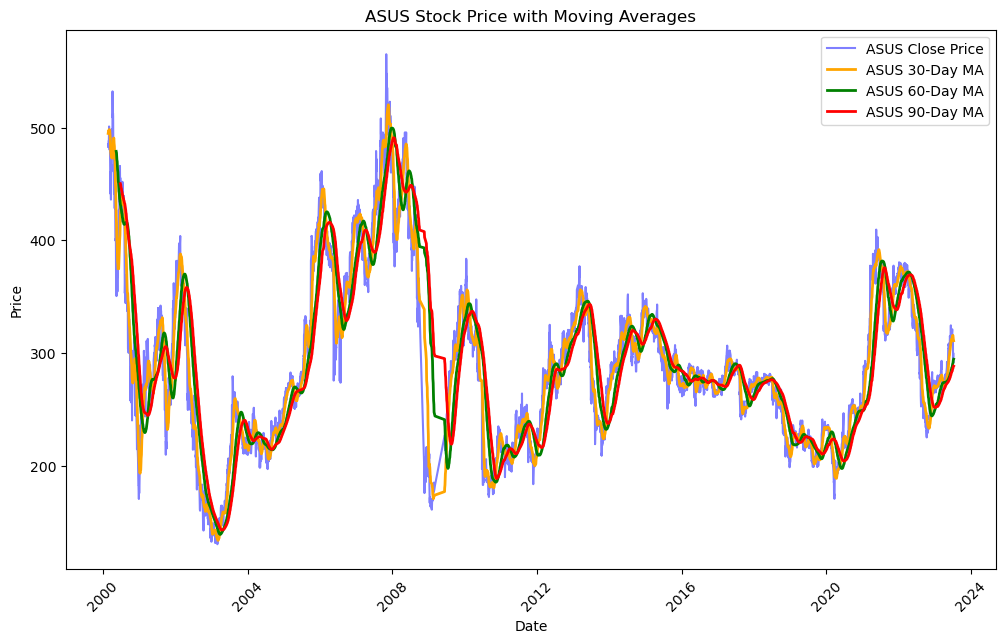

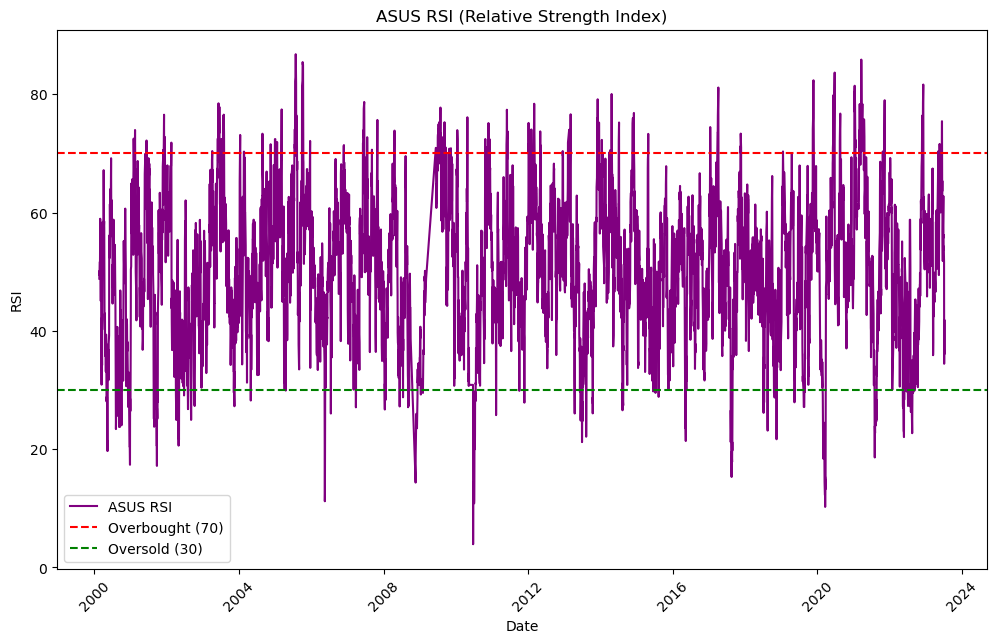

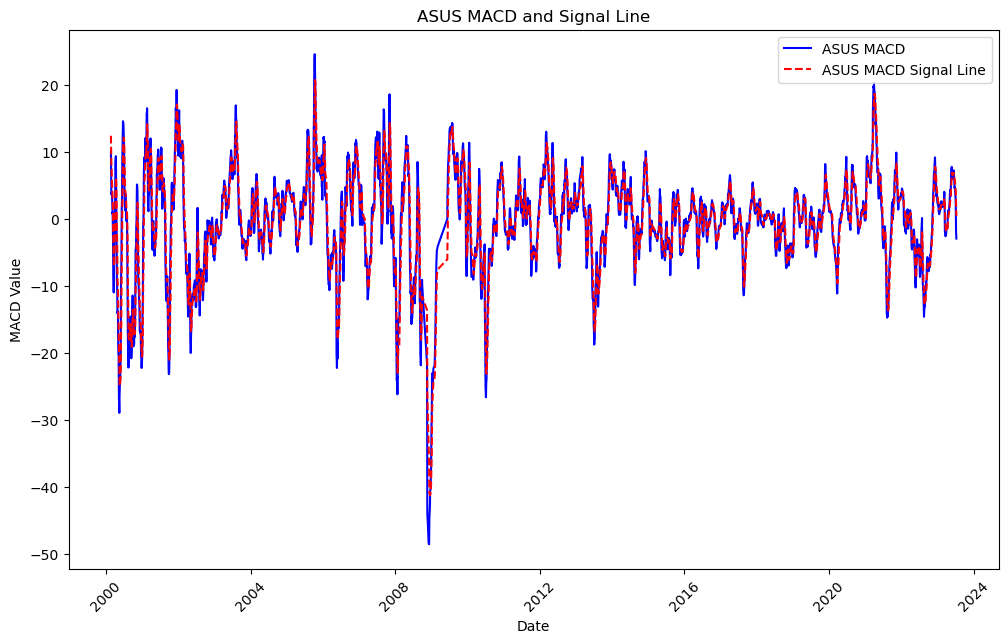

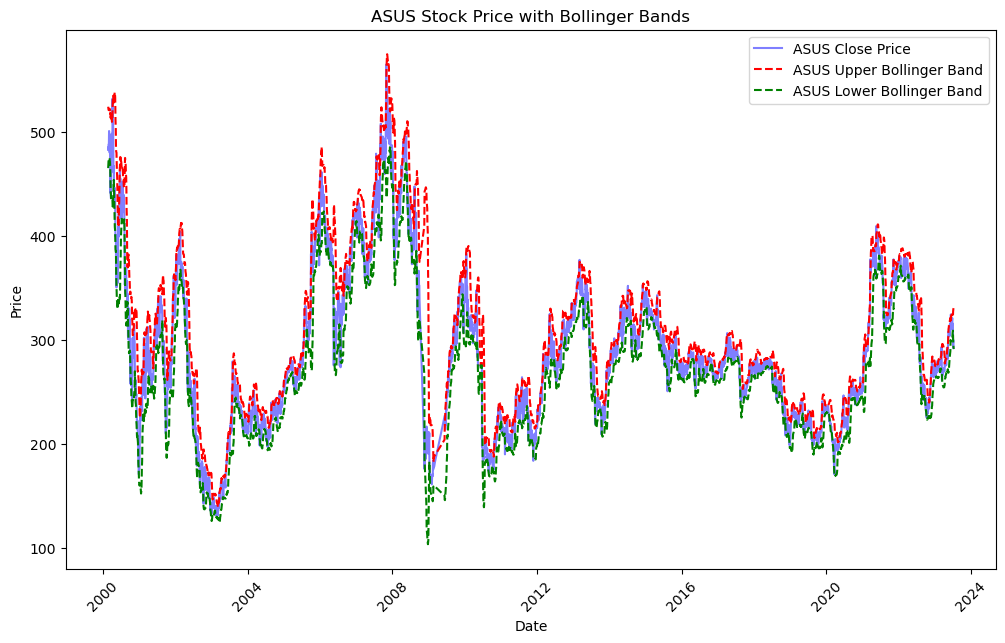

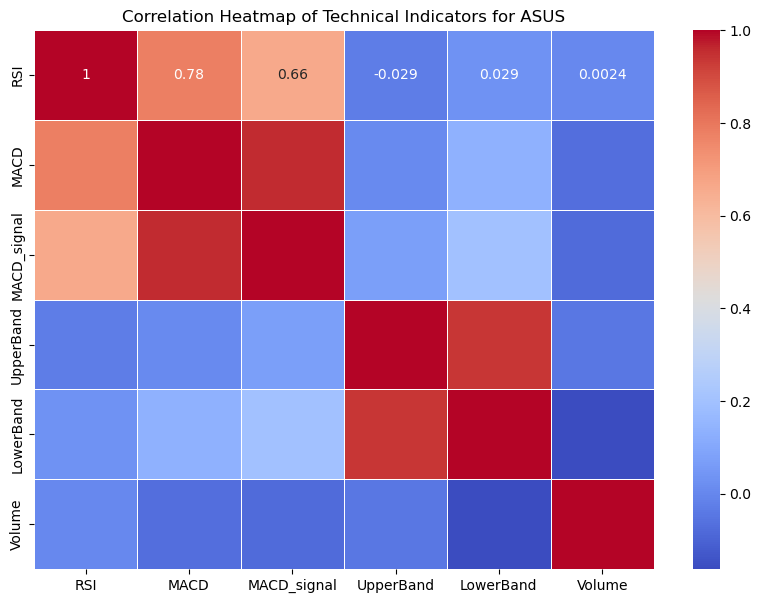

In [162]:
# For ASUS
plot_technical_indicators(asus_df, 'ASUS')

RMSE: 4.97446169725187
            Close  Predicted_Close
Date                              
2023-02-09  276.0       276.354948
2023-02-10  270.0       270.454771
2023-02-13  274.5       274.720000
2023-02-14  276.5       276.499926
2023-02-15  276.0       276.173298
...           ...              ...
2023-07-04  293.5       295.156284
2023-07-05  296.5       296.986688
2023-07-06  300.0       300.149769
2023-07-07  293.0       293.768828
2023-07-10  292.0       292.906642

[100 rows x 2 columns]


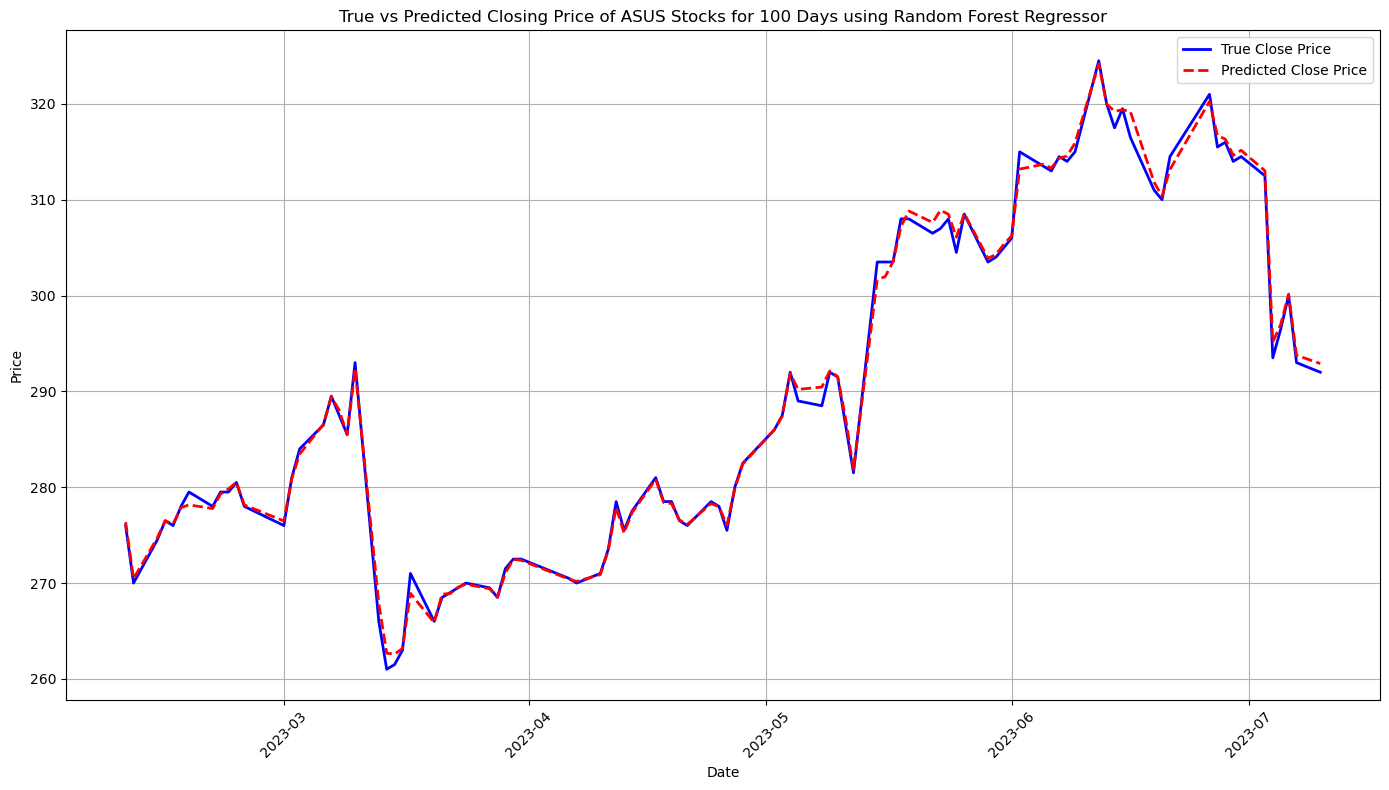

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = asus_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = asus_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = asus_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price of ASUS Stocks for 100 Days using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


RMSE: 4.15420175732701
            Predicted_Close
2023-07-10       292.084623
2023-07-11       278.958712
2023-07-12       269.459037
2023-07-13       261.754179
2023-07-14       257.160691
2023-07-17       253.563193
2023-07-18       249.788286
2023-07-19       246.409460
2023-07-20       244.501407
2023-07-21       243.352926
2023-07-24       241.391035
2023-07-25       238.297500
2023-07-26       236.951972
2023-07-27       232.778418
2023-07-28       230.126030
2023-07-31       226.347942
2023-08-01       221.804218
2023-08-02       219.558555
2023-08-03       216.784276
2023-08-04       214.999099
2023-08-07       213.682647
2023-08-08       212.633080
2023-08-09       209.911119
2023-08-10       208.374360
2023-08-11       205.358298
2023-08-14       202.848376
2023-08-15       202.012142
2023-08-16       201.770743
2023-08-17       199.144546
2023-08-18       197.660993


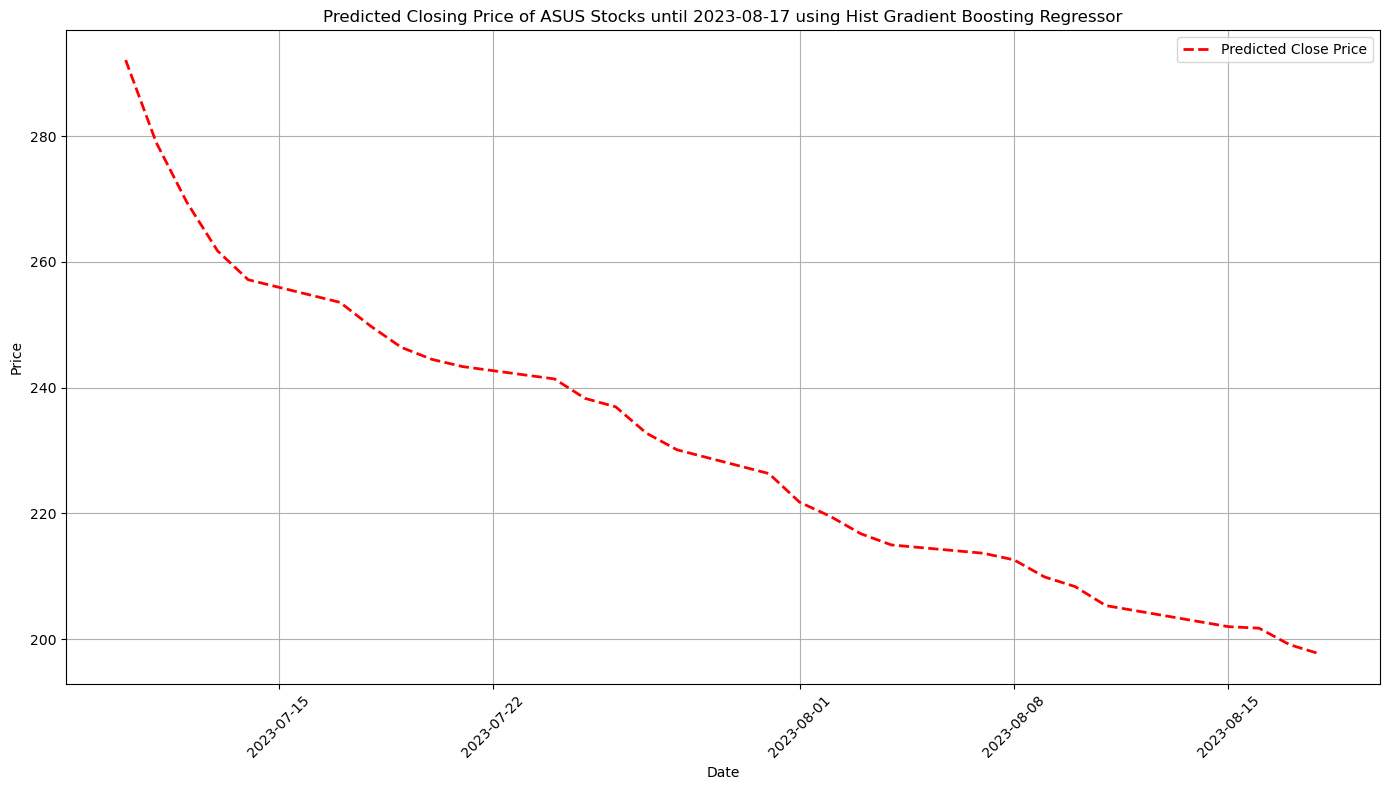

In [164]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = asus_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = asus_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = asus_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-17)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    # print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price of ASUS Stocks until 2023-08-17 using Hist Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (4570, 12), Test data shape: (1143, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4570
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10953.669
Date:                Wed, 04 Dec 2024   AIC                          21943.337
Time:                        04:26:13   BIC                          22059.024
Sample:                             0   HQIC                         21984.069
                               - 4570                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             1.0674      0.040     26.526      0.000       0.989       1.146
EMA            -0.6950      0.059    -11.765      0.000      -0.811

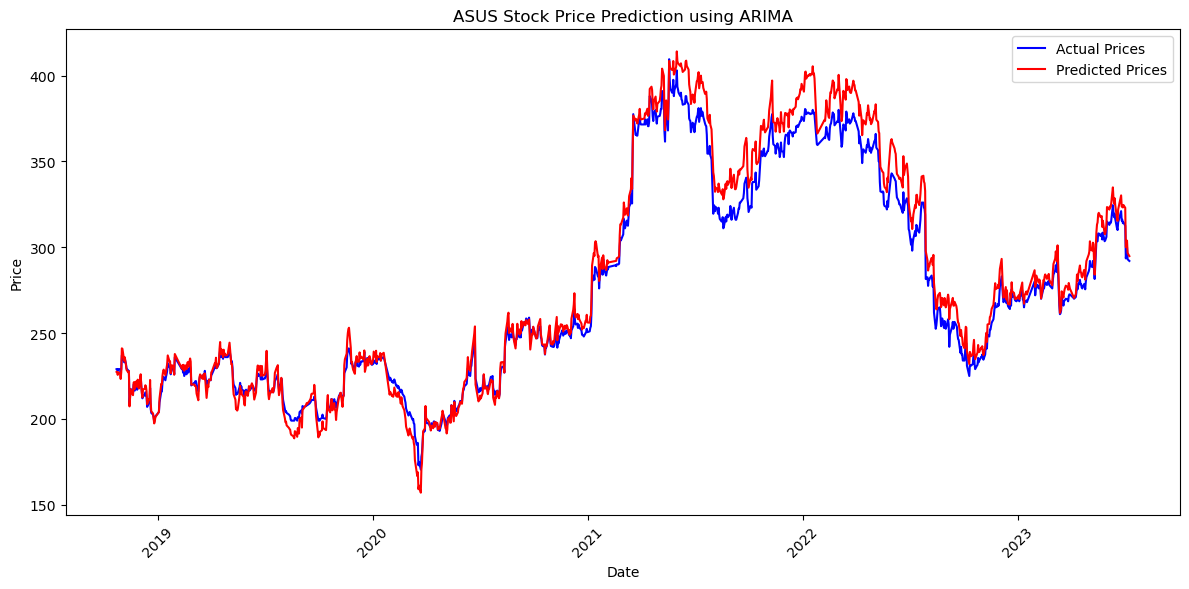

RMSE: 10.008728864847539


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you already have amd_df loaded with necessary columns
# Make sure 'amd_df' includes the required columns: 'Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', etc.

# Replace null values in 'Next_Close' with the mean of the column
asus_df['Next_Close'] = asus_df['Next_Close'].fillna(asus_df['Next_Close'].mean())

# Select relevant columns for features and target
X = asus_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = asus_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('ASUS Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Predicting for INTEL Stocks

In [166]:
import talib

# Calculate technical indicators for intel_df

# Simple Moving Average
intel_df['SMA'] = intel_df['Close'].rolling(window=14).mean()  # Simple Moving Average

# Exponential Moving Average
intel_df['EMA'] = intel_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
intel_df['RSI'] = talib.RSI(intel_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
intel_df['MACD'], intel_df['MACD_signal'], intel_df['MACD_hist'] = talib.MACD(intel_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
intel_df['UpperBand'], intel_df['MiddleBand'], intel_df['LowerBand'] = talib.BBANDS(intel_df['Close'], timeperiod=20)

# Stochastic Oscillator
intel_df['SlowK'], intel_df['SlowD'] = talib.STOCH(intel_df['High'], intel_df['Low'], intel_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
intel_df = intel_df.dropna()

# Features: using technical indicators
X = intel_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
intel_df['Next_Close'] = intel_df['Close'].shift(-1)  # Target for next day's close price
y = intel_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

intel_df


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
1980-05-05   0.329427   0.334635   0.329427   0.329427   0.187421   3513600   
1980-05-06   0.329427   0.333333   0.328125   0.328125   0.186681   6988800   
1980-05-07   0.328125   0.333333   0.328125   0.328125   0.186681   6393600   
1980-05-08   0.328125   0.329427   0.324219   0.324219   0.184458   7468800   
1980-05-09   0.328125   0.333333   0.328125   0.328125   0.186681  16684800   
...               ...        ...        ...        ...        ...       ...   
2023-07-03  33.540001  33.889999  33.139999  33.619999  33.619999  15753000   
2023-07-05  33.310001  33.330002  32.500000  32.509998  32.509998  37664700   
2023-07-06  31.900000  32.040001  31.379999  31.969999  31.969999  41693600   
2023-07-07  32.000000  32.410000  31.820000  31.850000  31.850000  28345700   
2023-07-10  31.870001  32.830002  31.770000  32.740002  32.740002  36227800   

            Year  Month  Moving_Avg  Daily Return  ...        RSI      MACD  \
Date                                               ...                        
1980-05-05  1980      5    0.308594      0.011998  ...  61.156702  0.001253   
1980-05-06  1980      5    0.309375     -0.003948  ...  59.986769  0.002125   
1980-05-07  1980      5    0.310482      0.000000  ...  59.986769  0.002784   
1980-05-08  1980      5    0.311458     -0.011908  ...  56.243269  0.002957   
1980-05-09  1980      5    0.312630      0.012052  ...  58.998790  0.003371   
...          ...    ...         ...           ...  ...        ...       ...   
2023-07-03  2023      7   33.230000      0.005383  ...  55.184638  0.687567   
2023-07-05  2023      7   33.362500     -0.033016  ...  49.210568  0.565104   
2023-07-06  2023      7   33.413000     -0.016610  ...  46.569336  0.419640   
2023-07-07  2023      7   33.441500     -0.003753  ...  45.978762  0.291318   
2023-07-10  2023      7   33.487500      0.027944  ...  50.947372  0.258458   

            MACD_signal  MACD_hist  UpperBand  MiddleBand  LowerBand  \
Date                                                                   
1980-05-05    -0.003391   0.004644   0.333079    0.308594   0.284109   
1980-05-06    -0.002288   0.004413   0.335265    0.309375   0.283485   
1980-05-07    -0.001273   0.004058   0.337564    0.310482   0.283400   
1980-05-08    -0.000427   0.003385   0.339038    0.311458   0.283879   
1980-05-09     0.000332   0.003039   0.340942    0.312630   0.284319   
...                 ...        ...        ...         ...        ...   
2023-07-03     0.839868  -0.152302  36.491870   33.230000  29.968130   
2023-07-05     0.784915  -0.219812  36.261099   33.362500  30.463901   
2023-07-06     0.711860  -0.292220  36.174355   33.413000  30.651644   
2023-07-07     0.627752  -0.336434  36.124873   33.441500  30.758126   
2023-07-10     0.553893  -0.295435  36.088383   33.487500  30.886616   

                SlowK      SlowD  Next_Close  
Date                                          
1980-05-05  88.031215  85.073561    0.328125  
1980-05-06  87.971094  87.360307    0.328125  
1980-05-07  87.263063  87.755124    0.324219  
1980-05-08  83.459509  86.231222    0.328125  
1980-05-09  81.553856  84.092143    0.326823  
...               ...        ...         ...  
2023-07-03  34.051418  38.974417   32.509998  
2023-07-05  25.640625  32.764083   31.969999  
2023-07-06  17.014892  25.568978   31.850000  
2023-07-07   9.315978  17.323832   32.740002  
2023-07-10  14.077971  13.469614         NaN  

[10886 rows x 22 columns]

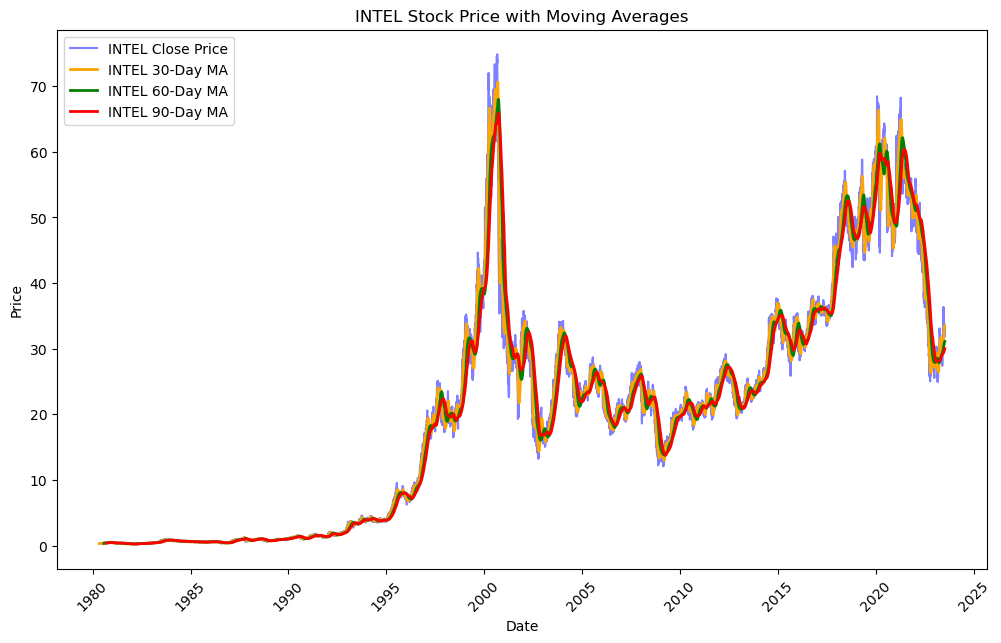

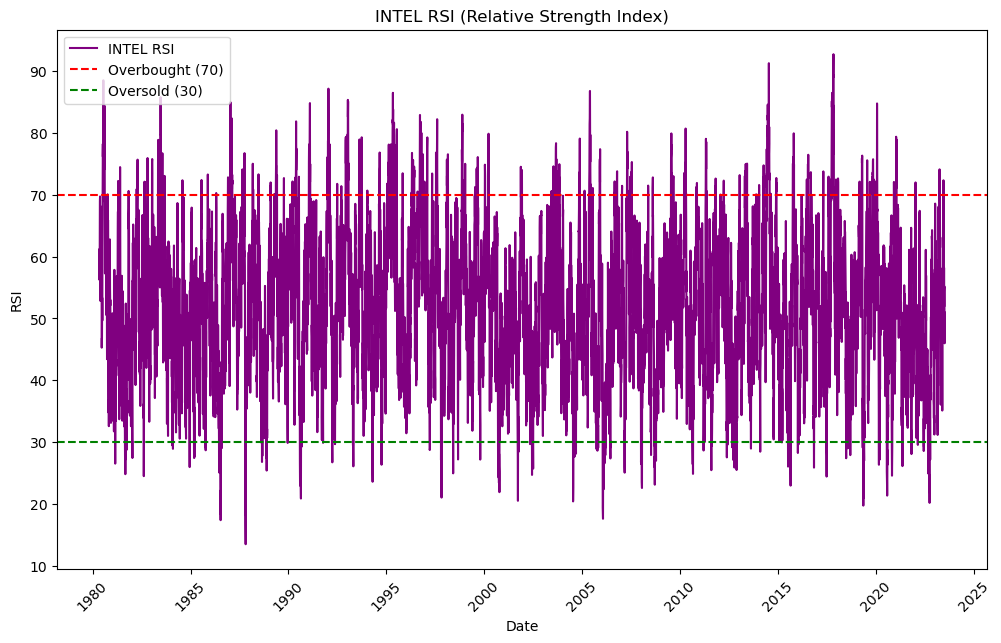

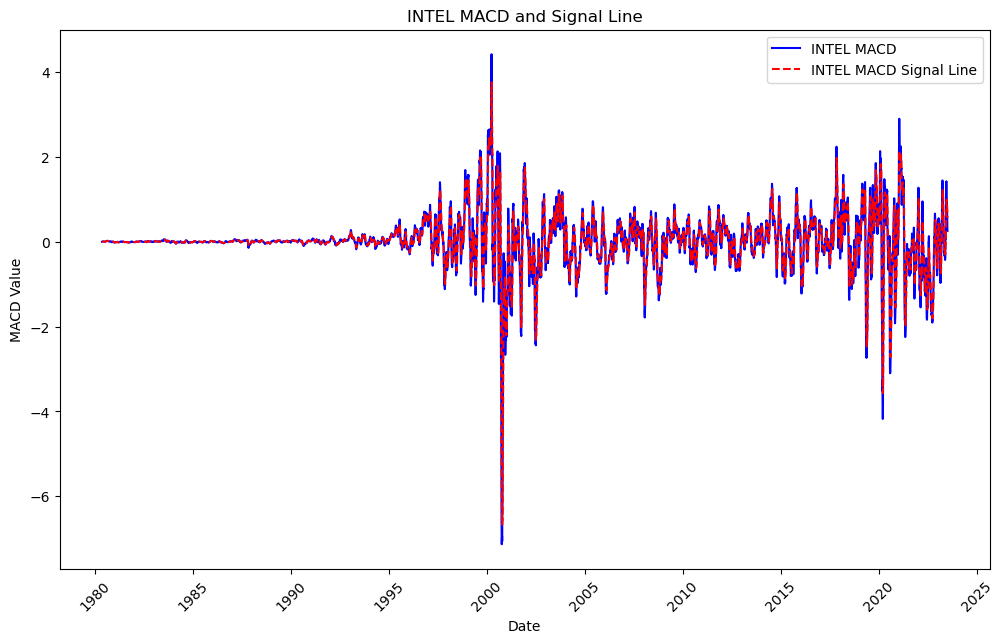

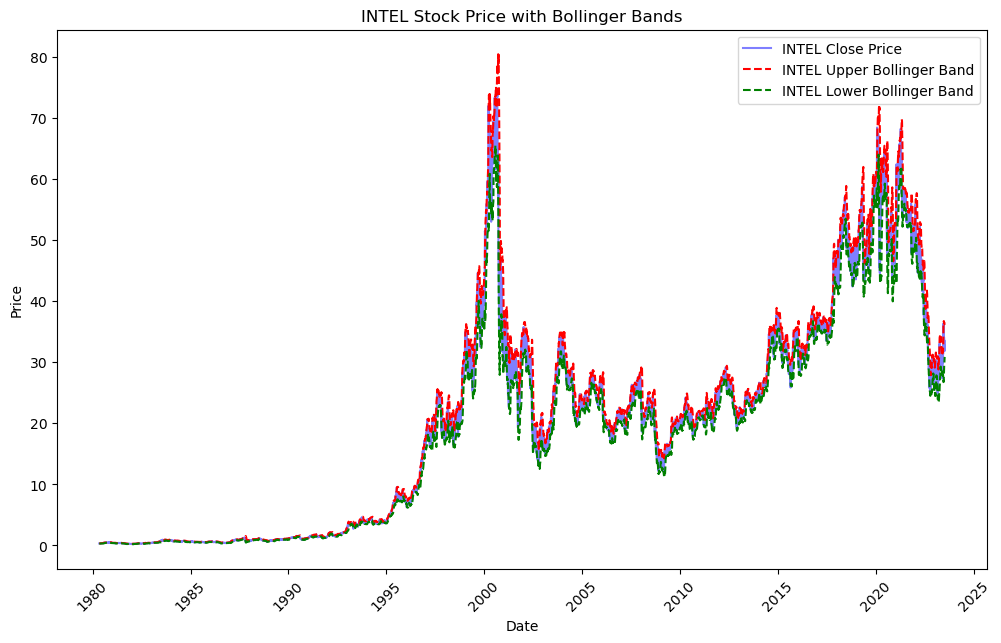

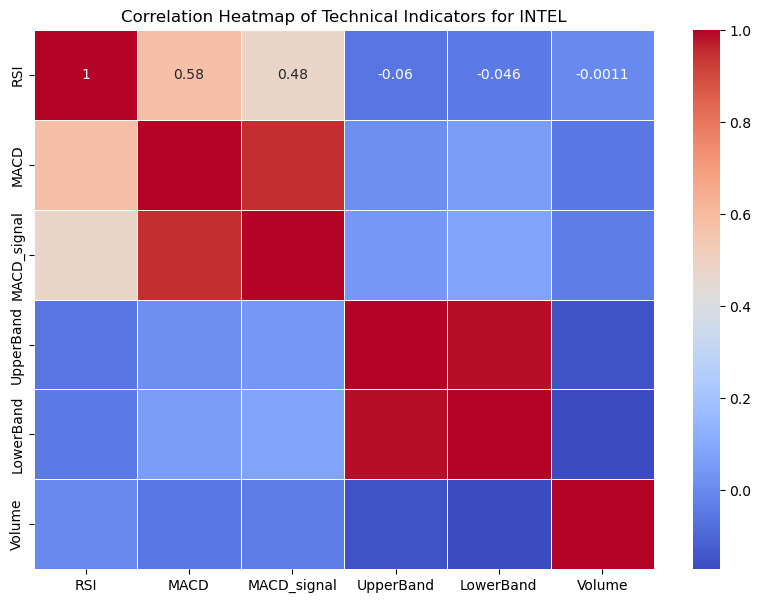

In [167]:
# For INTEL
plot_technical_indicators(intel_df, 'INTEL')

RMSE: 0.41422203427981236
                Close  Predicted_Close
Date                                  
2023-02-14  28.639999        28.701599
2023-02-15  28.850000        28.840600
2023-02-16  28.200001        28.141326
2023-02-17  27.610001        27.604776
2023-02-21  26.059999        26.205549
...               ...              ...
2023-07-03  33.619999        33.618362
2023-07-05  32.509998        32.641161
2023-07-06  31.969999        32.065087
2023-07-07  31.850000        31.920994
2023-07-10  32.740002        32.536713

[100 rows x 2 columns]


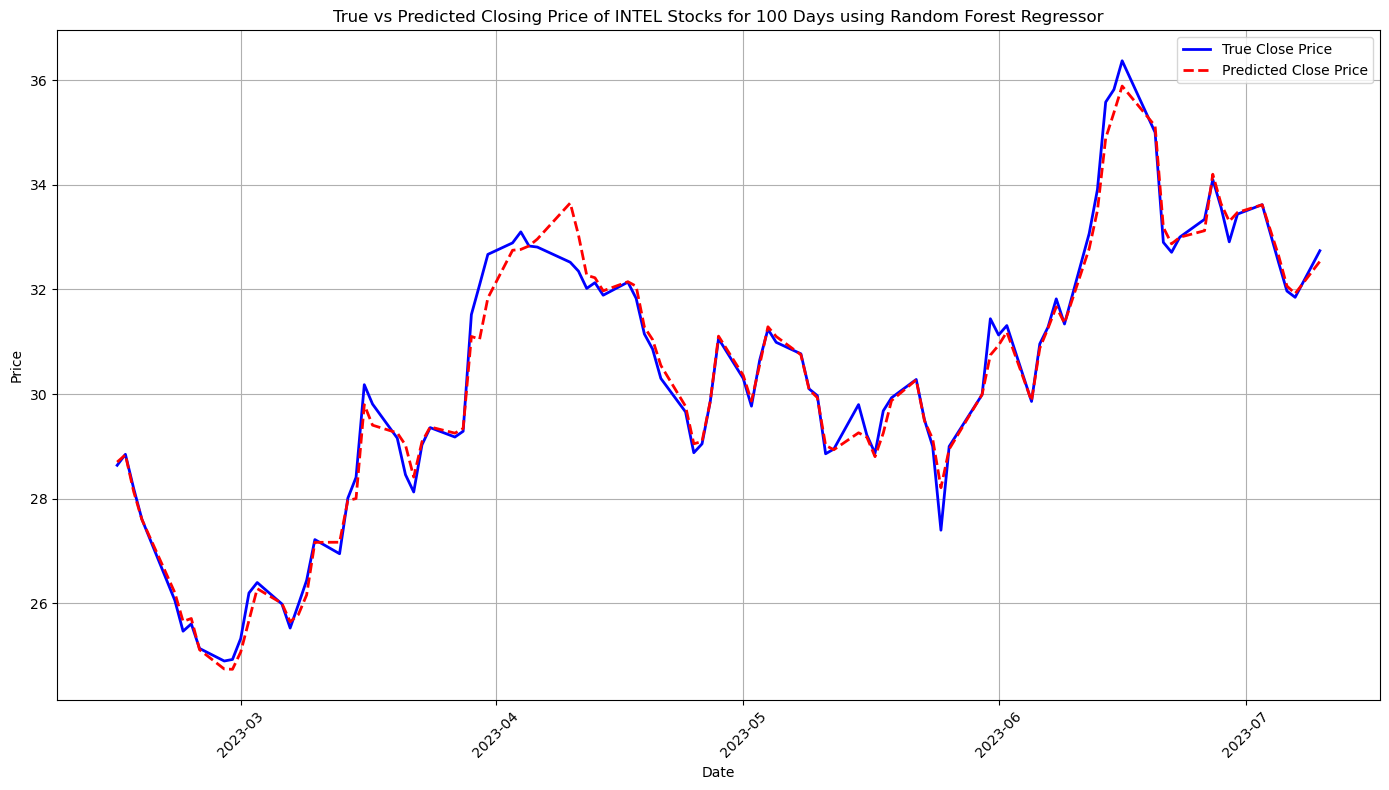

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = intel_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = intel_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = intel_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price of INTEL Stocks for 100 Days using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


RMSE: 0.473136632681514
            Predicted_Close
2023-07-10        25.339953
2023-07-11        24.545233
2023-07-12        23.937440
2023-07-13        23.269892
2023-07-14        22.709905
2023-07-17        22.190101
2023-07-18        21.461318
2023-07-19        20.977160
2023-07-20        20.266548
2023-07-21        19.585608
2023-07-24        18.853011
2023-07-25        17.761299
2023-07-26        16.872870
2023-07-27        15.421722
2023-07-28        14.231051
2023-07-31        13.127636
2023-08-01        11.623457
2023-08-02        11.202402
2023-08-03        11.202402
2023-08-04        11.202402
2023-08-07        11.202402
2023-08-08        11.202402
2023-08-09        11.202402
2023-08-10        11.202402
2023-08-11        11.202402
2023-08-14        11.202402
2023-08-15        11.202402
2023-08-16        11.202402
2023-08-17        11.202402
2023-08-18        11.202402


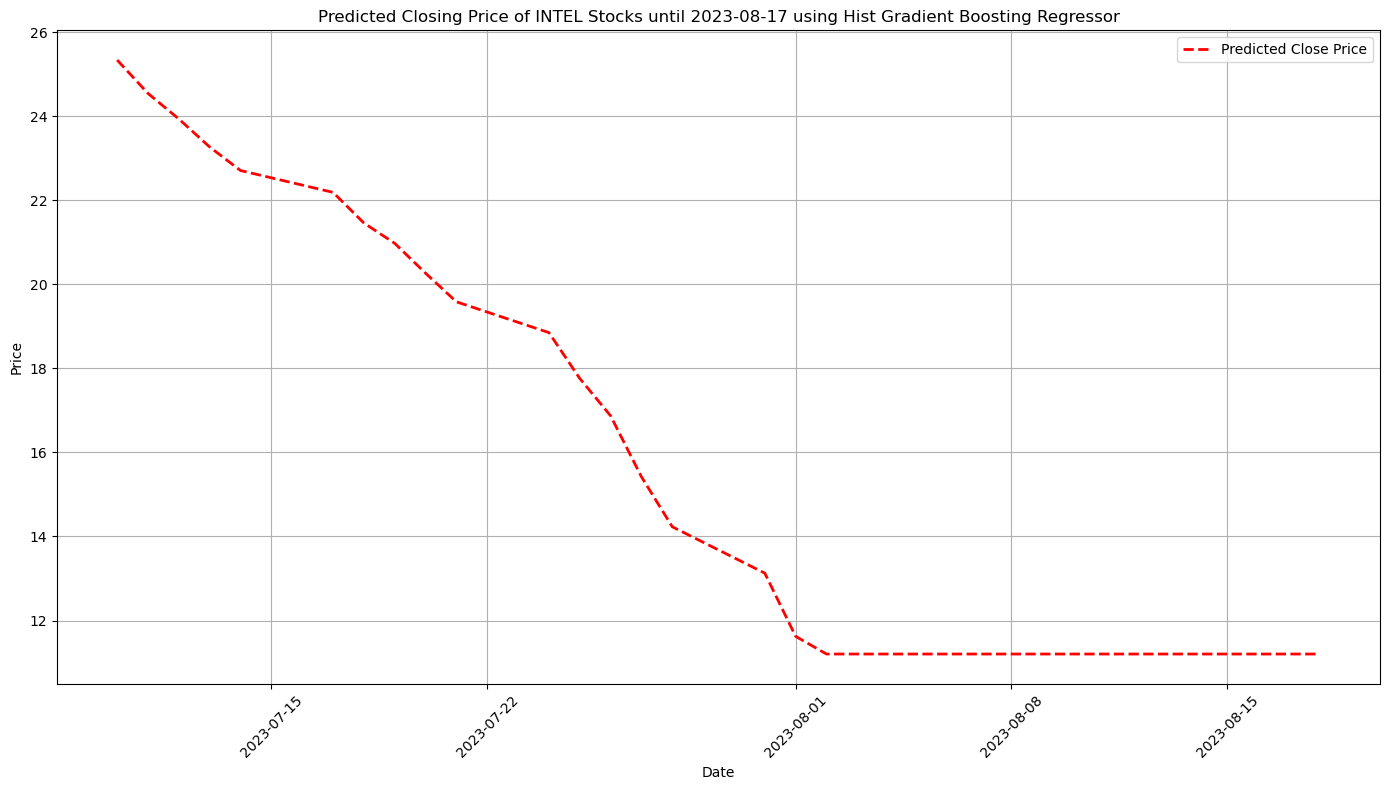

In [169]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = intel_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = intel_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = intel_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-17)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    # print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price of INTEL Stocks until 2023-08-17 using Hist Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (8708, 12), Test data shape: (2178, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8708
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -797.273
Date:                Wed, 04 Dec 2024   AIC                           1630.546
Time:                        04:27:46   BIC                           1757.839
Sample:                             0   HQIC                          1673.932
                               - 8708                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             2.2145      0.020    112.473      0.000       2.176       2.253
EMA            -2.3311      0.032    -73.721      0.000      -2.393

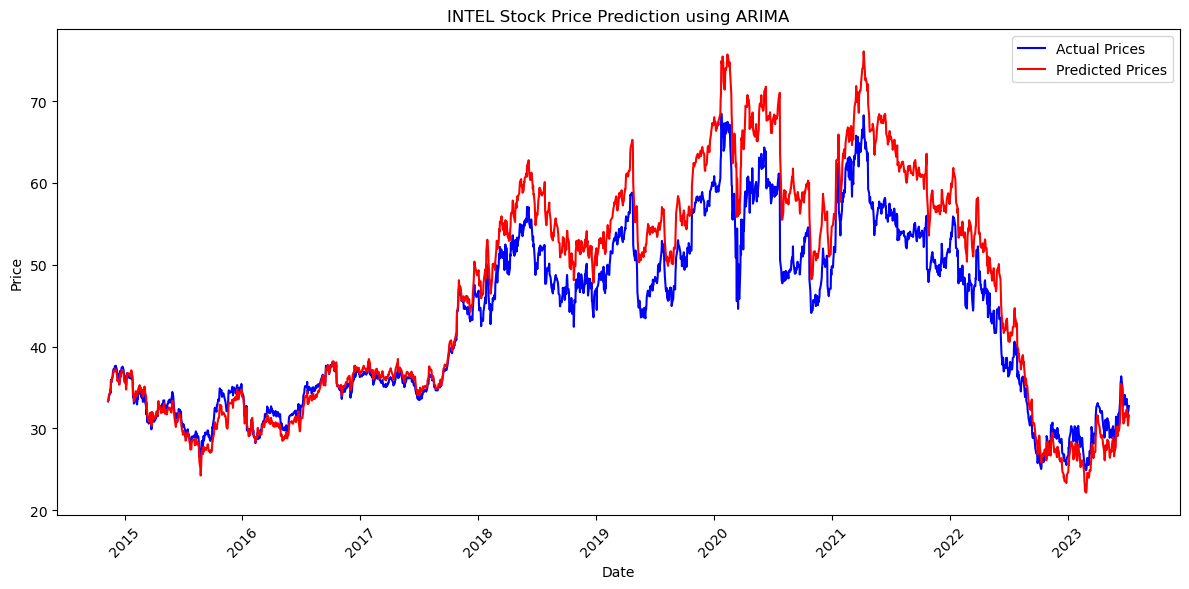

RMSE: 4.82806253941945


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Replace null values in 'Next_Close' with the mean of the column
intel_df['Next_Close'] = intel_df['Next_Close'].fillna(intel_df['Next_Close'].mean())

# Select relevant columns for features and target
X = intel_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = intel_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('INTEL Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

In [171]:
import talib

# Calculate technical indicators for nvidia_df

# Simple Moving Average
nvidia_df['SMA'] = nvidia_df['Close'].rolling(window=14).mean()  # Simple Moving Average

# Exponential Moving Average
nvidia_df['EMA'] = nvidia_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
nvidia_df['RSI'] = talib.RSI(nvidia_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
nvidia_df['MACD'], nvidia_df['MACD_signal'], nvidia_df['MACD_hist'] = talib.MACD(nvidia_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
nvidia_df['UpperBand'], nvidia_df['MiddleBand'], nvidia_df['LowerBand'] = talib.BBANDS(nvidia_df['Close'], timeperiod=20)

# Stochastic Oscillator
nvidia_df['SlowK'], nvidia_df['SlowD'] = talib.STOCH(nvidia_df['High'], nvidia_df['Low'], nvidia_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
nvidia_df = nvidia_df.dropna()


# Features: using technical indicators
X = nvidia_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
nvidia_df['Next_Close'] = nvidia_df['Close'].shift(-1)  # Target for next day's close price
y = nvidia_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

nvidia_df


Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-03-12    0.434896    0.434896    0.416667    0.424479    0.389460   
1999-03-15    0.434896    0.447917    0.432292    0.442708    0.406185   
1999-03-16    0.445313    0.450521    0.424479    0.428385    0.393044   
1999-03-17    0.432292    0.440104    0.420573    0.430990    0.395434   
1999-03-18    0.432292    0.442708    0.421875    0.436198    0.400212   
...                ...         ...         ...         ...         ...   
2023-07-03  425.170013  428.980011  422.019989  424.130005  424.130005   
2023-07-05  421.350006  431.769989  420.850006  423.170013  423.170013   
2023-07-06  418.440002  421.790009  413.459991  421.029999  421.029999   
2023-07-07  423.220001  432.140015  421.799988  425.029999  425.029999   
2023-07-10  426.570007  428.109985  416.489990  421.799988  421.799988   

              Volume  Year  Month  Moving_Avg  Daily Return  ...        RSI  \
Date                                                         ...              
1999-03-12   9076800  1999      3    0.443815     -0.018075  ...  44.410106   
1999-03-15  10881600  1999      3    0.444206      0.042944  ...  49.292389   
1999-03-16   7915200  1999      3    0.443750     -0.032352  ...  45.882575   
1999-03-17   5136000  1999      3    0.444596      0.006081  ...  46.606014   
1999-03-18   4632000  1999      3    0.445378      0.012083  ...  48.099776   
...              ...   ...    ...         ...           ...  ...        ...   
2023-07-03  19820900  2023      7  411.337503      0.002624  ...  62.948704   
2023-07-05  32361800  2023      7  412.910504     -0.002263  ...  62.417219   
2023-07-06  30358200  2023      7  414.635004     -0.005057  ...  61.177203   
2023-07-07  35525300  2023      7  417.149003      0.009501  ...  62.670027   
2023-07-10  34684600  2023      7  418.984003     -0.007599  ...  60.642225   

                 MACD  MACD_signal  MACD_hist   UpperBand  MiddleBand  \
Date                                                                    
1999-03-12   0.010221     0.016204  -0.005983    0.484612    0.443815   
1999-03-15   0.009662     0.014896  -0.005234    0.484803    0.444206   
1999-03-16   0.007971     0.013511  -0.005540    0.484840    0.443750   
1999-03-17   0.006763     0.012161  -0.005398    0.483862    0.444596   
1999-03-18   0.006156     0.010960  -0.004805    0.483299    0.445378   
...               ...          ...        ...         ...         ...   
2023-07-03  19.255830    23.536745  -4.280915  447.737234  411.337503   
2023-07-05  18.422411    22.513878  -4.091467  448.491354  412.910504   
2023-07-06  17.388793    21.488861  -4.100068  448.223780  414.635004   
2023-07-07  16.699903    20.531069  -3.831167  445.545722  417.149004   
2023-07-10  15.712197    19.567295  -3.855098  443.311013  418.984003   

             LowerBand      SlowK      SlowD  Next_Close  
Date                                                      
1999-03-12    0.403018  18.269493  25.685777    0.442708  
1999-03-15    0.403609  16.025807  20.541236    0.428385  
1999-03-16    0.402660  15.607559  16.634286    0.430990  
1999-03-17    0.405331  19.755593  17.129653    0.436198  
1999-03-18    0.407456  24.242877  19.868676    0.437500  
...                ...        ...        ...         ...  
2023-07-03  374.937772  57.684696  56.036183  423.170013  
2023-07-05  377.329654  62.821425  58.597345  421.029999  
2023-07-06  381.046227  57.125827  59.210650  425.029999  
2023-07-07  388.752285  56.752375  58.899876  421.799988  
2023-07-10  394.656992  55.578403  56.485535         NaN  

[6121 rows x 22 columns]

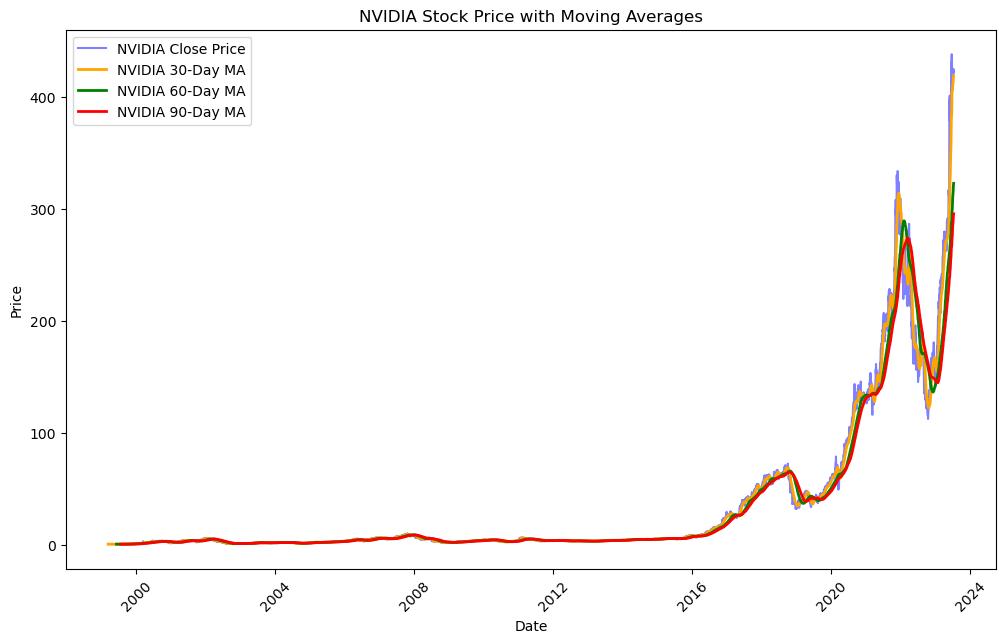

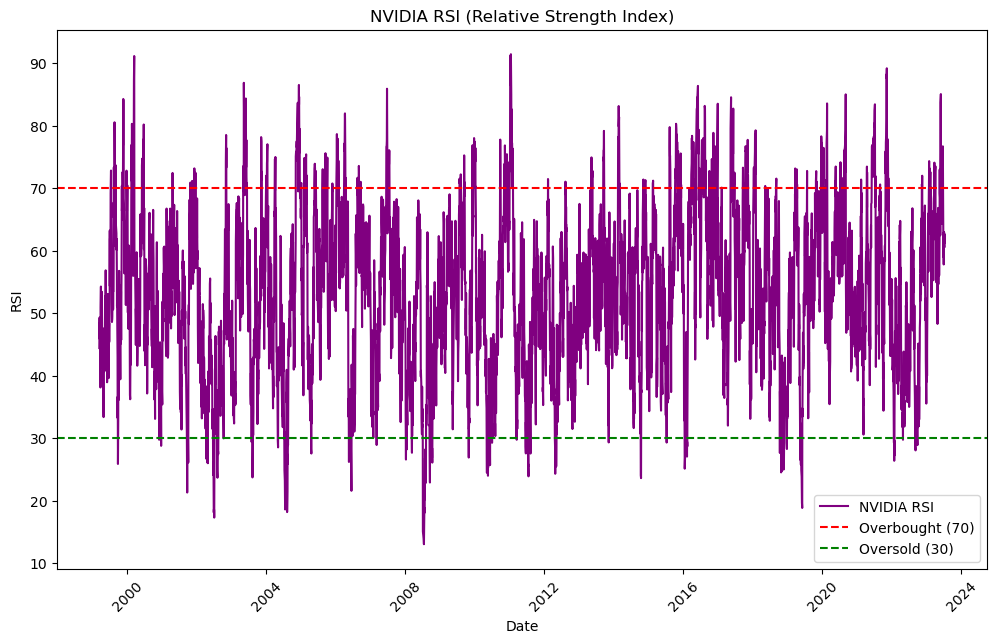

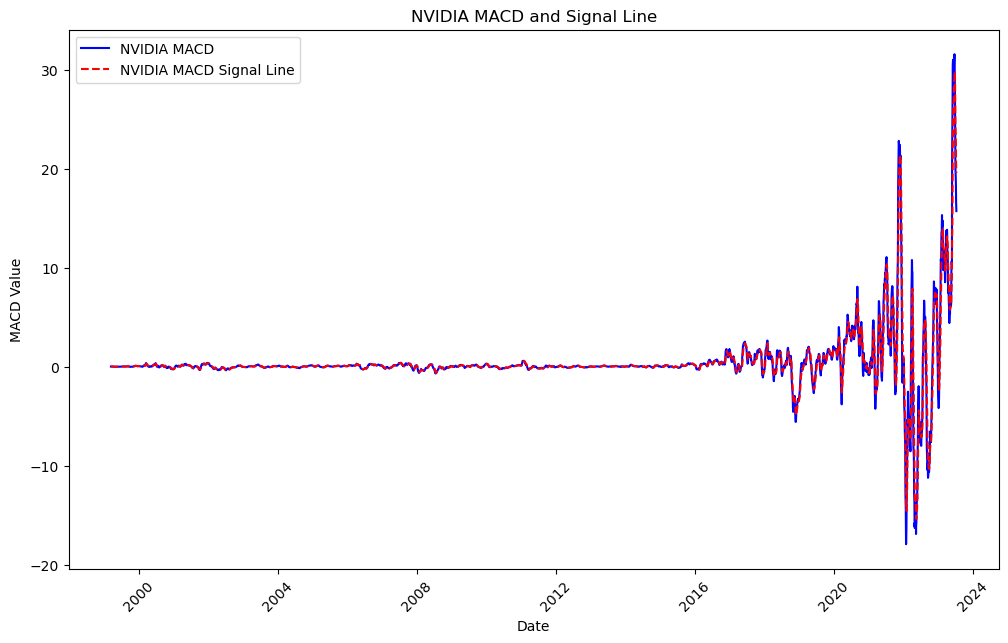

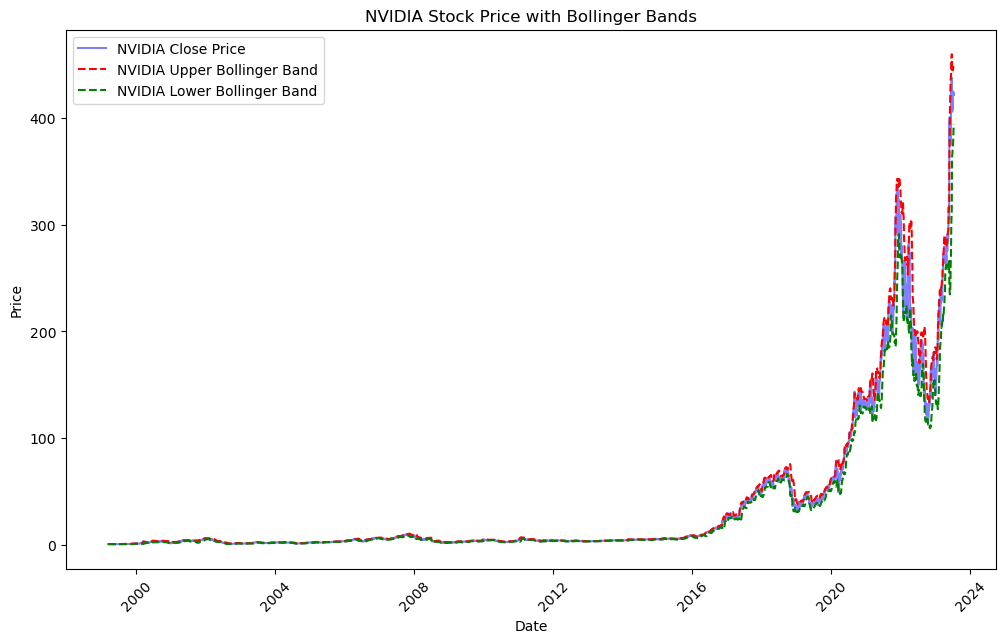

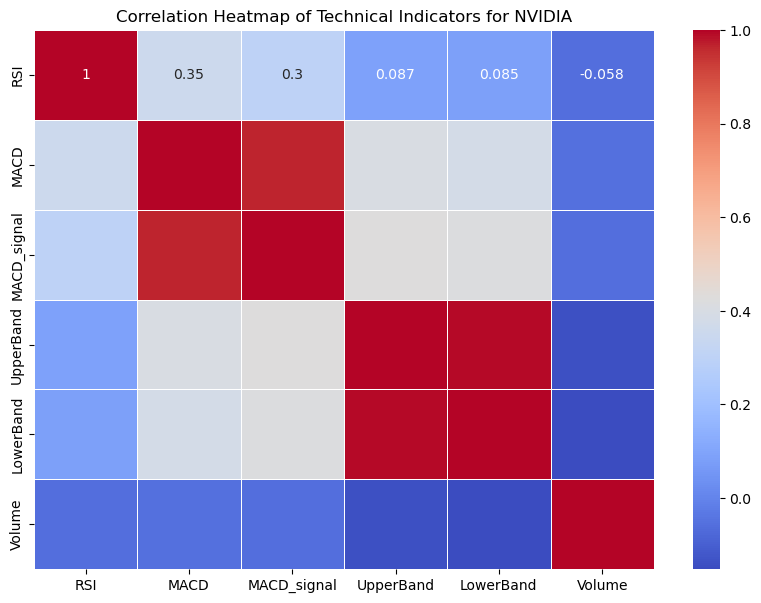

In [172]:
# For NVIDIA
plot_technical_indicators(nvidia_df, 'NVIDIA')

RMSE: 2.293079364413702
                 Close  Predicted_Close
Date                                   
2023-02-14  229.710007       224.798804
2023-02-15  227.639999       223.504178
2023-02-16  220.020004       218.659753
2023-02-17  213.880005       217.043502
2023-02-21  206.550003       208.222652
...                ...              ...
2023-07-03  424.130005       423.552203
2023-07-05  423.170013       422.831809
2023-07-06  421.029999       421.747801
2023-07-07  425.029999       420.311199
2023-07-10  421.799988       416.303794

[100 rows x 2 columns]


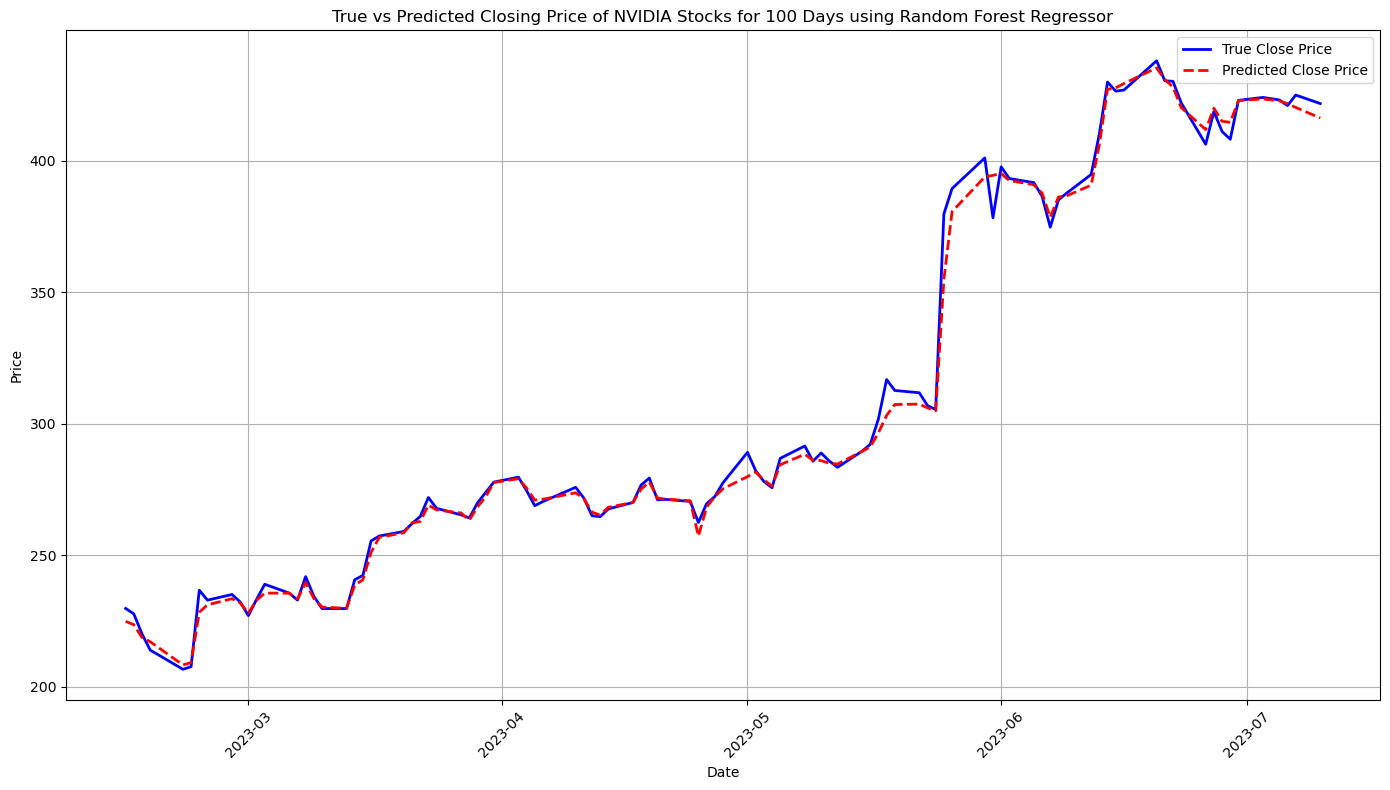

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = nvidia_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = nvidia_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = nvidia_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price of NVIDIA Stocks for 100 Days using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


RMSE: 2.012199230261155
            Predicted_Close
2023-07-10       414.995224
2023-07-11       202.131160
2023-07-12       127.363613
2023-07-13        92.333630
2023-07-14        65.481724
2023-07-17        54.261838
2023-07-18        45.801275
2023-07-19        39.841435
2023-07-20        34.999905
2023-07-21        31.888943
2023-07-24        27.649526
2023-07-25        17.111263
2023-07-26        13.162214
2023-07-27        10.759708
2023-07-28        10.759708
2023-07-31        10.759708
2023-08-01        10.759708
2023-08-02        10.759708
2023-08-03        10.759708
2023-08-04        10.759708
2023-08-07        10.759708
2023-08-08        10.759708
2023-08-09        10.759708
2023-08-10        10.759708
2023-08-11        10.759708
2023-08-14        10.759708
2023-08-15        10.759708
2023-08-16        10.759708
2023-08-17        10.759708
2023-08-18        10.759708


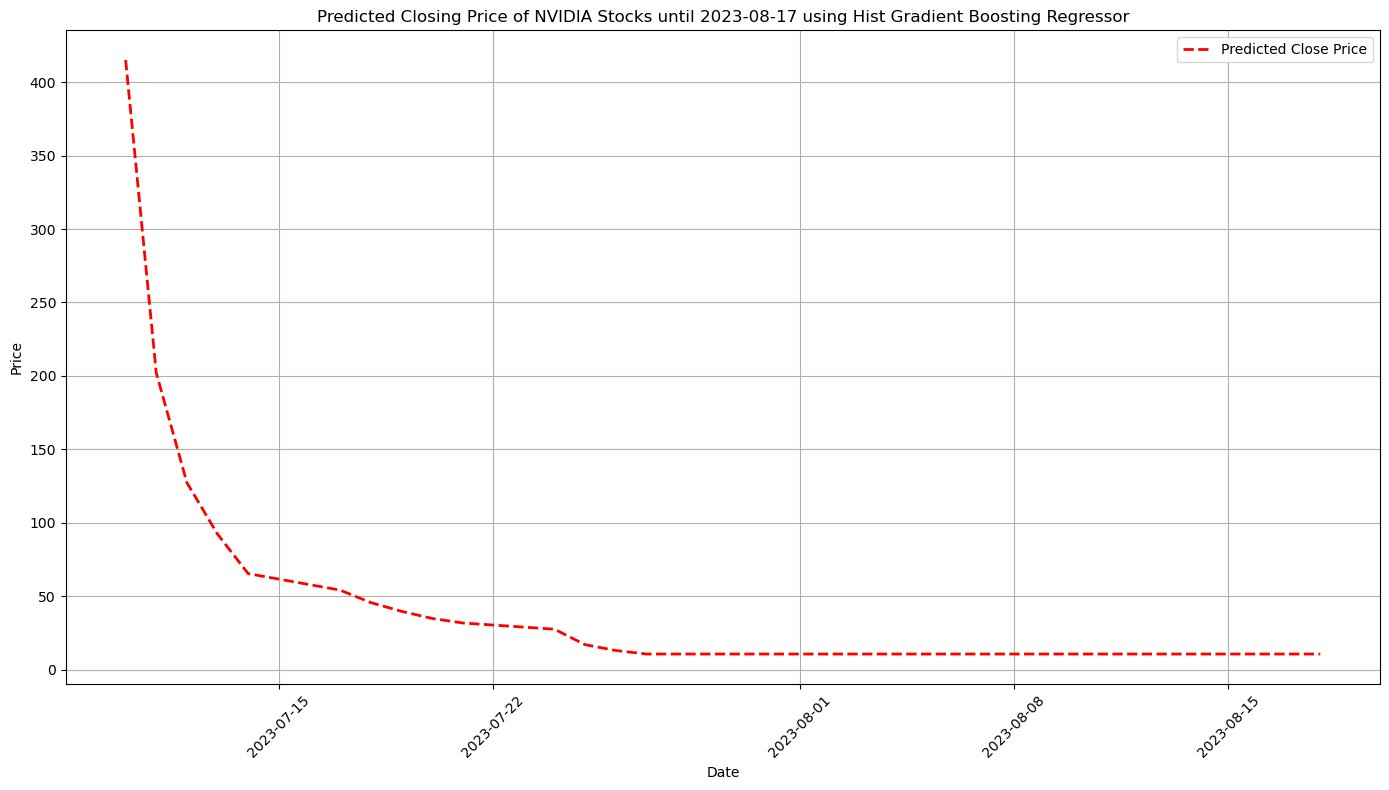

In [174]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = nvidia_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = nvidia_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = nvidia_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-17)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    # print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price of NVIDIA Stocks until 2023-08-17 using Hist Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (4896, 12), Test data shape: (1225, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4896
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1683.231
Date:                Wed, 04 Dec 2024   AIC                          -3330.461
Time:                        04:28:38   BIC                          -3213.534
Sample:                             0   HQIC                         -3289.436
                               - 4896                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             2.3629      0.029     82.695      0.000       2.307       2.419
EMA            -2.4182      0.041    -58.890      0.000      -2.499

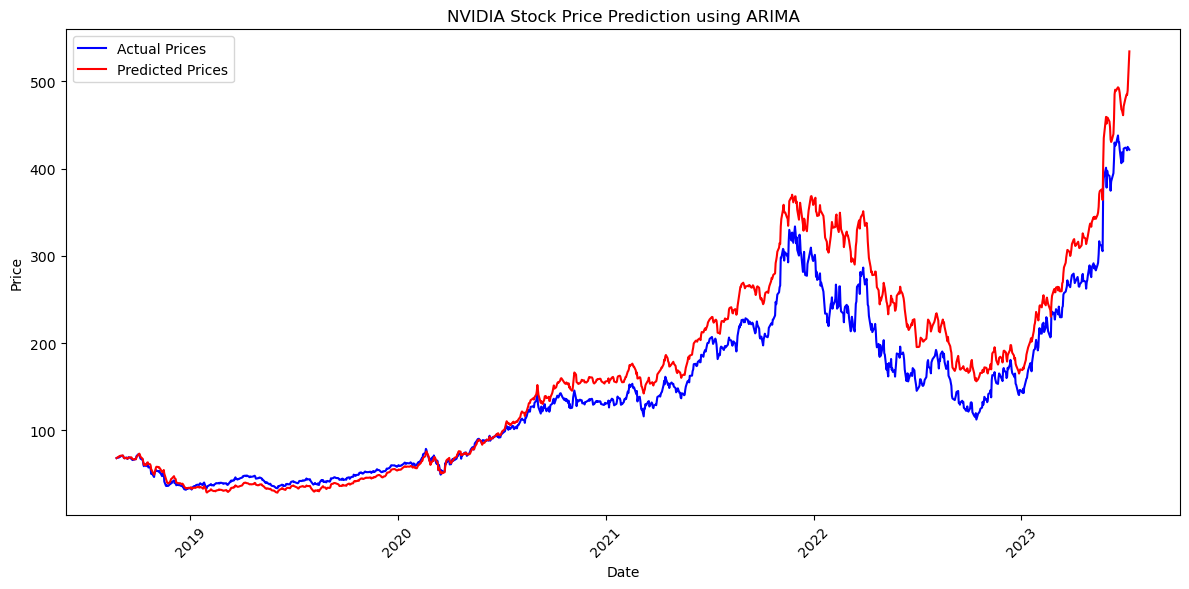

RMSE: 34.51071496459066


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Replace null values in 'Next_Close' with the mean of the column
nvidia_df['Next_Close'] = nvidia_df['Next_Close'].fillna(nvidia_df['Next_Close'].mean())

# Select relevant columns for features and target
X = nvidia_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = nvidia_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('NVIDIA Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

In [176]:
import talib

# Calculate technical indicators for amzn_df

# Simple Moving Average
amzn_df['SMA'] = amzn_df['Close'].rolling(window=14).mean()  # Simple Moving Average

# Exponential Moving Average
amzn_df['EMA'] = amzn_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
amzn_df['RSI'] = talib.RSI(amzn_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
amzn_df['MACD'], amzn_df['MACD_signal'], amzn_df['MACD_hist'] = talib.MACD(amzn_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
amzn_df['UpperBand'], amzn_df['MiddleBand'], amzn_df['LowerBand'] = talib.BBANDS(amzn_df['Close'], timeperiod=20)

# Stochastic Oscillator
amzn_df['SlowK'], amzn_df['SlowD'] = talib.STOCH(amzn_df['High'], amzn_df['Low'], amzn_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
amzn_df = amzn_df.dropna()

# Features: using technical indicators
X = amzn_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
amzn_df['Next_Close'] = amzn_df['Close'].shift(-1)  # Target for next day's close price
y = amzn_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

amzn_df


Open        High         Low       Close   Adj Close  \
Date                                                                     
1997-07-02    0.075781    0.079688    0.075521    0.079427    0.079427   
1997-07-03    0.079948    0.095833    0.079688    0.095573    0.095573   
1997-07-07    0.091667    0.101042    0.091667    0.100000    0.100000   
1997-07-08    0.102083    0.116667    0.102083    0.115104    0.115104   
1997-07-09    0.115104    0.119271    0.113542    0.116146    0.116146   
...                ...         ...         ...         ...         ...   
2023-03-30  101.550003  103.040001  101.010002  102.000000  102.000000   
2023-03-31  102.160004  103.489998  101.949997  103.290001  103.290001   
2023-04-03  102.300003  103.290001  101.430000  102.410004  102.410004   
2023-04-04  102.750000  104.199997  102.110001  103.949997  103.949997   
2023-04-05  103.910004  103.910004  100.750000  101.099998  101.099998   

               Volume  Year  Month  Moving_Avg  Daily Return  ...        RSI  \
Date                                                          ...              
1997-07-02   77640000  1997      7    0.077474      0.048112  ...  45.905521   
1997-07-03  251544000  1997      7    0.078398      0.203281  ...  65.736765   
1997-07-07  161064000  1997      7    0.079258      0.046321  ...  69.083467   
1997-07-08  310344000  1997      7    0.080794      0.151040  ...  77.248610   
1997-07-09  165240000  1997      7    0.082643      0.009053  ...  77.686436   
...               ...   ...    ...         ...           ...  ...        ...   
2023-03-30   53633400  2023      3   96.649500      0.017456  ...  61.692413   
2023-03-31   56704300  2023      3   97.068999      0.012647  ...  64.026729   
2023-04-03   41135700  2023      4   97.502000     -0.008520  ...  61.283306   
2023-04-04   48662500  2023      4   98.021999      0.015038  ...  64.176155   
2023-04-05   45103000  2023      4   98.380999     -0.027417  ...  55.858057   

                MACD  MACD_signal  MACD_hist   UpperBand  MiddleBand  \
Date                                                                   
1997-07-02 -0.000362    -0.000402   0.000040    0.082733    0.077474   
1997-07-03  0.001149    -0.000092   0.001241    0.087871    0.078398   
1997-07-07  0.002673     0.000461   0.002212    0.092532    0.079258   
1997-07-08  0.005041     0.001377   0.003664    0.101252    0.080794   
1997-07-09  0.006922     0.002486   0.004436    0.108222    0.082643   
...              ...          ...        ...         ...         ...   
2023-03-30  1.112230     0.592666   0.519564  102.849048   96.649499   
2023-03-31  1.411384     0.756410   0.654975  103.846727   97.068999   
2023-04-03  1.559481     0.917024   0.642457  104.479804   97.502000   
2023-04-04  1.780587     1.089737   0.690851  105.288348   98.021999   
2023-04-05  1.706177     1.213025   0.493152  105.509382   98.380999   

            LowerBand      SlowK      SlowD  Next_Close  
Date                                                     
1997-07-02   0.072215  44.790417  28.219192    0.095573  
1997-07-03   0.068926  65.228560  43.774980    0.100000  
1997-07-07   0.065984  89.988046  66.669008    0.115104  
1997-07-08   0.060337  97.101496  84.106034    0.116146  
1997-07-09   0.057065  95.198861  94.096135    0.128125  
...               ...        ...        ...         ...  
2023-03-30  90.449951  81.677447  75.087840  103.290001  
2023-03-31  90.291272  92.647014  82.881641  102.410004  
2023-04-03  90.524196  93.603198  89.309220  103.949997  
2023-04-04  90.755650  94.956583  93.735599  101.099998  
2023-04-05  91.252617  83.418145  90.659309         NaN  

[6483 rows x 22 columns]

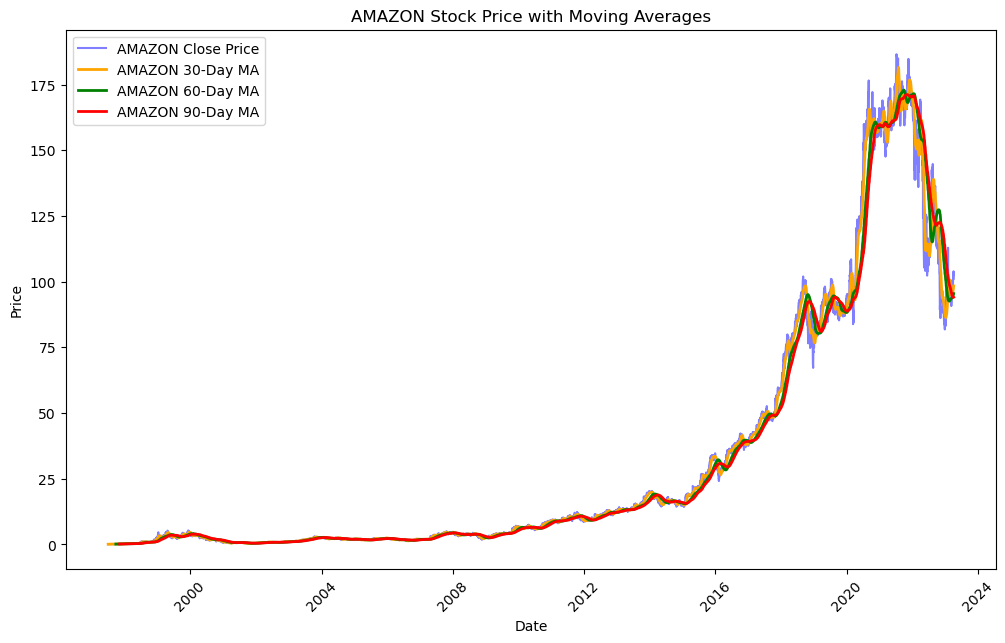

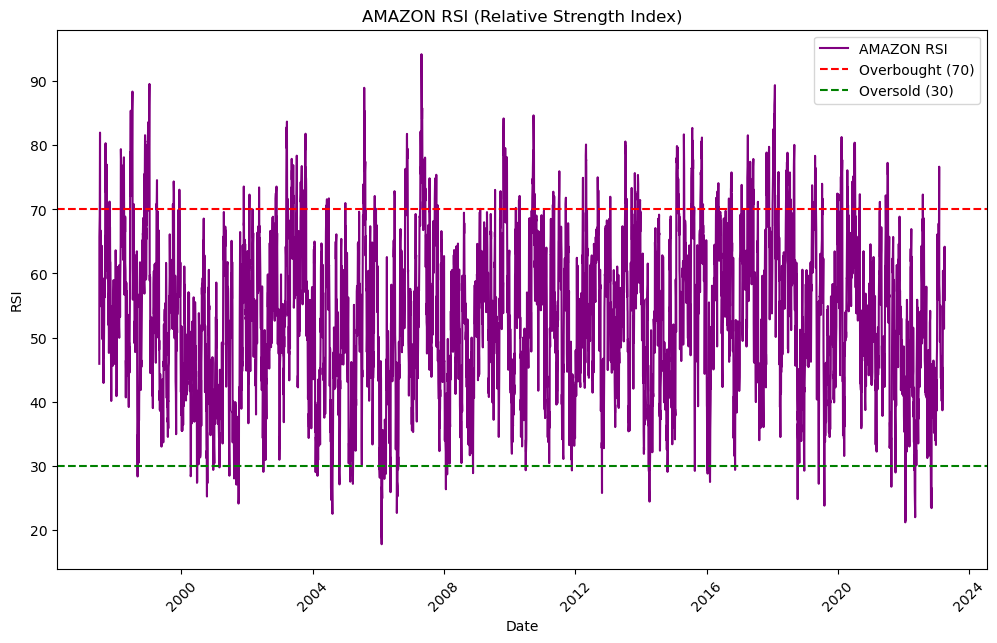

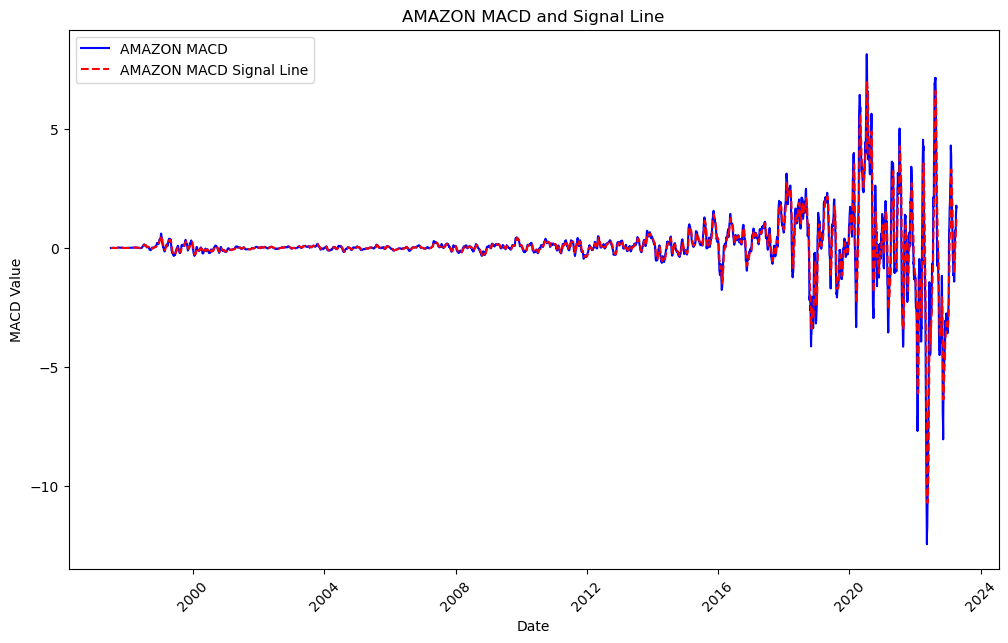

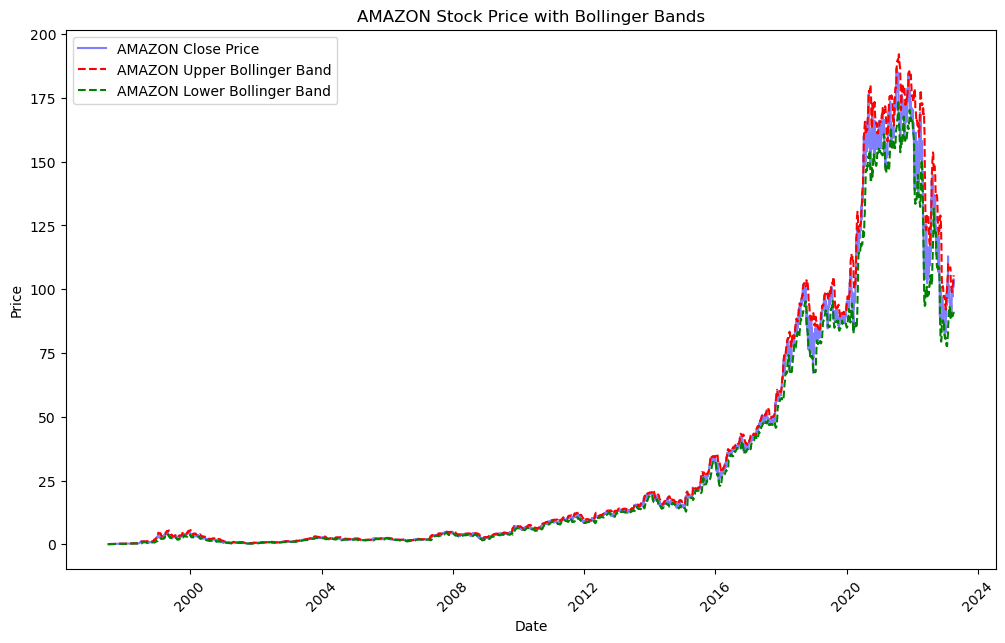

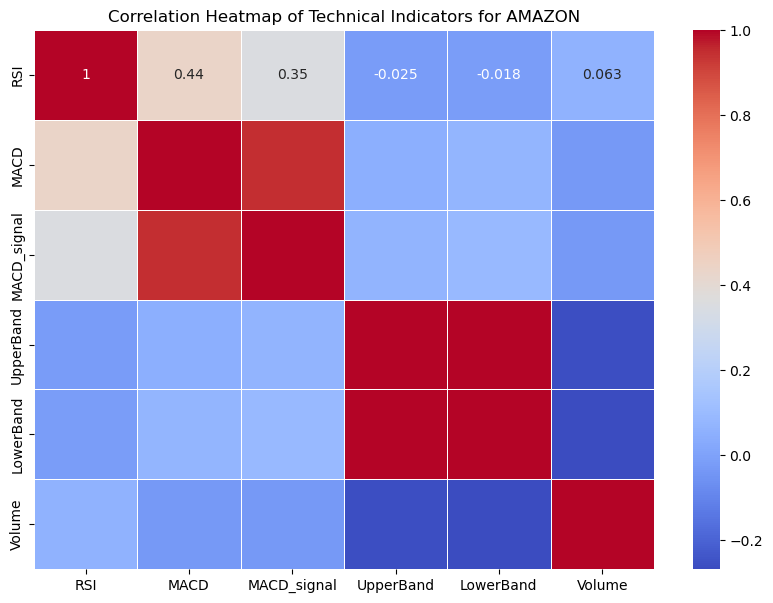

In [177]:
# For AMAZON
plot_technical_indicators(amzn_df, 'AMAZON')

RMSE: 0.887236662984484
                 Close  Predicted_Close
Date                                   
2022-11-10   96.629997        96.181718
2022-11-11  100.790001        99.537830
2022-11-14   98.489998        98.075759
2022-11-15   98.940002        98.612071
2022-11-16   97.120003        96.397049
...                ...              ...
2023-03-30  102.000000       101.572675
2023-03-31  103.290001       102.759266
2023-04-03  102.410004       102.483798
2023-04-04  103.949997       103.658818
2023-04-05  101.099998       101.396969

[100 rows x 2 columns]


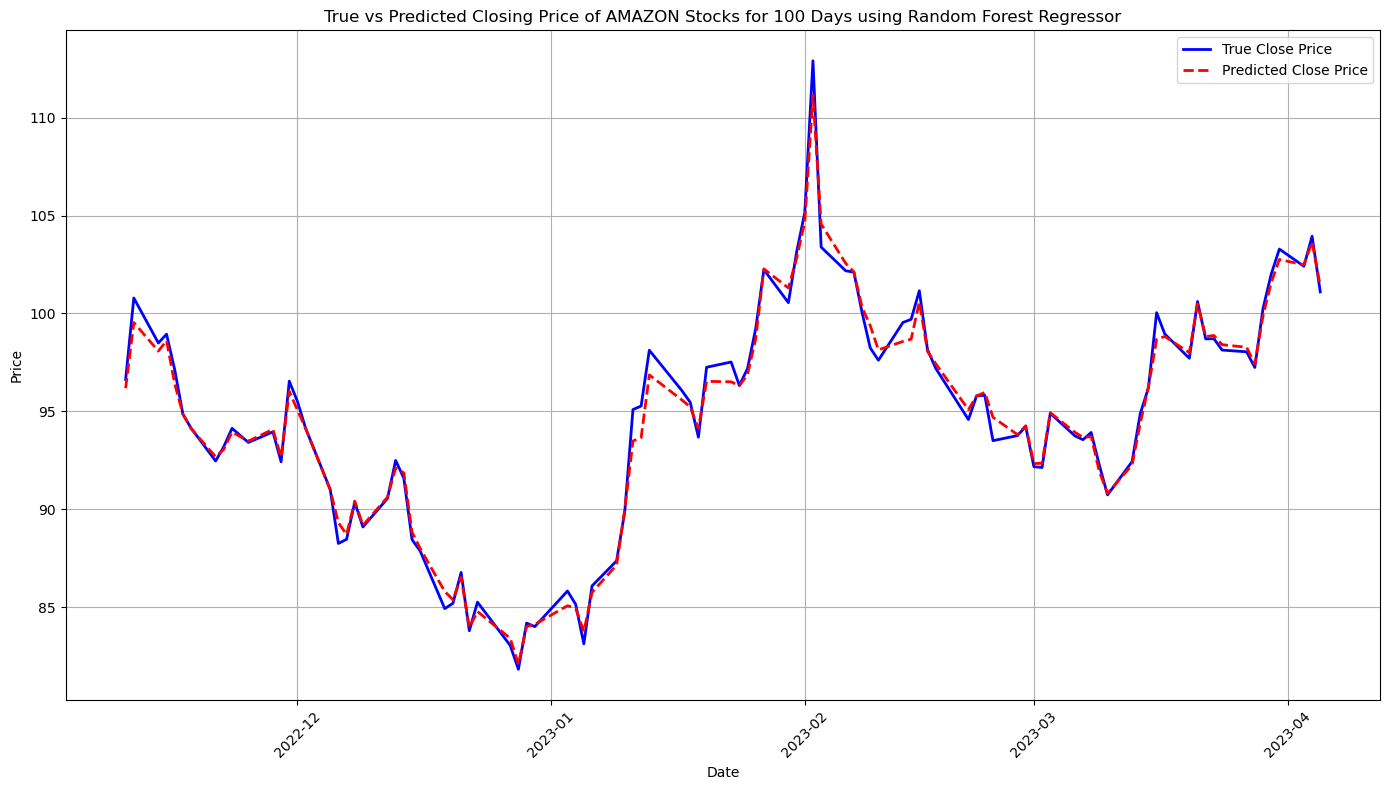

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = amzn_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = amzn_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = amzn_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price of AMAZON Stocks for 100 Days using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


RMSE: 0.7162670080925845
            Predicted_Close
2023-04-05       101.044260
2023-04-06        63.246800
2023-04-07        42.936539
2023-04-10        35.335245
2023-04-11        28.388808
2023-04-12        25.128349
2023-04-13        22.826579
2023-04-14        20.648205
2023-04-17        18.460772
2023-04-18        15.918460
2023-04-19        13.638487
2023-04-20        12.060542
2023-04-21        10.776795
2023-04-24         9.378750
2023-04-25         8.217728
2023-04-26         7.028337
2023-04-27         6.023660
2023-04-28         5.169853
2023-05-01         4.507797
2023-05-02         3.987417
2023-05-03         3.535401
2023-05-04         3.096777
2023-05-05         2.610570
2023-05-08         2.183651
2023-05-09         1.725372
2023-05-10         1.310706
2023-05-11         0.909076
2023-05-12         0.486396
2023-05-15         0.113525
2023-05-16        -0.052254


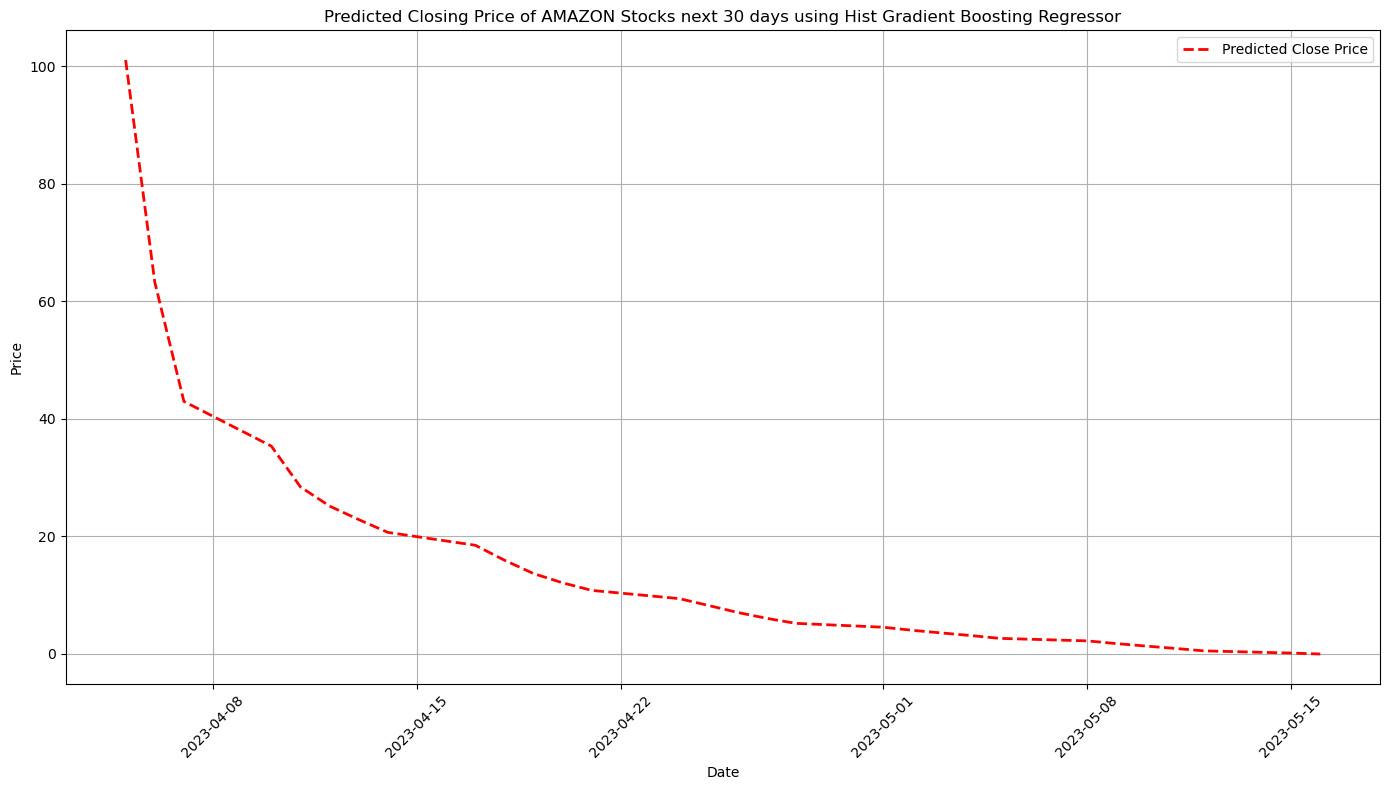

In [179]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = amzn_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = amzn_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = amzn_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-17)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    # print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price of AMAZON Stocks next 30 days using Hist Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (5186, 12), Test data shape: (1297, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5186
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3312.944
Date:                Wed, 04 Dec 2024   AIC                          -6589.887
Time:                        04:29:29   BIC                          -6471.924
Sample:                             0   HQIC                         -6548.619
                               - 5186                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             1.6271      0.036     45.483      0.000       1.557       1.697
EMA            -1.6504      0.058    -28.361      0.000      -1.765

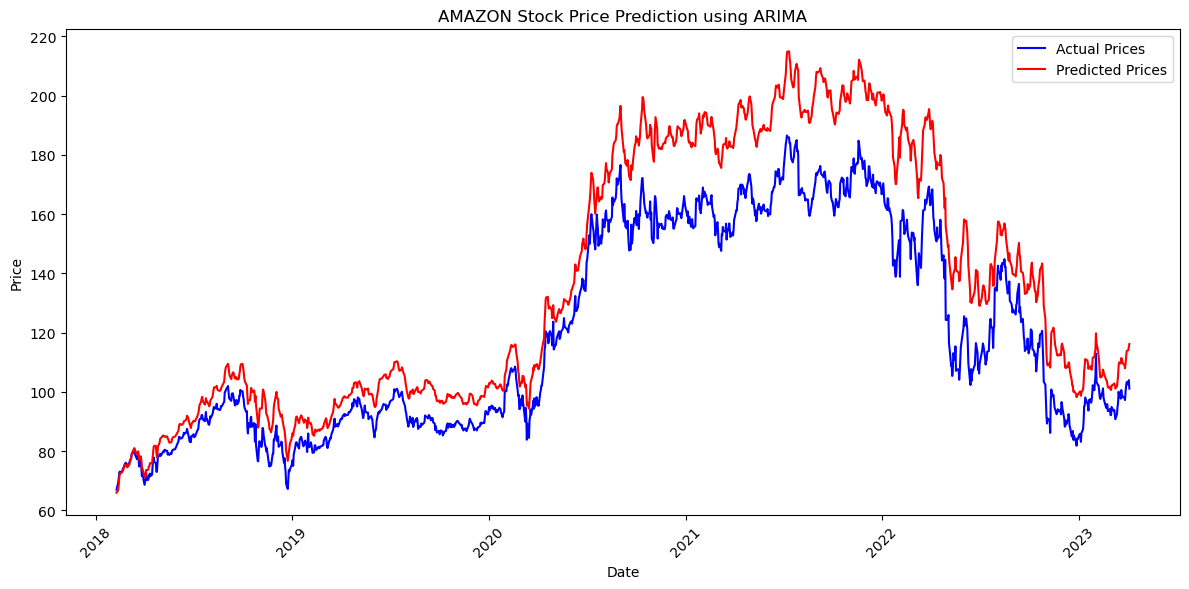

RMSE: 19.221674489834015


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Replace null values in 'Next_Close' with the mean of the column
amzn_df['Next_Close'] = amzn_df['Next_Close'].fillna(amzn_df['Next_Close'].mean())

# Select relevant columns for features and target
X = amzn_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = amzn_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('AMAZON Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

In [181]:
import talib

# Calculate technical indicators for msft_df

# Simple Moving Average
msft_df['SMA'] = msft_df['Close'].rolling(window=14).mean()  # Simple Moving Average

# Exponential Moving Average
msft_df['EMA'] = msft_df['Close'].ewm(span=14, adjust=False).mean()  # Exponential Moving Average

# Relative Strength Index (RSI)
msft_df['RSI'] = talib.RSI(msft_df['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
msft_df['MACD'], msft_df['MACD_signal'], msft_df['MACD_hist'] = talib.MACD(msft_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Bollinger Bands
msft_df['UpperBand'], msft_df['MiddleBand'], msft_df['LowerBand'] = talib.BBANDS(msft_df['Close'], timeperiod=20)

# Stochastic Oscillator
msft_df['SlowK'], msft_df['SlowD'] = talib.STOCH(msft_df['High'], msft_df['Low'], msft_df['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

# Clean any NaN values
msft_df = msft_df.dropna()

# Features: using technical indicators
X = msft_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Target: You can use 'Close' or 'Next Close' for prediction
msft_df['Next_Close'] = msft_df['Close'].shift(-1)  # Target for next day's close price
y = msft_df['Next_Close'].dropna()

# Align X and y
X = X.iloc[:-1, :]  # Removing the last row due to shift

msft_df


Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-04-30    0.114583    0.115451    0.109375    0.111979    0.070759   
1986-05-01    0.111979    0.111979    0.108507    0.110243    0.069662   
1986-05-02    0.110243    0.111979    0.109375    0.110243    0.069662   
1986-05-05    0.110243    0.110243    0.109375    0.109375    0.069113   
1986-05-06    0.110243    0.111979    0.110243    0.110243    0.069662   
...                ...         ...         ...         ...         ...   
2022-03-18  295.369995  301.000000  292.730011  300.429993  300.429993   
2022-03-21  298.890015  300.140015  294.899994  299.160004  299.160004   
2022-03-22  299.799988  305.000000  298.769989  304.059998  304.059998   
2022-03-23  300.510010  303.230011  297.720001  299.489990  299.489990   
2022-03-24  299.140015  304.200012  298.320007  304.100006  304.100006   

              Volume  Year  Month  Moving_Avg  Daily Return  ...        RSI  \
Date                                                         ...              
1986-04-30  30902400  1986      4    0.103190     -0.022720  ...  62.748693   
1986-05-01  54345600  1986      5    0.103885     -0.015503  ...  59.499147   
1986-05-02  20246400  1986      5    0.104579      0.000000  ...  59.499147   
1986-05-05   3254400  1986      5    0.105317     -0.007881  ...  57.764471   
1986-05-06   9734400  1986      5    0.106055      0.007944  ...  59.050184   
...              ...   ...    ...         ...           ...  ...        ...   
2022-03-18  43317000  2022      3  289.504001      0.017648  ...  55.163666   
2022-03-21  28351200  2022      3  290.065501     -0.004227  ...  54.202666   
2022-03-22  27599700  2022      3  290.882501      0.016379  ...  57.293957   
2022-03-23  25715400  2022      3  291.843501     -0.015030  ...  53.656263   
2022-03-24  24446900  2022      3  292.319002      0.015393  ...  56.646539   

                MACD  MACD_signal  MACD_hist   UpperBand  MiddleBand  \
Date                                                                   
1986-04-30  0.004669     0.002862   0.001806    0.117438    0.103190   
1986-05-01  0.004501     0.003190   0.001311    0.118086    0.103885   
1986-05-02  0.004319     0.003416   0.000903    0.118596    0.104579   
1986-05-05  0.004058     0.003544   0.000513    0.118698    0.105317   
1986-05-06  0.003876     0.003611   0.000265    0.118799    0.106055   
...              ...          ...        ...         ...         ...   
2022-03-18 -2.326018    -4.321428   1.995410  305.029619  289.504001   
2022-03-21 -1.458543    -3.748851   2.290308  306.125884  290.065501   
2022-03-22 -0.371393    -3.073360   2.701967  308.009522  290.882501   
2022-03-23  0.120036    -2.434680   2.554717  308.634375  291.843501   
2022-03-24  0.871442    -1.773456   2.644898  309.913455  292.319002   

             LowerBand      SlowK      SlowD  Next_Close  
Date                                                      
1986-04-30    0.088942  72.341612  79.515537    0.110243  
1986-05-01    0.089683  61.469728  71.261275    0.110243  
1986-05-02    0.090562  54.970358  62.927233    0.109375  
1986-05-05    0.091935  50.182054  55.540713    0.110243  
1986-05-06    0.093311  48.990494  51.380969    0.110243  
...                ...        ...        ...         ...  
2022-03-18  273.978382  80.531237  65.325150  299.160004  
2022-03-21  274.005119  85.330501  77.677158  304.059998  
2022-03-22  273.755481  92.393811  86.085183  299.489990  
2022-03-23  275.052627  89.862765  89.195693  304.100006  
2022-03-24  274.724549  92.999994  91.752190         NaN  

[9050 rows x 22 columns]

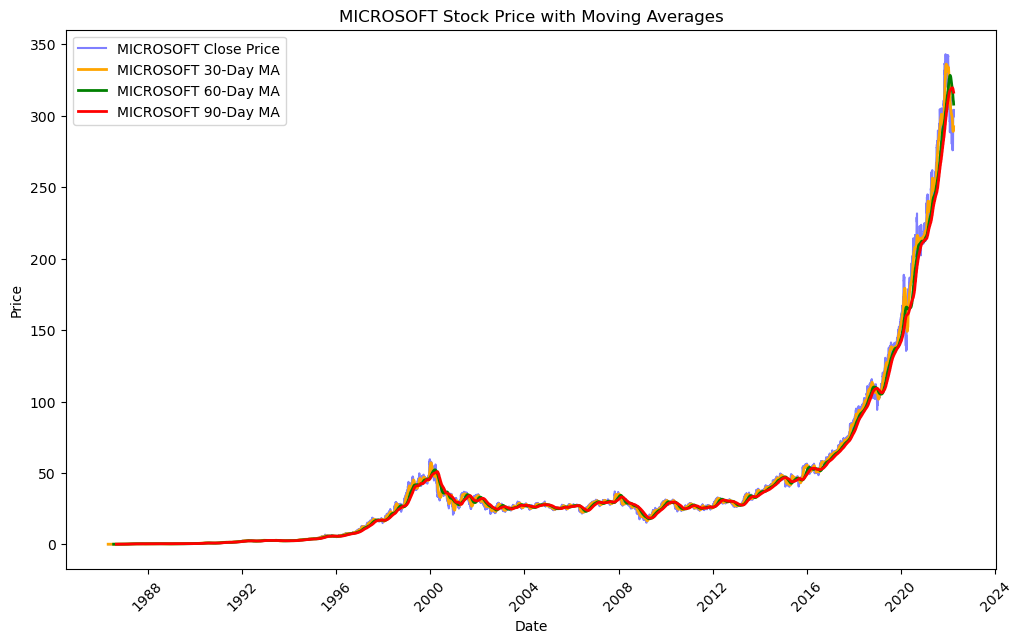

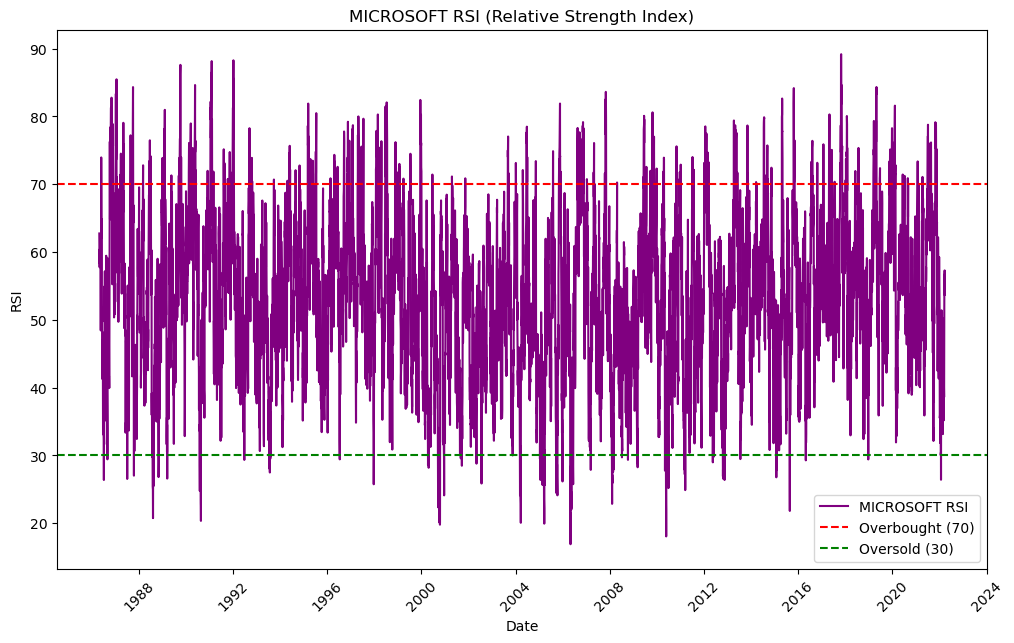

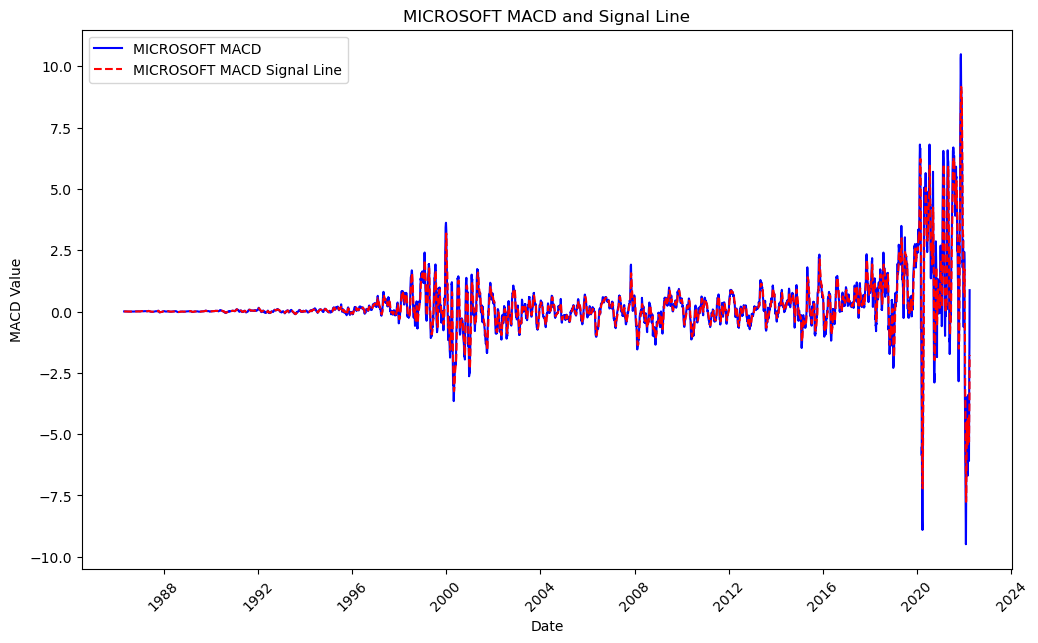

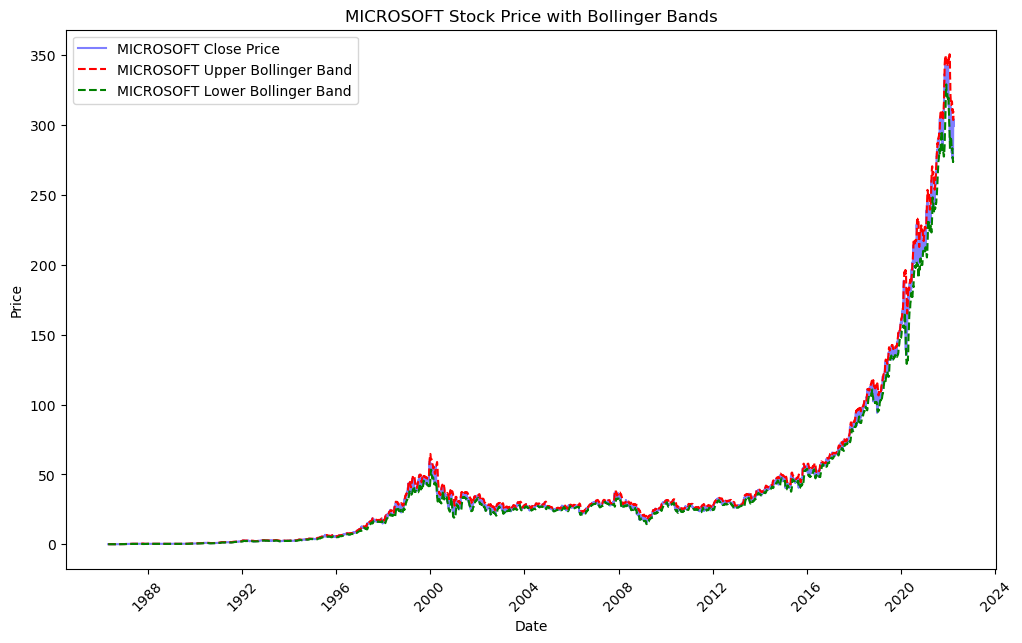

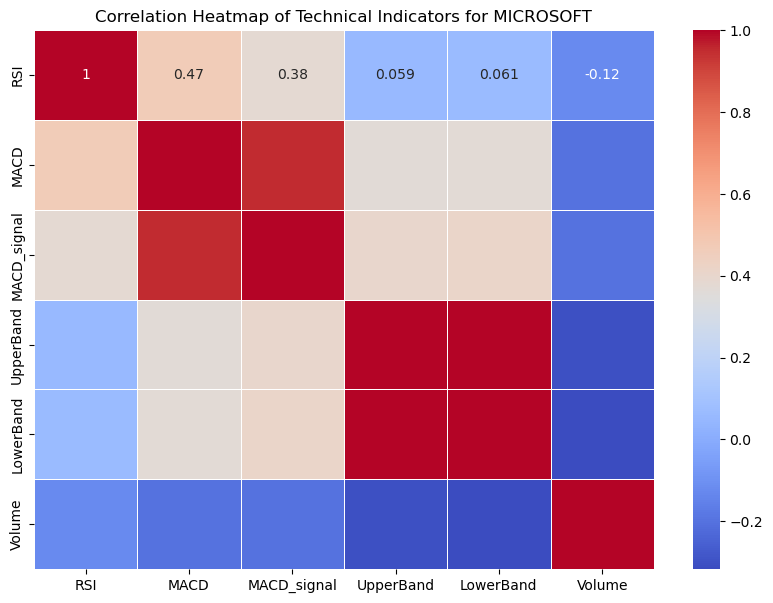

In [182]:
# For MICROSOFT
plot_technical_indicators(msft_df, 'MICROSOFT')

RMSE: 0.8330964627500896
                 Close  Predicted_Close
Date                                   
2021-11-01  329.369995       329.601000
2021-11-02  333.130005       331.557503
2021-11-03  334.000000       331.434401
2021-11-04  336.440002       335.630801
2021-11-05  336.059998       335.670800
...                ...              ...
2022-03-18  300.429993       297.824397
2022-03-21  299.160004       299.700801
2022-03-22  304.059998       302.258500
2022-03-23  299.489990       303.615302
2022-03-24  304.100006       304.789204

[100 rows x 2 columns]


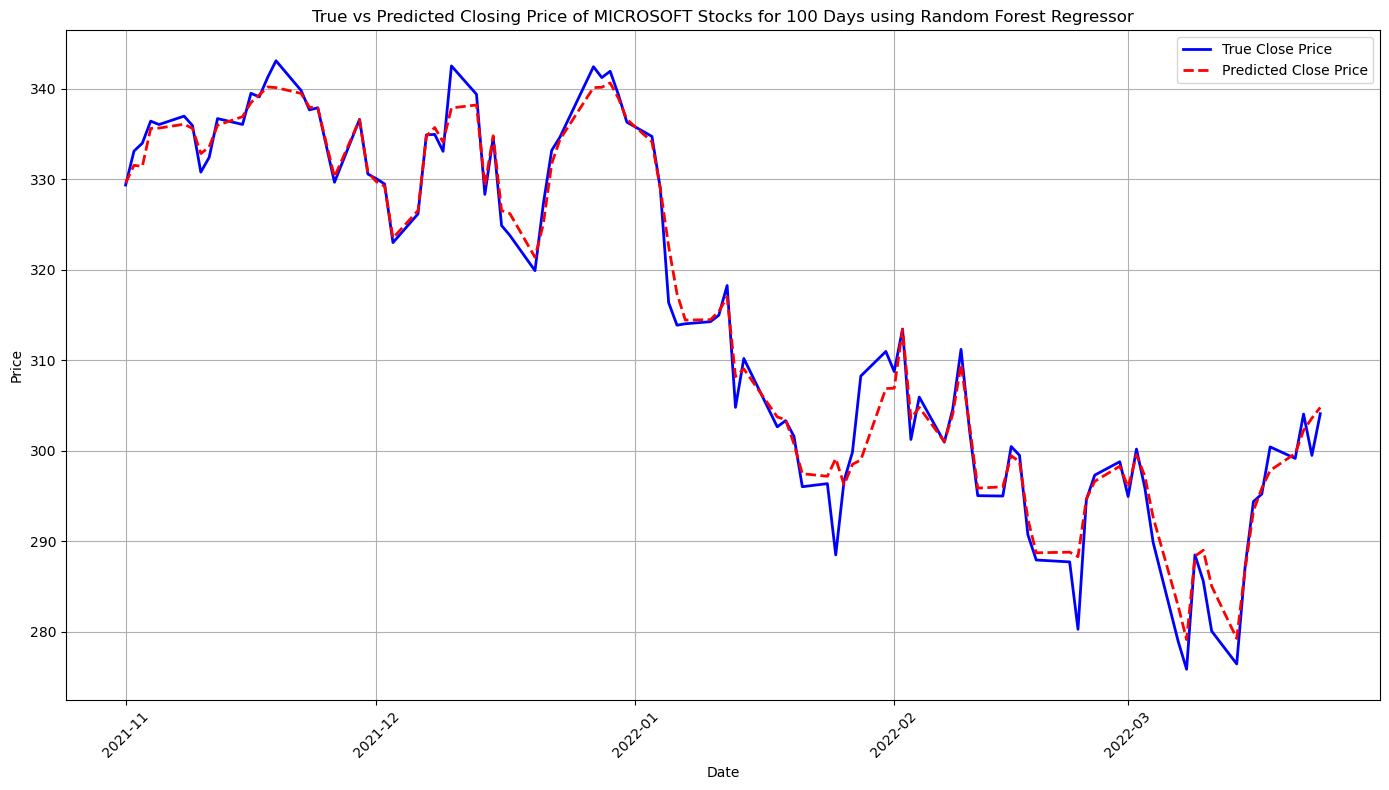

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Train-Test Split
X = msft_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]
y = msft_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Predicting for the next 100 days
future_data = msft_df.tail(100)  # Use the last 100 days of data for future prediction
X_future = future_data[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD']]

# Make predictions for the next 100 days
future_predictions = model_rf.predict(X_future)

# Add predicted prices to the future data
future_data['Predicted_Close'] = future_predictions

# Print the true and predicted close prices for the last 100 days
print(future_data[['Close', 'Predicted_Close']])

# Visualization for the next 100 days
import matplotlib.pyplot as plt

# Create a plot to visualize true and predicted closing prices
plt.figure(figsize=(14, 8))
plt.plot(future_data.index, future_data['Close'], label='True Close Price', color='blue', linewidth=2)
plt.plot(future_data.index, future_data['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('True vs Predicted Closing Price of MICROSOFT Stocks for 100 Days using Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


RMSE: 1.0155717538101416
            Predicted_Close
2022-03-24       304.275612
2022-03-25       158.630513
2022-03-28       109.298454
2022-03-29        81.053723
2022-03-30        72.771784
2022-03-31        66.622221
2022-04-01        63.258153
2022-04-04        60.790883
2022-04-05        58.952132
2022-04-06        55.975128
2022-04-07        52.653844
2022-04-08        50.592780
2022-04-11        48.993210
2022-04-12        47.235982
2022-04-13        45.765633
2022-04-14        44.757421
2022-04-15        42.960976
2022-04-18        41.397999
2022-04-19        39.879721
2022-04-20        38.598101
2022-04-21        37.826882
2022-04-22        37.033234
2022-04-25        35.652416
2022-04-26        34.741006
2022-04-27        33.850884
2022-04-28        32.998360
2022-04-29        32.583150
2022-05-02        32.008160
2022-05-03        31.495651
2022-05-04        30.846811


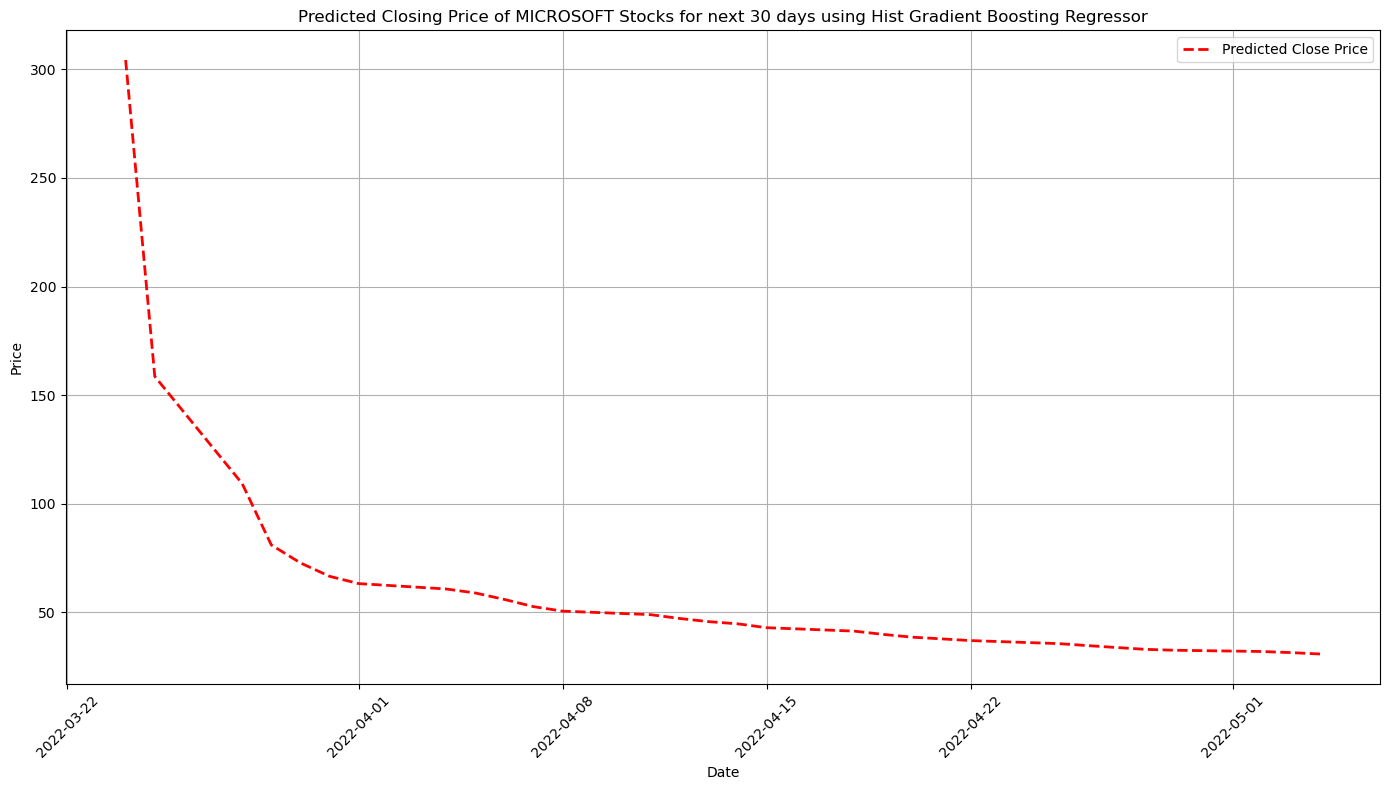

In [184]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the features and target
X = msft_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]
y = msft_df['Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoostingRegressor (which can handle missing values natively)
model_hgb = HistGradientBoostingRegressor(max_iter=100, random_state=42)

# Train the model
model_hgb.fit(X_train, y_train)

# Predictions on the test set to calculate RMSE
y_pred = model_hgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Get the last row from the data (2023-07-10)
last_row = msft_df.tail(1)

# Initialize the future predictions list
future_predictions = []

# Predict for the next 30 days (until 2023-08-17)
for _ in range(30):
    # Ensure the last_row contains all required features before making prediction
    X_future = last_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']].values
    # print(f"Shape of X_future: {X_future.shape}")  # Debugging step
    
    predicted_close = model_hgb.predict(X_future)[0]
    future_predictions.append(predicted_close)
    
    # Update the last_row with the predicted close price to compute new features for the next iteration
    new_row = last_row.copy()
    new_row['Close'] = predicted_close  # Use predicted close as the actual close for the next day
    
    # Recalculate the technical indicators based on the predicted close
    new_row['SMA'] = new_row['Close'].rolling(window=14).mean().iloc[-1]
    new_row['EMA'] = new_row['Close'].ewm(span=14, adjust=False).mean().iloc[-1]
    new_row['RSI'] = 100 - (100 / (1 + (new_row['Close'].diff().iloc[-14:].gt(0).sum() / 14)))
    new_row['MACD'] = new_row['EMA'] - new_row['SMA']
    new_row['MACD_signal'] = new_row['MACD'].ewm(span=9, adjust=False).mean().iloc[-1]
    new_row['MACD_hist'] = new_row['MACD'] - new_row['MACD_signal']
    new_row['UpperBand'] = new_row['SMA'] + (new_row['Close'].std() * 2)
    new_row['MiddleBand'] = new_row['SMA']
    new_row['LowerBand'] = new_row['SMA'] - (new_row['Close'].std() * 2)
    new_row['SlowK'] = new_row['RSI']
    new_row['SlowD'] = new_row['RSI'].rolling(window=3).mean().iloc[-1]
    
    # Set the predicted close as 'Next_Close' for the future iterations
    new_row['Next_Close'] = predicted_close
    
    # Ensure all columns are available for prediction
    last_row = new_row[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]

# Create a DataFrame for the future predictions
future_dates = pd.date_range(start=last_row.index[0], periods=30, freq='B')
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

# Print the future predictions
print(future_df)

# Visualization for the predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Close Price', color='red', linestyle='--', linewidth=2)
plt.title('Predicted Closing Price of MICROSOFT Stocks for next 30 days using Hist Gradient Boosting Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Training data shape: (7240, 12), Test data shape: (1810, 12)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7240
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 676.894
Date:                Wed, 04 Dec 2024   AIC                          -1317.788
Time:                        04:30:38   BIC                          -1193.817
Sample:                             0   HQIC                         -1275.141
                               - 7240                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
SMA             1.7633      0.030     59.657      0.000       1.705       1.821
EMA            -1.6075      0.049    -32.832      0.000      -1.703

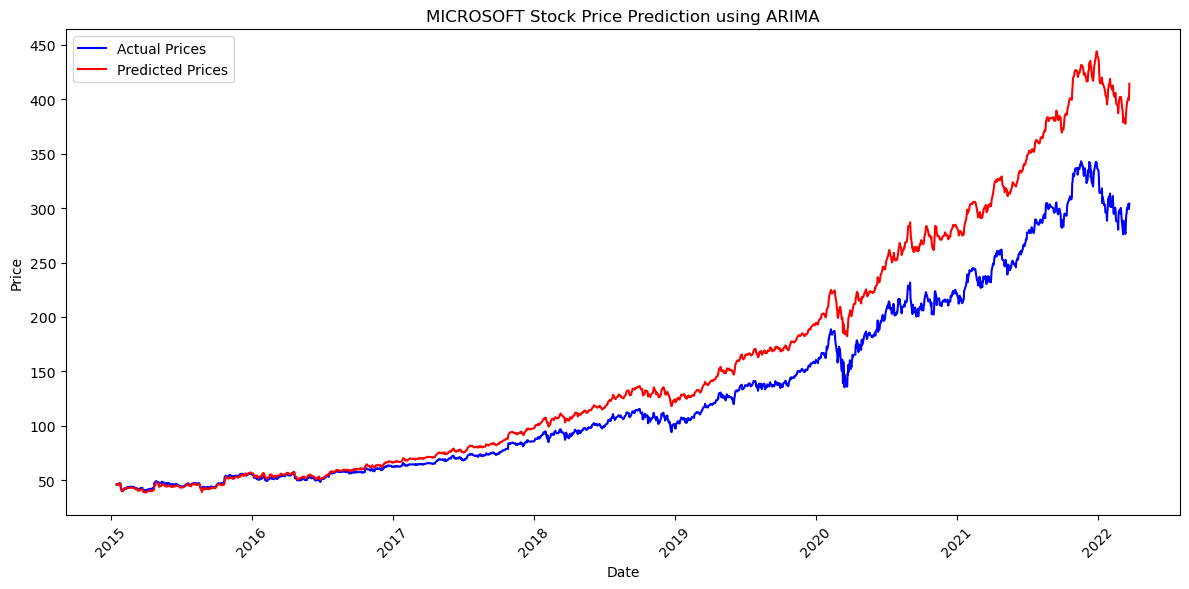

RMSE: 40.78770428189506


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Replace null values in 'Next_Close' with the mean of the column
msft_df['Next_Close'] = msft_df['Next_Close'].fillna(msft_df['Next_Close'].mean())

# Select relevant columns for features and target
X = msft_df[['SMA', 'EMA', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 
            'UpperBand', 'MiddleBand', 'LowerBand', 'SlowK', 'SlowD', 'Next_Close']]  # Technical Indicators
y = msft_df['Close']  # Target: Close Price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the train and test sets
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Fit the ARIMA model with external regressors (technical indicators)
model = ARIMA(y_train, order=(5,1,0), exog=X_train)  # ARIMA(p,d,q) + exogenous variables (X_train)
model_fit = model.fit()

# Print the model summary to check for diagnostics
print(model_fit.summary())

# Predict on the test set
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.legend()
plt.title('MICROSOFT Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")